In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
#import category_encoders as ce


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import Ridge

In [2]:
pd.set_option('max_columns', 250)
pd.set_option('max_rows', 100)

pd.get_option('max_columns')
pd.options.display.max_columns

250

In [3]:
pd.get_option('max_rows')
pd.options.display.max_rows

100

# EDA: Exploratory Data Analysis
first look at the data

In [4]:
raw = pd.read_csv( 'house-prices.csv')

My strategy will consist of the following steps:
1. clean the data (w.r.t. errors, inconsistencies and extreme/unrealistic values, missing values and duplicates)
2. split the data in two (validation and training set), trying different combinations. The test set is already subtracted from the data
3. Remove outliers from the training set
4. Feature encoding to both
5. Feature engineering
6. Model fitting (Regularization and Grid search)


In [5]:
raw.shape

(2430, 82)

In [6]:
raw.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    484  528275070           60        RL           NaN      8795   Pave   
1   2586  535305120           20        RL          75.0     10170   Pave   
2   2289  923228250          160        RM          21.0      2001   Pave   
3    142  535152150           20        RL          70.0     10552   Pave   
4   2042  903475060          190        RM          60.0     10120   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
1   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
2   NaN       Reg          Lvl    AllPub     Inside        Gtl      MeadowV   
3   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   
4   NaN       IR1          Bnk    AllPub     Inside        Gtl      OldTown   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      2Story             7             5   
1        Norm        Norm      1Fam      1Story             6             6   
2        Norm        Norm     Twnhs      2Story             4             5   
3        Norm        Norm      1Fam      1Story             5             5   
4       Feedr        Norm    2fmCon      2.5Unf             7             4   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        2000            2000      Gable   CompShg      VinylSd      VinylSd   
1        1951            1951        Hip   CompShg      Wd Sdng      Wd Sdng   
2        1970            1970      Gable   CompShg      CemntBd      CmentBd   
3        1959            1959        Hip   CompShg      BrkFace      BrkFace   
4        1910            1950        Hip   CompShg      Wd Sdng      Wd Sdng   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         Gd         TA      PConc        Gd   
1      BrkFace         522.0         TA         TA     CBlock        TA   
2      BrkFace          80.0         TA         TA     CBlock        TA   
3         None           0.0         TA         TA     CBlock        TA   
4         None           0.0         Fa         TA     CBlock        TA   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         300.0            Unf   
1        TA            No            Unf           0.0            Unf   
2        TA            No            Unf           0.0            Unf   
3        TA            No            Rec        1018.0            Unf   
4        TA            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        652.0          952.0    GasA         Ex           Y   
1           0.0        216.0          216.0    GasA         TA           Y   
2           0.0        546.0          546.0    GasA         Fa           Y   
3           0.0        380.0         1398.0    GasA         Gd           Y   
4           0.0        925.0          925.0    GasA         TA           N   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         980        1276                0         2256   
1      SBrkr        1575           0                0         1575   
2      SBrkr         546         546                0         1092   
3      SBrkr        1700           0                0         1700   
4      FuseF         964         925                0         1889   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              4   
1             0.0             0.0          1          1              2   
2             0.0             0.0          1          1              3   
3             0.0             1.0

In [7]:
raw.sample(20)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1083    966  916455070           20        RL           NaN      6853   Pave   
2035   1835  533205110          120        FV          45.0      4379   Pave   
1285    650  535353060           20        RL          75.0      9533   Pave   
1419    632  535152230           20        RL          70.0      8400   Pave   
1038   1588  921201060           20        RL          85.0     11447   Pave   
683    2236  910201110           50        RM          50.0      6060   Pave   
1005    562  532378120           20        RL          60.0      8281   Pave   
1257    363  527165130           20        RL           NaN      9248   Pave   
1126   2144  907227100           20        RL          60.0      7200   Pave   
276     284  908226130          190        RL          60.0     12180   Pave   
183     945  911370500          120        RM          44.0      3843   Pave   
498    2787  907203040           20        RL          70.0      9800   Pave   
1745   2192  908275200           20        RL          60.0      8172   Pave   
1921   1244  535180100           20        RL          75.0      9464   Pave   
1104   1769  528354060           60        RL          92.0      9920   Pave   
2244    526  528480040           60        FV          85.0     10574   Pave   
578     806  906223210           60        RL          80.0      9828   Pave   
1196   2329  527190220          120        RL           NaN      6563   Pave   
383    2588  535325340           20        RL          65.0     11050   Pave   
1334   2923  923230040           90        RL          63.0      9297   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
1083   NaN       IR1          Lvl    AllPub     Inside        Gtl   
2035   NaN       IR1          Lvl    AllPub        FR2        Gtl   
1285   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1419   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1038   NaN       IR1          Lvl    AllPub     Inside        Gtl   
683    NaN       Reg          Lvl    AllPub     Inside        Gtl   
1005   NaN       IR1          Lvl    AllPub     Inside        Gtl   
1257   NaN       IR1          Lvl    AllPub     Inside        Gtl   
1126   NaN       Reg          Lvl    AllPub     Inside        Gtl   
276    NaN       Reg          Lvl    AllPub     Inside        Gtl   
183    NaN       IR1          HLS    AllPub     Inside        Mod   
498    NaN       Reg          Lvl    AllPub     Corner        Gtl   
1745   NaN       Reg          Lvl    AllPub     Inside        Gtl   
1921   NaN       Reg          Lvl    AllPub     Corner        Gtl   
1104   NaN       IR1          Lvl    AllPub    CulDSac        Gtl   
2244   NaN       Reg          Lvl    AllPub     Inside        Gtl   
578    NaN       IR1          Lvl    AllPub     Inside        Gtl   
1196   NaN       IR1          Low    AllPub    CulDSac        Mod   
383    NaN       Reg          Lvl    AllPub     Inside        Gtl   
1334   NaN       Reg          Lvl    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
1083       Timber        Norm        Norm      1Fam      1Story             8   
2035      Somerst        Norm        Norm    TwnhsE      1Story             8   
1285        NAmes        Norm        Norm      1Fam      1Story             5   
1419        NAmes        Norm        Norm      1Fam      1Story             6   
1038       Timber        Norm        Norm      1Fam      1Story             8   
683        IDOTRR        Norm        Norm      1Fam      1.5Fin             4   
1005       Sawyer        Norm        Norm      1Fam      1Story             5   
1257      Gilbert        Norm        Norm      1Fam      1Story             6   
1126      CollgCr        Norm        Norm      1Fam      1Story             4   
276       Edwards        Norm        Norm    2fmCon      1.5Fin  

In [8]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2430 entries, 0 to 2429
Data columns (total 82 columns):
Order              2430 non-null int64
PID                2430 non-null int64
MS SubClass        2430 non-null int64
MS Zoning          2430 non-null object
Lot Frontage       2010 non-null float64
Lot Area           2430 non-null int64
Street             2430 non-null object
Alley              163 non-null object
Lot Shape          2430 non-null object
Land Contour       2430 non-null object
Utilities          2430 non-null object
Lot Config         2430 non-null object
Land Slope         2430 non-null object
Neighborhood       2430 non-null object
Condition 1        2430 non-null object
Condition 2        2430 non-null object
Bldg Type          2430 non-null object
House Style        2430 non-null object
Overall Qual       2430 non-null int64
Overall Cond       2430 non-null int64
Year Built         2430 non-null int64
Year Remod/Add     2430 non-null int64
Roof Style         24

In [9]:
raw.describe().T

count          mean           std          min  \
Order            2430.0  1.469478e+03  8.432365e+02          1.0   
PID              2430.0  7.149375e+08  1.887339e+08  526301100.0   
MS SubClass      2430.0  5.709259e+01  4.290325e+01         20.0   
Lot Frontage     2010.0  6.920199e+01  2.348699e+01         21.0   
Lot Area         2430.0  1.024356e+04  8.353925e+03       1470.0   
Overall Qual     2430.0  6.088889e+00  1.414621e+00          1.0   
Overall Cond     2430.0  5.569959e+00  1.116442e+00          1.0   
Year Built       2430.0  1.971167e+03  3.020793e+01       1875.0   
Year Remod/Add   2430.0  1.984239e+03  2.075116e+01       1950.0   
Mas Vnr Area     2410.0  1.019954e+02  1.766117e+02          0.0   
BsmtFin SF 1     2429.0  4.439444e+02  4.574536e+02          0.0   
BsmtFin SF 2     2429.0  5.107369e+01  1.721435e+02          0.0   
Bsmt Unf SF      2429.0  5.564809e+02  4.396501e+02          0.0   
Total Bsmt SF    2429.0  1.051499e+03  4.446900e+02          0.0   
1st Flr SF       2430.0  1.159845e+03  3.930976e+02        334.0   
2nd Flr SF       2430.0  3.266728e+02  4.194908e+02          0.0   
Low Qual Fin SF  2430.0  4.586831e+00  4.721618e+01          0.0   
Gr Liv Area      2430.0  1.491105e+03  4.961783e+02        334.0   
Bsmt Full Bath   2428.0  4.341021e-01  5.279405e-01          0.0   
Bsmt Half Bath   2428.0  6.013180e-02  2.429227e-01          0.0   
Full Bath        2430.0  1.560905e+00  5.483934e-01          0.0   
Half Bath        2430.0  3.695473e-01  5.011910e-01          0.0   
Bedroom AbvGr    2430.0  2.842798e+00  8.176594e-01          0.0   
Kitchen AbvGr    2430.0  1.042798e+00  2.084554e-01          0.0   
TotRms AbvGrd    2430.0  6.409053e+00  1.551557e+00          2.0   
Fireplaces       2430.0  5.950617e-01  6.465988e-01          0.0   
Garage Yr Blt    2292.0  1.977861e+03  2.554487e+01       1896.0   
Garage Cars      2429.0  1.762454e+00  7.582429e-01          0.0   
Garage Area      2429.0  4.719794e+02  2.157535e+02          0.0   
Wood Deck SF     2430.0  9.391770e+01  1.281069e+02          0.0   
Open Porch SF    2430.0  4.709177e+01  6.712385e+01          0.0   
Enclosed Porch   2430.0  2.229465e+01  6.238641e+01          0.0   
3Ssn Porch       2430.0  2.471605e+00  2.488024e+01          0.0   
Screen Porch     2430.0  1.652922e+01  5.682223e+01          0.0   
Pool Area        2430.0  2.401235e+00  3.611199e+01          0.0   
Misc Val         2430.0  5.617984e+01  6.166615e+02          0.0   
Mo Sold          2430.0  6.209465e+00  2.721942e+00          1.0   
Yr Sold          2430.0  2.007784e+03  1.311843e+00       2006.0   
SalePrice        2430.0  1.801997e+05  7.960747e+04      12789.0   

                          25%          50%           75%           max  
Order            7.492500e+02       1470.5  2.193500e+03  2.930000e+03  
PID              5.284770e+08  535454055.0  9.071352e+08  1.007100e+09  
MS SubClass      2.000000e+01         50.0  7.000000e+01  1.900000e+02  
Lot Frontage     5.800000e+01         68.0  8.000000e+01  3.130000e+02  
Lot Area         7.482000e+03       9500.0  1.160450e+04  2.152450e+05  
Overall Qual     5.000000e+00          6.0  7.000000e+00  1.000000e+01  
Overall Cond     5.000000e+00          5.0  6.000000e+00  9.000000e+00  
Year Built       1.954000e+03       1973.0  2.000000e+03  2.010000e+03  
Year Remod/Add   1.966000e+03       1993.0  2.003000e+03  2.010000e+03  
Mas Vnr Area     0.000000e+00          0.0  1.647500e+02  1.600000e+03  
BsmtFin SF 1     0.000000e+00        375.0  7.370000e+02  5.644000e+03  
BsmtFin SF 2     0.000000e+00          0.0  0.000000e+00  1.526000e+03  
Bsmt Unf SF      2.160000e+02        462.0  7.990000e+02  2.336000e+03  
Total Bsmt SF    7.940000e+02        990.0  1.299000e+03  6.110000e+03  
1st Flr SF       8.805000e+02       1086.0  1.387750e+03  5.095000e+03  
2nd Flr SF       0.000000e+00          0.0  6.980000e+02  2.065000e+03  
Low Qual Fin SF  0.000000e+00          0.0  0.000000e+00

In [10]:
raw.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [11]:
raw['Fireplace Qu'].value_counts()

Gd    620
TA    477
Fa     67
Po     42
Ex     38
Name: Fireplace Qu, dtype: int64

I will define different list for nominal, ordinal, continuous and discrete features and analyse each group separetely.

In [12]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 
           'Sale Type', 'Sale Condition']

In [13]:
ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
           'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
           'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

In [14]:
continuous = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
              '1st Flr SF','2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
              'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

In [15]:
discrete = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath','Bsmt Half Bath', 'Full Bath', 'Half Bath', 
            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
            'Mo Sold', 'Yr Sold']

In [16]:
target = ['SalePrice']

In [17]:
len(continuous)

19

In [18]:
len(ordinal)

23

In [19]:
len(nominal)

23

In [20]:
len(discrete)

14

In [21]:
len(target)

1

In [22]:
len(ordinal) + len(nominal) + len(discrete) + len(continuous) + len(target)

80

In [23]:
raw[discrete].head()

Year Built  Year Remod/Add  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
0        2000            2000             0.0             0.0          2   
1        1951            1951             0.0             0.0          1   
2        1970            1970             0.0             0.0          1   
3        1959            1959             0.0             1.0          1   
4        1910            1950             0.0             0.0          1   

   Half Bath  Bedroom AbvGr  Kitchen AbvGr  TotRms AbvGrd  Fireplaces  \
0          1              4              1              8           1   
1          1              2              1              5           1   
2          1              3              1              6           0   
3          1              4              1              6           1   
4          1              4              2              9           1   

   Garage Yr Blt  Garage Cars  Mo Sold  Yr Sold  
0         2000.0          2.0        4     2009  
1         1951.0          2.0        6     2006  
2         1970.0          1.0        1     2007  
3         1959.0          2.0        4     2010  
4         1960.0          1.0        1     2007

# EDA
## 1. Cleaning the data

### 1| Typos and inconsistencies

In [24]:
raw[discrete].describe().T.round(0)

count    mean   std     min     25%     50%     75%     max
Year Built      2430.0  1971.0  30.0  1875.0  1954.0  1973.0  2000.0  2010.0
Year Remod/Add  2430.0  1984.0  21.0  1950.0  1966.0  1993.0  2003.0  2010.0
Bsmt Full Bath  2428.0     0.0   1.0     0.0     0.0     0.0     1.0     3.0
Bsmt Half Bath  2428.0     0.0   0.0     0.0     0.0     0.0     0.0     2.0
Full Bath       2430.0     2.0   1.0     0.0     1.0     2.0     2.0     4.0
Half Bath       2430.0     0.0   1.0     0.0     0.0     0.0     1.0     2.0
Bedroom AbvGr   2430.0     3.0   1.0     0.0     2.0     3.0     3.0     8.0
Kitchen AbvGr   2430.0     1.0   0.0     0.0     1.0     1.0     1.0     3.0
TotRms AbvGrd   2430.0     6.0   2.0     2.0     5.0     6.0     7.0    15.0
Fireplaces      2430.0     1.0   1.0     0.0     0.0     1.0     1.0     4.0
Garage Yr Blt   2292.0  1978.0  26.0  1896.0  1960.0  1978.0  2002.0  2207.0
Garage Cars     2429.0     2.0   1.0     0.0     1.0     2.0     2.0     4.0
Mo Sold         2430.0     6.0   3.0     1.0     4.0     6.0     8.0    12.0
Yr Sold         2430.0  2008.0   1.0  2006.0  2007.0  2008.0  2009.0  2010.0

In [25]:
raw.loc[raw['Garage Yr Blt'] == 2207, :]

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
2219   2261  916384070           20        RL          68.0      8298   Pave   

     Alley Lot Shape Land Contour Utilities Lot Config Land Slope  \
2219   NaN       IR1          HLS    AllPub     Inside        Gtl   

     Neighborhood Condition 1 Condition 2 Bldg Type House Style  Overall Qual  \
2219       Timber        Norm        Norm      1Fam      1Story             8   

      Overall Cond  Year Built  Year Remod/Add Roof Style Roof Matl  \
2219             5        2006            2007        Hip   CompShg   

     Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual  \
2219      VinylSd      VinylSd          NaN           NaN         Gd   

     Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  \
2219         TA      PConc        Gd        TA            Av            GLQ   

      BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \
2219         583.0            Unf           0.0        963.0         1546.0   

     Heating Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
2219    GasA         Ex           Y      SBrkr        1564           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
2219                0         1564             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
2219          0              2              1           Ex              6   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
2219        Typ           1           Gd      Attchd         2207.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
2219           RFn          2.0        502.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
2219           Y           132              0               0           0   

      Screen Porch  Pool Area Pool QC Fence Misc Feature  Misc Val  Mo Sold  \
2219             0          0     NaN   NaN          NaN         0        9   

      Yr Sold Sale Type Sale Condition  SalePrice  
2219     2007       New        Partial     267300

This record refers to a new house built on 2007 so probably this typo refers to the same year the house was sold, since it is new.

In [26]:
raw.loc[raw['Garage Yr Blt'] == 2207, 'Garage Yr Blt'] = 2007

In [27]:
raw[continuous].describe(percentiles = [0.1, 0.25, 0.50, 0.75, 0.90]).T

count          mean          std     min     10%     25%  \
Lot Frontage     2010.0     69.201990    23.486988    21.0    43.0    58.0   
Lot Area         2430.0  10243.557613  8353.925254  1470.0  4897.3  7482.0   
Mas Vnr Area     2410.0    101.995436   176.611699     0.0     0.0     0.0   
BsmtFin SF 1     2429.0    443.944422   457.453649     0.0     0.0     0.0   
BsmtFin SF 2     2429.0     51.073693   172.143522     0.0     0.0     0.0   
Bsmt Unf SF      2429.0    556.480856   439.650118     0.0    46.0   216.0   
Total Bsmt SF    2429.0   1051.498971   444.690012     0.0   600.0   794.0   
1st Flr SF       2430.0   1159.845267   393.097610   334.0   747.0   880.5   
2nd Flr SF       2430.0    326.672840   419.490754     0.0     0.0     0.0   
Low Qual Fin SF  2430.0      4.586831    47.216176     0.0     0.0     0.0   
Gr Liv Area      2430.0   1491.104938   496.178280   334.0   924.0  1120.0   
Garage Area      2429.0    471.979415   215.753523     0.0   240.0   324.0   
Wood Deck SF     2430.0     93.917695   128.106940     0.0     0.0     0.0   
Open Porch SF    2430.0     47.091770    67.123846     0.0     0.0     0.0   
Enclosed Porch   2430.0     22.294650    62.386414     0.0     0.0     0.0   
3Ssn Porch       2430.0      2.471605    24.880245     0.0     0.0     0.0   
Screen Porch     2430.0     16.529218    56.822227     0.0     0.0     0.0   
Pool Area        2430.0      2.401235    36.111988     0.0     0.0     0.0   
Misc Val         2430.0     56.179835   616.661541     0.0     0.0     0.0   

                    50%       75%      90%       max  
Lot Frontage       68.0     80.00     95.0     313.0  
Lot Area         9500.0  11604.50  14365.1  215245.0  
Mas Vnr Area        0.0    164.75    323.1    1600.0  
BsmtFin SF 1      375.0    737.00   1053.6    5644.0  
BsmtFin SF 2        0.0      0.00    136.4    1526.0  
Bsmt Unf SF       462.0    799.00   1200.6    2336.0  
Total Bsmt SF     990.0   1299.00   1612.4    6110.0  
1st Flr SF       1086.0   1387.75   1675.0    5095.0  
2nd Flr SF          0.0    698.00    912.0    2065.0  
Low Qual Fin SF     0.0      0.00      0.0    1064.0  
Gr Liv Area      1440.0   1740.00   2127.0    5642.0  
Garage Area       478.0    576.00    757.2    1488.0  
Wood Deck SF        0.0    168.00    256.1    1424.0  
Open Porch SF      27.0     70.00    130.0     742.0  
Enclosed Porch      0.0      0.00    112.0    1012.0  
3Ssn Porch          0.0      0.00      0.0     508.0  
Screen Porch        0.0      0.00      0.0     490.0  
Pool Area           0.0      0.00      0.0     800.0  
Misc Val            0.0      0.00      0.0   17000.0

I observe some extreme values which will be treated later when I handle the outliers.

### 2| Duplicates

I check for duplicate rows:

In [28]:
raw.duplicated(keep = 'first').sum()

0

I check specifically for the columns 'Order' and  'PID' because they are identifiers.

In [29]:
raw.duplicated(['Order']).sum()

0

In [30]:
raw.duplicated(['PID']).sum()

0

### 3| Data Types

In [31]:
raw.dtypes

Order                int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

'MS SubClass' is a categorical feature (nominal) encoded with numerical values with a data type as int64. It has to be changed to string.

In [32]:
raw['MS SubClass'].isna().sum()

0

In [33]:
raw['MS SubClass'] = raw['MS SubClass'].astype('category')

In [34]:
raw['MS SubClass'].dtypes

CategoricalDtype(categories=[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160,
                  180, 190],
                 ordered=False)

In [35]:
raw.dtypes

Order                 int64
PID                   int64
MS SubClass        category
MS Zoning            object
Lot Frontage        float64
Lot Area              int64
Street               object
Alley                object
Lot Shape            object
Land Contour         object
Utilities            object
Lot Config           object
Land Slope           object
Neighborhood         object
Condition 1          object
Condition 2          object
Bldg Type            object
House Style          object
Overall Qual          int64
Overall Cond          int64
Year Built            int64
Year Remod/Add        int64
Roof Style           object
Roof Matl            object
Exterior 1st         object
Exterior 2nd         object
Mas Vnr Type         object
Mas Vnr Area        float64
Exter Qual           object
Exter Cond           object
Foundation           object
Bsmt Qual            object
Bsmt Cond            object
Bsmt Exposure        object
BsmtFin Type 1       object
BsmtFin SF 1        

For the rest of the categorical features I have to handle the missing values first.

### 3| Missing values

In [36]:
raw[continuous].isnull().sum()

Lot Frontage       420
Lot Area             0
Mas Vnr Area        20
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
dtype: int64

In [37]:
raw[discrete].isnull().sum()

Year Built          0
Year Remod/Add      0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     138
Garage Cars         1
Mo Sold             0
Yr Sold             0
dtype: int64

In [38]:
raw[ordinal].isnull().sum()

Lot Shape            0
Utilities            0
Land Slope           0
Overall Qual         0
Overall Cond         0
Exter Qual           0
Exter Cond           0
Bsmt Qual           71
Bsmt Cond           71
Bsmt Exposure       74
BsmtFin Type 1      71
BsmtFin Type 2      72
Heating QC           0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu      1186
Garage Finish      138
Garage Qual        138
Garage Cond        138
Paved Drive          0
Pool QC           2418
Fence             1941
dtype: int64

In [39]:
raw[nominal].isnull().sum()

MS SubClass          0
MS Zoning            0
Street               0
Alley             2267
Land Contour         0
Lot Config           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        20
Foundation           0
Heating              0
Central Air          0
Garage Type        136
Misc Feature      2340
Sale Type            0
Sale Condition       0
dtype: int64

In [40]:
(raw.isnull().mean().round(3)*100).sort_values(ascending = True)

Order               0.0
Bsmt Unf SF         0.0
Total Bsmt SF       0.0
Sale Condition      0.0
Heating QC          0.0
Central Air         0.0
Electrical          0.0
1st Flr SF          0.0
2nd Flr SF          0.0
Low Qual Fin SF     0.0
Gr Liv Area         0.0
Full Bath           0.0
Half Bath           0.0
Bedroom AbvGr       0.0
Kitchen AbvGr       0.0
Kitchen Qual        0.0
TotRms AbvGrd       0.0
Functional          0.0
Sale Type           0.0
Yr Sold             0.0
Mo Sold             0.0
Misc Val            0.0
Pool Area           0.0
Screen Porch        0.0
BsmtFin SF 2        0.0
3Ssn Porch          0.0
Open Porch SF       0.0
Wood Deck SF        0.0
Paved Drive         0.0
Garage Area         0.0
Garage Cars         0.0
Fireplaces          0.0
Enclosed Porch      0.0
BsmtFin SF 1        0.0
Heating             0.0
SalePrice           0.0
Lot Config          0.0
Lot Shape           0.0
Street              0.0
Land Slope          0.0
Neighborhood        0.0
Lot Area        

I decide to drop the columns ['Fence', 'Alley', 'Misc Feature', 'Pool QC'] because they have more than 79% of missing values as it is visualized also in the graph below.

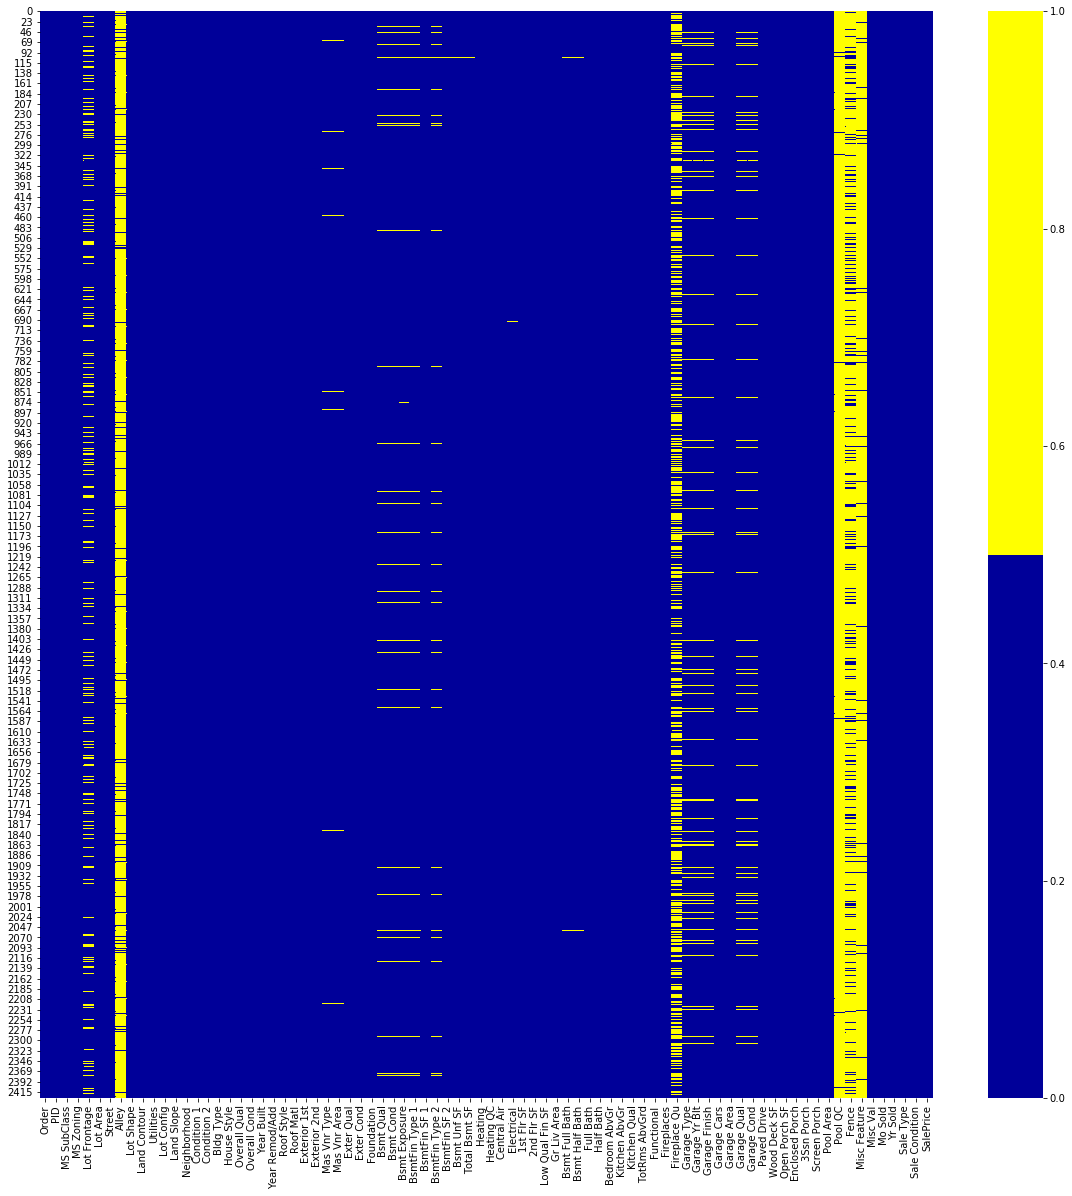

In [41]:
colors = ['#000099', '#ffff00']
# yellow for the missing values, blue for the nonmissing

fig, ax = plt.subplots(figsize = (20,20))
ax = sns.heatmap(raw.isnull(), cmap = sns.color_palette(colors))
# yellow for the missing values, blue for the nonmissingg, ax = plt.subplots(figsize=(20,20)) 


I decide to drop the columns ['Fence', 'Alley', 'Misc Feature', 'Pool QC'] because they have more than 79% of missing values. I will also drop the column 'Fireplace Qu'  because it has about 50% missimg values and out of intuition the quality of the fireplace cannot be that determining for the total house price.

In [42]:
raw.drop( columns =  ['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis = 1, inplace = True)

In [43]:
raw.shape

(2430, 78)

I will now drop the PID and Order number which are not offering any information to the model.

In [44]:
raw.drop(columns = ['PID', 'Order'], axis = 1, inplace = True)

In [45]:
raw.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape Land Contour  \
0          60        RL           NaN      8795   Pave       IR1          Lvl   
1          20        RL          75.0     10170   Pave       Reg          Lvl   
2         160        RM          21.0      2001   Pave       Reg          Lvl   
3          20        RL          70.0     10552   Pave       IR1          Lvl   
4         190        RM          60.0     10120   Pave       IR1          Bnk   

  Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2  \
0    AllPub     Inside        Gtl      Gilbert        Norm        Norm   
1    AllPub     Corner        Gtl        NAmes        Norm        Norm   
2    AllPub     Inside        Gtl      MeadowV        Norm        Norm   
3    AllPub     Inside        Gtl        NAmes        Norm        Norm   
4    AllPub     Inside        Gtl      OldTown       Feedr        Norm   

  Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0      1Fam      2Story             7             5        2000   
1      1Fam      1Story             6             6        1951   
2     Twnhs      2Story             4             5        1970   
3      1Fam      1Story             5             5        1959   
4    2fmCon      2.5Unf             7             4        1910   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            2000      Gable   CompShg      VinylSd      VinylSd         None   
1            1951        Hip   CompShg      Wd Sdng      Wd Sdng      BrkFace   
2            1970      Gable   CompShg      CemntBd      CmentBd      BrkFace   
3            1959        Hip   CompShg      BrkFace      BrkFace         None   
4            1950        Hip   CompShg      Wd Sdng      Wd Sdng         None   

   Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond  \
0           0.0         Gd         TA      PConc        Gd        TA   
1         522.0         TA         TA     CBlock        TA        TA   
2          80.0         TA         TA     CBlock        TA        TA   
3           0.0         TA         TA     CBlock        TA        TA   
4           0.0         Fa         TA     CBlock        TA        TA   

  Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  \
0            No            GLQ         300.0            Unf           0.0   
1            No            Unf           0.0            Unf           0.0   
2            No            Unf           0.0            Unf           0.0   
3            No            Rec        1018.0            Unf           0.0   
4            No            Unf           0.0            Unf           0.0   

   Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air Electrical  \
0        652.0          952.0    GasA         Ex           Y      SBrkr   
1        216.0          216.0    GasA         TA           Y      SBrkr   
2        546.0          546.0    GasA         Fa           Y      SBrkr   
3        380.0         1398.0    GasA         Gd           Y      SBrkr   
4        925.0          925.0    GasA         TA           N      FuseF   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0         980        1276                0         2256             0.0   
1        1575           0                0         1575             0.0   
2         546         546                0         1092             0.0   
3        1700           0                0         1700             0.0   
4         964         925                0         1889             0.0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0             0.0          2          1              4              1   
1             0.0          1          1              2              1   
2             0.0          1          1              3              1   
3             1.0          1          1              4              1   
4             0.0

In [46]:
raw[raw[['Garage Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].isnull().any(axis = 1)]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
104           20        RM          99.0      5940   Pave       IR1   
1565          70        RM          50.0      9060   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
104           Lvl    AllPub        FR3        Gtl      BrkSide       Feedr   
1565          Lvl    AllPub     Inside        Gtl       IDOTRR        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
104         Norm      1Fam      1Story             4             7   
1565        Norm      1Fam      2Story             5             6   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
104         1946            1950      Gable   CompShg      MetalSd   
1565        1923            1999      Gable   CompShg      Wd Sdng   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
104        CBlock         None           0.0         TA         TA      PConc   
1565      Plywood         None           0.0         TA         TA     BrkTil   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
104        NaN       NaN           NaN            NaN           NaN   
1565        Gd        TA            No            ALQ         548.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
104             NaN           NaN          NaN            NaN    GasA   
1565            Unf           0.0        311.0          859.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
104          TA           Y      FuseA         896           0   
1565         Ex           Y      SBrkr         942         886   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
104                 0          896             NaN             NaN          1   
1565                0         1828             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
104           0              2              1           TA              4   
1565          0              3              1           Gd              6   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
104         Typ           0          NaN      Detchd         1946.0   
1565        Typ           0          NaN      Detchd            NaN   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
104            Unf          1.0        280.0          TA          TA   
1565           NaN          NaN          NaN         NaN         NaN   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
104            Y             0              0               0           0   
1565           Y           174              0             212           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
104              0          0         0        4     2008     ConLD   
1565             0          0         0        3     2007       WD    

     Sale Condition  SalePrice  
104         Abnorml      79000  
1565         Alloca     150909

  I observe that the variable with order id 1342 has missing values on the features 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF' therefore I will fill them with 0. The thinking behind this decision is that there is no data about the Basement so I treat it as if there is no Basement at all.m

In [47]:
raw[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']] = raw[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].fillna(0)

In [48]:
raw[['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].isna().sum()

BsmtFin SF 1     0
BsmtFin SF 2     0
Bsmt Unf SF      0
Total Bsmt SF    0
dtype: int64

In [49]:
raw[raw[['Garage Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF']].isnull().any(axis = 1)]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
1565          70        RM          50.0      9060   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
1565          Lvl    AllPub     Inside        Gtl       IDOTRR        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
1565        Norm      1Fam      2Story             5             6   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
1565        1923            1999      Gable   CompShg      Wd Sdng   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
1565      Plywood         None           0.0         TA         TA     BrkTil   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
1565        Gd        TA            No            ALQ         548.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
1565            Unf           0.0        311.0          859.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
1565         Ex           Y      SBrkr         942         886   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
1565                0         1828             0.0             0.0          2   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
1565          0              3              1           Gd              6   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
1565        Typ           0          NaN      Detchd            NaN   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
1565           NaN          NaN          NaN         NaN         NaN   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
1565           Y           174              0             212           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
1565             0          0         0        3     2007       WD    

     Sale Condition  SalePrice  
1565         Alloca     150909

In [50]:
raw.isnull().sum() 

MS SubClass           0
MS Zoning             0
Lot Frontage        420
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         20
Mas Vnr Area         20
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            71
Bsmt Cond            71
Bsmt Exposure        74
BsmtFin Type 1       71
BsmtFin SF 1          0
BsmtFin Type 2       72
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical            1
1st Flr SF      

In [51]:
raw[raw['Lot Frontage'].isnull()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0             60        RL           NaN      8795   Pave       IR1   
13            30        RL           NaN     12342   Pave       IR1   
26            60        RL           NaN     10382   Pave       IR1   
34            70   I (all)           NaN     56600   Pave       IR1   
35           120        RM           NaN      8239   Pave       IR1   
38            60        RL           NaN      8740   Pave       IR1   
57           160        RH           NaN      3612   Pave       IR1   
70           160        FV           NaN      2998   Pave       Reg   
78            20        RL           NaN     10920   Pave       IR1   
80            80        RL           NaN      7750   Pave       Reg   
81            85        RL           NaN      9927   Pave       IR1   
89            20        RL           NaN     15498   Pave       IR1   
91            70        RM           NaN      5100   Pave       Reg   
96            20        RL           NaN     15676   Pave       IR1   
100           20        RL           NaN     11000   Pave       IR2   
101           20        RL           NaN     32668   Pave       IR1   
112           85        RL           NaN     16500   Pave       Reg   
113           20        RL           NaN     57200   Pave       IR1   
124           80        RL           NaN      9947   Pave       IR1   
127           80        RL           NaN      7176   Pave       IR1   
137           80        RL           NaN     13607   Pave       IR1   
141           20        RL           NaN     15870   Pave       IR1   
145           20        RL           NaN     20062   Pave       IR1   
151           60        RL           NaN     11949   Pave       Reg   
157           60        RL           NaN      9839   Pave       IR1   
158           80        RL           NaN      7750   Pave       IR1   
170           60        RL           NaN      9205   Pave       IR1   
176           20        RL           NaN     11500   Pave       IR1   
196           80        RL           NaN     10395   Pave       IR1   
205           20        RL           NaN      9156   Pave       IR1   
214           20        RL           NaN     12160   Pave       IR1   
220           20        RL           NaN     11088   Pave       Reg   
221           60        RL           NaN     11000   Pave       Reg   
229          180        RM           NaN      1533   Pave       Reg   
232           50        RM           NaN     10320   Pave       Reg   
240           60        RL           NaN      9765   Pave       IR2   
247           40        RL           NaN     23595   Pave       Reg   
248           80        RL           NaN     12095   Pave       IR1   
250           20        RL           NaN     17541   Pave       IR1   
254           20        RL           NaN      9000   Pave       Reg   
264           60        FV           NaN      8010   Pave       IR1   
265           20        RL           NaN      8125   Pave       IR1   
267          190        RL           NaN    164660   Grvl       IR1   
274           20        RL           NaN     11616   Pave       Reg   
279           20        RL           NaN     31220   Pave       IR1   
283           80        RL           NaN     15957   Pave       IR1   
284           85        RL           NaN      9101   Pave       IR1   
287           60        RL           NaN     11250   Pave       Reg   
302           60        RL           NaN     14311   Pave       IR1   
320           20        RL           NaN      8978   Pave       IR1   
...          ...       ...           ...       ...    ...       ...   
2155          60        RL           NaN     12205   Pave       IR1   
2159          20        RL           NaN      8246   Pave       IR1   
2173          20        RL           NaN     13500   Pave       Reg   
2177          20        RL           NaN     19900   Pave       Reg   
2184         120        RM   

I will fill the missing values of 'Lot Frontage' with the median of this feature.

In [52]:
np.nanmedian(raw['Lot Frontage'])

68.0

In [53]:
raw['Lot Frontage'] = raw['Lot Frontage'].fillna(np.nanmedian(raw['Lot Frontage']))

In [54]:
raw[raw['Lot Frontage'].isnull()]

Empty DataFrame
Columns: [MS SubClass, MS Zoning, Lot Frontage, Lot Area, Street, Lot Shape, Land Contour, Utilities, Lot Config, Land Slope, Neighborhood, Condition 1, Condition 2, Bldg Type, House Style, Overall Qual, Overall Cond, Year Built, Year Remod/Add, Roof Style, Roof Matl, Exterior 1st, Exterior 2nd, Mas Vnr Type, Mas Vnr Area, Exter Qual, Exter Cond, Foundation, Bsmt Qual, Bsmt Cond, Bsmt Exposure, BsmtFin Type 1, BsmtFin SF 1, BsmtFin Type 2, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Heating, Heating QC, Central Air, Electrical, 1st Flr SF, 2nd Flr SF, Low Qual Fin SF, Gr Liv Area, Bsmt Full Bath, Bsmt Half Bath, Full Bath, Half Bath, Bedroom AbvGr, Kitchen AbvGr, Kitchen Qual, TotRms AbvGrd, Functional, Fireplaces, Fireplace Qu, Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Paved Drive, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Misc Val, Mo Sold, Yr Sold, Sale Type, Sale Condition, SalePrice]
Index: []

In [55]:
np.nanmedian(raw['Lot Frontage'], axis = 0)

68.0

In [56]:
raw.loc[raw['Mas Vnr Type'].isnull(), :]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
66           120        FV          35.0      4274   Pave       IR1   
83            60        RL          70.0      8749   Pave       Reg   
101           20        RL          68.0     32668   Pave       IR1   
159           20        FV          95.0     11639   Pave       Reg   
201           20        FV          90.0      7993   Pave       IR1   
270           20        RL          85.0      9965   Pave       Reg   
352          120        FV          30.0      5330   Pave       IR2   
447           60        RL          75.0      9473   Pave       Reg   
456           60        RL          68.0      7750   Pave       Reg   
457           80        RL          68.0     11950   Pave       IR1   
465           20        RL          67.0     10083   Pave       Reg   
624           60        FV          65.0      8125   Pave       Reg   
851           60        RL          68.0      7851   Pave       Reg   
891           20        RL          87.0     10037   Pave       Reg   
1098          60        RL          68.0     12891   Pave       IR1   
1480          60        FV          68.0      7500   Pave       Reg   
1592          60        RL          59.0     15810   Pave       IR1   
1832          60        FV         112.0     12217   Pave       IR1   
2137          20        RL          75.0      8050   Pave       Reg   
2219          20        RL          68.0      8298   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
66            Lvl    AllPub     Inside        Gtl      Somerst        Norm   
83            Lvl    AllPub     Inside        Gtl      CollgCr        Norm   
101           Lvl    AllPub    CulDSac        Gtl      Crawfor        Norm   
159           Lvl    AllPub     Corner        Gtl      Somerst        Norm   
201           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
270           Lvl    AllPub        FR2        Gtl      Somerst       Feedr   
352           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
447           Lvl    AllPub     Inside        Gtl      CollgCr        Norm   
456           Lvl    AllPub     Inside        Gtl      Gilbert        RRAn   
457           Lvl    AllPub     Corner        Gtl      Gilbert        Norm   
465           Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
624           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
851           Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
891           Lvl    AllPub     Corner        Gtl      Somerst       Feedr   
1098          Lvl    AllPub     Corner        Gtl      Gilbert        Norm   
1480          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
1592          Lvl    AllPub     Inside        Gtl      Gilbert        RRAn   
1832          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
2137          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
2219          HLS    AllPub     Inside        Gtl       Timber        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
66          Norm    TwnhsE      1Story             7             5   
83          Norm      1Fam      2Story             7             5   
101         Norm      1Fam      1Story             6             3   
159         Norm      1Fam      1Story             7             5   
201         Norm      1Fam      1Story             7             5   
270         Norm      1Fam      1Story             7             5   
352         Norm    TwnhsE      1Story             8             5   
447         Norm      1Fam      2Story             8             5   
456         Norm      1Fam      2Story             7             5   
457         Norm      1Fam        SLvl             7             5   
465         Norm      1Fam      1Story             7             5   
624         Norm      1Fam      2S

In [57]:
raw[raw['Mas Vnr Type'].isnull()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
66           120        FV          35.0      4274   Pave       IR1   
83            60        RL          70.0      8749   Pave       Reg   
101           20        RL          68.0     32668   Pave       IR1   
159           20        FV          95.0     11639   Pave       Reg   
201           20        FV          90.0      7993   Pave       IR1   
270           20        RL          85.0      9965   Pave       Reg   
352          120        FV          30.0      5330   Pave       IR2   
447           60        RL          75.0      9473   Pave       Reg   
456           60        RL          68.0      7750   Pave       Reg   
457           80        RL          68.0     11950   Pave       IR1   
465           20        RL          67.0     10083   Pave       Reg   
624           60        FV          65.0      8125   Pave       Reg   
851           60        RL          68.0      7851   Pave       Reg   
891           20        RL          87.0     10037   Pave       Reg   
1098          60        RL          68.0     12891   Pave       IR1   
1480          60        FV          68.0      7500   Pave       Reg   
1592          60        RL          59.0     15810   Pave       IR1   
1832          60        FV         112.0     12217   Pave       IR1   
2137          20        RL          75.0      8050   Pave       Reg   
2219          20        RL          68.0      8298   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
66            Lvl    AllPub     Inside        Gtl      Somerst        Norm   
83            Lvl    AllPub     Inside        Gtl      CollgCr        Norm   
101           Lvl    AllPub    CulDSac        Gtl      Crawfor        Norm   
159           Lvl    AllPub     Corner        Gtl      Somerst        Norm   
201           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
270           Lvl    AllPub        FR2        Gtl      Somerst       Feedr   
352           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
447           Lvl    AllPub     Inside        Gtl      CollgCr        Norm   
456           Lvl    AllPub     Inside        Gtl      Gilbert        RRAn   
457           Lvl    AllPub     Corner        Gtl      Gilbert        Norm   
465           Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
624           Lvl    AllPub     Inside        Gtl      Somerst        Norm   
851           Lvl    AllPub     Inside        Gtl      Gilbert        Norm   
891           Lvl    AllPub     Corner        Gtl      Somerst       Feedr   
1098          Lvl    AllPub     Corner        Gtl      Gilbert        Norm   
1480          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
1592          Lvl    AllPub     Inside        Gtl      Gilbert        RRAn   
1832          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
2137          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
2219          HLS    AllPub     Inside        Gtl       Timber        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
66          Norm    TwnhsE      1Story             7             5   
83          Norm      1Fam      2Story             7             5   
101         Norm      1Fam      1Story             6             3   
159         Norm      1Fam      1Story             7             5   
201         Norm      1Fam      1Story             7             5   
270         Norm      1Fam      1Story             7             5   
352         Norm    TwnhsE      1Story             8             5   
447         Norm      1Fam      2Story             8             5   
456         Norm      1Fam      2Story             7             5   
457         Norm      1Fam        SLvl             7             5   
465         Norm      1Fam      1Story             7             5   
624         Norm      1Fam      2S

In [58]:
raw[raw['Mas Vnr Area'] == 0]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0             60        RL          68.0      8795   Pave       IR1   
3             20        RL          70.0     10552   Pave       IR1   
4            190        RM          60.0     10120   Pave       IR1   
5             50        RL          45.0      7506   Pave       Reg   
6             70        RM          57.0      9906   Pave       Reg   
7             50        RM          98.0      8820   Pave       Reg   
8             60        RL          72.0     10463   Pave       IR1   
9            120        RL          55.0      7892   Pave       Reg   
10           160        FV          35.0      4017   Pave       IR1   
13            30        RL          68.0     12342   Pave       IR1   
14            60        RL          96.0     10628   Pave       IR1   
15            20        RL          63.0     13072   Pave       Reg   
16            90        RL          50.0      9350   Pave       Reg   
17            30        RM          47.0      4608   Pave       Reg   
19            20        RL         108.0     11358   Pave       IR1   
20           190        RL          60.0     10800   Pave       Reg   
21            85        RL          72.0      9360   Pave       Reg   
22            60        RL          68.0      9543   Pave       IR1   
25            20        RL          85.0     10628   Pave       Reg   
27            20        RL          75.0      7388   Pave       Reg   
28            60        RL          60.0      8238   Pave       IR1   
29            50        RM          50.0      9000   Pave       Reg   
30            20        RL          77.0     10010   Pave       Reg   
31            45        RL          60.0      9600   Pave       Reg   
34            70   I (all)          68.0     56600   Pave       IR1   
35           120        RM          68.0      8239   Pave       IR1   
36            20        RL          73.0      8899   Pave       IR1   
38            60        RL          68.0      8740   Pave       IR1   
40            70        RM          35.0      4571   Pave       Reg   
41            70        RL          63.0      4000   Pave       Reg   
42            70   C (all)          50.0      8500   Pave       Reg   
44            70        RL          60.0      7200   Pave       Reg   
48           190        RL          60.0     10800   Pave       Reg   
49            60        RL          70.0     11207   Pave       IR1   
51            45        RH          60.0      9000   Pave       Reg   
54            70        RL          60.0     11414   Pave       IR1   
55            20        FV          80.0      8000   Pave       Reg   
56            60        FV         100.0     13162   Pave       Reg   
57           160        RH          68.0      3612   Pave       IR1   
58            20        RM          60.0      6000   Pave       Reg   
59            60        RL          54.0      9783   Pave       IR1   
60            70        RM          60.0      9600   Pave       Reg   
61            60        RL          47.0     10820   Pave       IR2   
62            20        RL          77.0      9320   Pave       IR1   
65            50        RH          55.0      4500   Pave       IR2   
68            20        RL          80.0      8000   Pave       Reg   
72            30        RL          60.0      5400   Pave       Reg   
73            50        RL          54.0      6342   Pave       Reg   
74            70        RL          53.0     10918   Pave       Reg   
75            70        RL         120.0     26400   Pave       Reg   
...          ...       ...           ...       ...    ...       ...   
2347          20        RL          74.0      7785   Pave       IR1   
2350          50        RM          60.0     10320   Pave       Reg   
2353          85        RL          68.0      7252   Pave       IR1   
2354          90        RL          94.0      9400   Pave       Reg   
2355          20        RL   

I observe that when there is a missing values in 'Mas Vnr Area' there is also in 'Mas Vnr Type'. Since there is no information about the Mansion Veneer Type and Area I will consider that there is no Mansion Veneer and therefore will fill the values with 0 and 'None' respectively.

In [59]:
raw['Mas Vnr Area'] = raw['Mas Vnr Area'].fillna(0)

In [60]:
raw['Mas Vnr Type'] = raw['Mas Vnr Type'].fillna('None')

In [61]:
raw['Mas Vnr Area'].isna().sum()

0

In [62]:
raw['Mas Vnr Type'].isna().sum()

0

In [63]:
basement = [            
'Bsmt Qual' ,          
'Bsmt Cond'  ,        
'Bsmt Exposure' ,  
'BsmtFin Type 1',    
'BsmtFin SF 1'  ,      
'BsmtFin Type 2',    
'BsmtFin SF 2' ,       
'Bsmt Unf SF' ,         
'Total Bsmt SF'         
]

In [64]:
raw.loc[(raw['Bsmt Exposure'].isna()) & (raw['Total Bsmt SF'] ), basement ]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
875         Gd        TA           NaN            Unf           0.0   
1681        Gd        TA           NaN            Unf           0.0   
1726        Gd        TA           NaN            Unf           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  
875             Unf           0.0       1595.0         1595.0  
1681            Unf           0.0        725.0          725.0  
1726            Unf           0.0        936.0          936.0

For the three above stated cases, I will set the value of 'Bsmt Exposure' to No. The reasoning behind this decision is that in these cases there is Bsmt Type 2 but the Bsmt Exposure is not given.

In [65]:
raw.loc[875, 'Bsmt Exposure'] = 'No'

In [66]:
raw.loc[1681, 'Bsmt Exposure'] = 'No'

In [67]:
raw.loc[1726, 'Bsmt Exposure'] = 'No'

In [68]:
raw.loc[(raw['BsmtFin Type 2'].isna()), basement ]

Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
35         NaN       NaN           NaN            NaN           0.0   
48         NaN       NaN           NaN            NaN           0.0   
75         NaN       NaN           NaN            NaN           0.0   
104        NaN       NaN           NaN            NaN           0.0   
117        NaN       NaN           NaN            NaN           0.0   
152        NaN       NaN           NaN            NaN           0.0   
176        NaN       NaN           NaN            NaN           0.0   
217        NaN       NaN           NaN            NaN           0.0   
233        NaN       NaN           NaN            NaN           0.0   
234        NaN       NaN           NaN            NaN           0.0   
252        NaN       NaN           NaN            NaN           0.0   
256        NaN       NaN           NaN            NaN           0.0   
363        NaN       NaN           NaN            NaN           0.0   
412        NaN       NaN           NaN            NaN           0.0   
476        NaN       NaN           NaN            NaN           0.0   
491        NaN       NaN           NaN            NaN           0.0   
494        NaN       NaN           NaN            NaN           0.0   
599        NaN       NaN           NaN            NaN           0.0   
602         Gd        TA            No            GLQ        1124.0   
660        NaN       NaN           NaN            NaN           0.0   
795        NaN       NaN           NaN            NaN           0.0   
801        NaN       NaN           NaN            NaN           0.0   
845        NaN       NaN           NaN            NaN           0.0   
872        NaN       NaN           NaN            NaN           0.0   
967        NaN       NaN           NaN            NaN           0.0   
979        NaN       NaN           NaN            NaN           0.0   
1049       NaN       NaN           NaN            NaN           0.0   
1053       NaN       NaN           NaN            NaN           0.0   
1069       NaN       NaN           NaN            NaN           0.0   
1074       NaN       NaN           NaN            NaN           0.0   
1101       NaN       NaN           NaN            NaN           0.0   
1124       NaN       NaN           NaN            NaN           0.0   
1133       NaN       NaN           NaN            NaN           0.0   
1166       NaN       NaN           NaN            NaN           0.0   
1180       NaN       NaN           NaN            NaN           0.0   
1205       NaN       NaN           NaN            NaN           0.0   
1228       NaN       NaN           NaN            NaN           0.0   
1237       NaN       NaN           NaN            NaN           0.0   
1259       NaN       NaN           NaN            NaN           0.0   
1285       NaN       NaN           NaN            NaN           0.0   
1298       NaN       NaN           NaN            NaN           0.0   
1322       NaN       NaN           NaN            NaN           0.0   
1339       NaN       NaN           NaN            NaN           0.0   
1380       NaN       NaN           NaN            NaN           0.0   
1407       NaN       NaN           NaN            NaN           0.0   
1434       NaN       NaN           NaN            NaN           0.0   
1446       NaN       NaN           NaN            NaN           0.0   
1455       NaN       NaN           NaN            NaN           0.0   
1494       NaN       NaN           NaN            NaN           0.0   
1517       NaN       NaN           NaN            NaN           0.0   
1557       NaN       NaN           NaN            NaN           0.0   
1677       NaN       NaN           NaN            NaN           0.0   
1692       NaN       NaN           NaN            NaN           0.0   
1775       NaN       NaN           NaN            NaN           0.0   
1915       NaN       NaN           NaN            NaN           0.0   
1947       NaN       NaN     

In [69]:
raw.loc[602, basement]

Bsmt Qual           Gd
Bsmt Cond           TA
Bsmt Exposure       No
BsmtFin Type 1     GLQ
BsmtFin SF 1      1124
BsmtFin Type 2     NaN
BsmtFin SF 2       479
Bsmt Unf SF       1603
Total Bsmt SF     3206
Name: 602, dtype: object

It is obvious that fot the entry with index 602 the BsmtFin Type 2 is of type unfinidhed. Therefore I will correct it accordingly.

In [70]:
raw.loc[602, 'BsmtFin Type 2'] = 'Unf'

For all the above cases it is obvious that there is no Basement at all, as Total Bsmt SF = 0. Therefore:

In [71]:
raw[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']] = raw[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']].fillna('NA')

In [72]:
raw[raw['Bsmt Full Bath'].isna()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
104           20        RM          99.0      5940   Pave       IR1   
2056          20        RL         123.0     47007   Pave       IR1   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
104           Lvl    AllPub        FR3        Gtl      BrkSide       Feedr   
2056          Lvl    AllPub     Inside        Gtl      Edwards        Norm   

     Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
104         Norm      1Fam      1Story             4             7   
2056        Norm      1Fam      1Story             5             7   

      Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st  \
104         1946            1950      Gable   CompShg      MetalSd   
2056        1959            1996      Gable   CompShg      Plywood   

     Exterior 2nd Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation  \
104        CBlock         None           0.0         TA         TA      PConc   
2056      Plywood         None           0.0         TA         TA       Slab   

     Bsmt Qual Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1  \
104         NA        NA            NA             NA           0.0   
2056        NA        NA            NA             NA           0.0   

     BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating  \
104              NA           0.0          0.0            0.0    GasA   
2056             NA           0.0          0.0            0.0    GasA   

     Heating QC Central Air Electrical  1st Flr SF  2nd Flr SF  \
104          TA           Y      FuseA         896           0   
2056         TA           Y      SBrkr        3820           0   

      Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  Full Bath  \
104                 0          896             NaN             NaN          1   
2056                0         3820             NaN             NaN          3   

      Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  TotRms AbvGrd  \
104           0              2              1           TA              4   
2056          1              5              1           Ex             11   

     Functional  Fireplaces Fireplace Qu Garage Type  Garage Yr Blt  \
104         Typ           0          NaN      Detchd         1946.0   
2056        Typ           2           Gd      Attchd         1959.0   

     Garage Finish  Garage Cars  Garage Area Garage Qual Garage Cond  \
104            Unf          1.0        280.0          TA          TA   
2056           Unf          2.0        624.0          TA          TA   

     Paved Drive  Wood Deck SF  Open Porch SF  Enclosed Porch  3Ssn Porch  \
104            Y             0              0               0           0   
2056           Y             0            372               0           0   

      Screen Porch  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
104              0          0         0        4     2008     ConLD   
2056             0          0         0        7     2008       WD    

     Sale Condition  SalePrice  
104         Abnorml      79000  
2056         Normal     284700

I assume that there is no Bathroon at the basement since this information is missing. Therefore:

In [73]:
raw['Bsmt Full Bath']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      1.0
12      0.0
13      0.0
14      0.0
15      1.0
16      1.0
17      0.0
18      1.0
19      0.0
20      0.0
21      1.0
22      0.0
23      0.0
24      0.0
25      1.0
26      1.0
27      1.0
28      1.0
29      0.0
30      1.0
31      0.0
32      0.0
33      0.0
34      0.0
35      0.0
36      0.0
37      1.0
38      0.0
39      0.0
40      0.0
41      1.0
42      0.0
43      0.0
44      0.0
45      1.0
46      1.0
47      1.0
48      0.0
49      1.0
       ... 
2380    0.0
2381    0.0
2382    0.0
2383    1.0
2384    1.0
2385    1.0
2386    1.0
2387    1.0
2388    0.0
2389    1.0
2390    1.0
2391    1.0
2392    1.0
2393    1.0
2394    0.0
2395    0.0
2396    0.0
2397    0.0
2398    1.0
2399    1.0
2400    0.0
2401    1.0
2402    1.0
2403    0.0
2404    0.0
2405    1.0
2406    1.0
2407    1.0
2408    0.0
2409    1.0
2410    0.0
2411    2.0
2412

In [74]:
raw['Bsmt Full Bath'] = raw['Bsmt Full Bath'].fillna(0)
raw['Bsmt Half Bath'] = raw['Bsmt Half Bath'].fillna(0)

In [75]:
raw[raw['Electrical'].isna()]

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
694          80        RL          73.0      9735   Pave       Reg   

    Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
694          Lvl    AllPub     Inside        Gtl       Timber        Norm   

    Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
694        Norm      1Fam        SLvl             5             5        2006   

     Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
694            2007      Gable   CompShg      VinylSd      VinylSd   

    Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
694         None           0.0         TA         TA      PConc        Gd   

    Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
694        TA            No            Unf           0.0            Unf   

     BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
694           0.0        384.0          384.0    GasA         Gd           Y   

    Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
694        NaN         754         640                0         1394   

     Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
694             0.0             0.0          2          1              3   

     Kitchen AbvGr Kitchen Qual  TotRms AbvGrd Functional  Fireplaces  \
694              1           Gd              7        Typ           0   

    Fireplace Qu Garage Type  Garage Yr Blt Garage Finish  Garage Cars  \
694          NaN     BuiltIn         2007.0           Fin          2.0   

     Garage Area Garage Qual Garage Cond Paved Drive  Wood Deck SF  \
694        400.0          TA          TA           Y           100   

     Open Porch SF  Enclosed Porch  3Ssn Porch  Screen Porch  Pool Area  \
694              0               0           0             0          0   

     Misc Val  Mo Sold  Yr Sold Sale Type Sale Condition  SalePrice  
694         0        5     2008       WD          Normal     167500

In [76]:
raw['Electrical'].value_counts().sort_values()

Mix         1
FuseP       7
FuseF      38
FuseA     160
SBrkr    2223
Name: Electrical, dtype: int64

Since the majority of the houses have a SBrkr type of electrical installation I will use this value to fill the only missing value of 'Electrical'.

In [77]:
raw['Electrical'] = raw['Electrical'].fillna('SBrkr')

In [78]:
raw.isna().sum()

MS SubClass           0
MS Zoning             0
Lot Frontage          0
Lot Area              0
Street                0
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
Bldg Type             0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type          0
Mas Vnr Area          0
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual             0
Bsmt Cond             0
Bsmt Exposure         0
BsmtFin Type 1        0
BsmtFin SF 1          0
BsmtFin Type 2        0
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air           0
Electrical            0
1st Flr SF      

In [79]:
garage = ['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Yr Sold', 'Sale Type', 'Sale Condition', 'SalePrice', 'Year Built']

In [80]:
raw.loc[raw['Garage Finish'].isna() & (raw['Garage Type'].notnull()), garage]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1114      Detchd            NaN           NaN          1.0        360.0   
1565      Detchd            NaN           NaN          NaN          NaN   

     Garage Qual Garage Cond  Yr Sold Sale Type Sale Condition  SalePrice  \
1114         NaN         NaN     2008       WD          Normal     160000   
1565         NaN         NaN     2007       WD          Alloca     150909   

      Year Built  
1114        1910  
1565        1923

In [81]:
raw['Garage Qual'].value_counts()

TA    2156
Fa     109
Gd      20
Po       5
Ex       2
Name: Garage Qual, dtype: int64

In [82]:
raw['Garage Cond'].value_counts()

TA    2202
Fa      61
Po      14
Gd      13
Ex       2
Name: Garage Cond, dtype: int64

In [83]:
raw['Garage Finish'].value_counts()

Unf    1031
RFn     665
Fin     596
Name: Garage Finish, dtype: int64

In [84]:
raw['Garage Cars'].value_counts()

2.0    1340
1.0     635
3.0     306
0.0     136
4.0      12
Name: Garage Cars, dtype: int64

In [85]:
raw['Garage Area'].median()

478.0

I will fill the missing values for the data entries with index 1114 and 1565 with the most frequent values for the categorical features. I will also assume that the farage was built the same year the house was built.

In [86]:
raw['Garage Yr Blt'].median()

1978.0

In [87]:

# it does not work:
# raw[1114, ['Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond']] = [1978, 'Unf', 'TA', 'TA']

In [88]:
raw.loc[raw['Garage Finish'].isna() & (raw['Garage Type'].notnull()), garage]

Garage Type  Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
1114      Detchd            NaN           NaN          1.0        360.0   
1565      Detchd            NaN           NaN          NaN          NaN   

     Garage Qual Garage Cond  Yr Sold Sale Type Sale Condition  SalePrice  \
1114         NaN         NaN     2008       WD          Normal     160000   
1565         NaN         NaN     2007       WD          Alloca     150909   

      Year Built  
1114        1910  
1565        1923

In [89]:
raw.loc[1114, 'Garage Yr Blt'] = '1910'
raw.loc[1114, 'Garage Finish'] = 'Unf'
raw.loc[1114, 'Garage Qual'] = 'TA'
raw.loc[1114, 'Garage Cond'] = 'TA'

In [90]:
raw.loc[1565, 'Garage Yr Blt'] = '1923'
raw.loc[1565, 'Garage Finish'] = 'Unf'
raw.loc[1565, 'Garage Qual'] = 'TA'
raw.loc[1565, 'Garage Cond'] = 'TA'
raw.loc[1565, 'Garage Area'] = np.nanmedian(raw['Garage Area'])
raw.loc[1565, 'Garage Cars'] = 2

In [91]:
np.nanmedian(raw['Garage Area'])

478.0

In [92]:
#raw[(raw['Garage Yr Blt'].isna()) & (raw['Garage Area'] != 0)]

In [93]:
raw.loc[raw['Garage Finish'].isna() & (raw['Garage Type'].notnull()), garage]

Empty DataFrame
Columns: [Garage Type, Garage Yr Blt, Garage Finish, Garage Cars, Garage Area, Garage Qual, Garage Cond, Yr Sold, Sale Type, Sale Condition, SalePrice, Year Built]
Index: []

In [94]:
raw.loc[raw['Garage Type'].isnull(), garage]

Garage Type Garage Yr Blt Garage Finish  Garage Cars  Garage Area  \
16           NaN           NaN           NaN          0.0          0.0   
48           NaN           NaN           NaN          0.0          0.0   
62           NaN           NaN           NaN          0.0          0.0   
73           NaN           NaN           NaN          0.0          0.0   
76           NaN           NaN           NaN          0.0          0.0   
77           NaN           NaN           NaN          0.0          0.0   
106          NaN           NaN           NaN          0.0          0.0   
117          NaN           NaN           NaN          0.0          0.0   
120          NaN           NaN           NaN          0.0          0.0   
134          NaN           NaN           NaN          0.0          0.0   
152          NaN           NaN           NaN          0.0          0.0   
184          NaN           NaN           NaN          0.0          0.0   
191          NaN           NaN           NaN          0.0          0.0   
227          NaN           NaN           NaN          0.0          0.0   
234          NaN           NaN           NaN          0.0          0.0   
242          NaN           NaN           NaN          0.0          0.0   
245          NaN           NaN           NaN          0.0          0.0   
254          NaN           NaN           NaN          0.0          0.0   
265          NaN           NaN           NaN          0.0          0.0   
280          NaN           NaN           NaN          0.0          0.0   
289          NaN           NaN           NaN          0.0          0.0   
314          NaN           NaN           NaN          0.0          0.0   
335          NaN           NaN           NaN          0.0          0.0   
359          NaN           NaN           NaN          0.0          0.0   
370          NaN           NaN           NaN          0.0          0.0   
402          NaN           NaN           NaN          0.0          0.0   
429          NaN           NaN           NaN          0.0          0.0   
439          NaN           NaN           NaN          0.0          0.0   
458          NaN           NaN           NaN          0.0          0.0   
464          NaN           NaN           NaN          0.0          0.0   
472          NaN           NaN           NaN          0.0          0.0   
494          NaN           NaN           NaN          0.0          0.0   
532          NaN           NaN           NaN          0.0          0.0   
547          NaN           NaN           NaN          0.0          0.0   
555          NaN           NaN           NaN          0.0          0.0   
572          NaN           NaN           NaN          0.0          0.0   
579          NaN           NaN           NaN          0.0          0.0   
634          NaN           NaN           NaN          0.0          0.0   
635          NaN           NaN           NaN          0.0          0.0   
671          NaN           NaN           NaN          0.0          0.0   
680          NaN           NaN           NaN          0.0          0.0   
687          NaN           NaN           NaN          0.0          0.0   
695          NaN           NaN           NaN          0.0          0.0   
701          NaN           NaN           NaN          0.0          0.0   
779          NaN           NaN           NaN          0.0          0.0   
805          NaN           NaN           NaN          0.0          0.0   
829          NaN           NaN           NaN          0.0          0.0   
841          NaN           NaN           NaN          0.0          0.0   
864          NaN           NaN           NaN          0.0          0.0   
879          NaN           NaN           NaN          0.0          0.0   
...          ...           ...           ...          ...          ...   
1581         NaN           NaN           NaN          0.0          0.0   
1621         NaN           NaN           NaN          0.0          0.0   
1623     

These cases are cases without Garage (Garage Area = 0.0). Therefore:

In [95]:
raw['Garage Type'] = raw['Garage Type'].fillna('NA')
raw['Garage Finish'] = raw['Garage Finish'].fillna('NA')
raw['Garage Qual'] = raw['Garage Qual'].fillna('NA')
raw['Garage Cond'] = raw['Garage Cond'].fillna('NA')
raw['Garage Cars'] = raw['Garage Cars'].fillna(0)
raw['Garage Area'] = raw['Garage Area'].fillna(0)
raw['Garage Yr Blt'] = raw['Garage Yr Blt'].fillna(1977)
raw['Year Built'] = raw['Year Built'].fillna(1973)

The value 'Garage Year Blt' = 0 is a dummy value for the case that no garage was built.

In [96]:
raw['Garage Yr Blt']

0       2000
1       1951
2       1970
3       1959
4       1960
5       1932
6       1940
7       1963
8       2005
9       1993
10      2006
11      2005
12      2008
13      1961
14      2004
15      2006
16      1977
17      1945
18      1967
19      1972
20      1970
21      1977
22      2001
23      1958
24      2003
25      1970
26      1973
27      1974
28      1997
29      1979
30      1975
31      1985
32      1960
33      1998
34      1900
35      1986
36      2007
37      1998
38      2002
39      1955
40      1920
41      1930
42      1920
43      1958
44      2008
45      2004
46      1988
47      1977
48      1977
49      1997
        ... 
2380    1979
2381    1990
2382    1946
2383    1963
2384    1961
2385    1965
2386    1958
2387    1977
2388    1948
2389    2001
2390    2005
2391    1991
2392    1954
2393    2008
2394    1987
2395    1939
2396    1951
2397    1950
2398    2009
2399    2000
2400    1961
2401    1966
2402    1940
2403    1962
2404    1969
2405    2005

I am checking the missing values of the follwing features (which I will use later):

In [97]:
#np.nanmedian(raw['Garage Yr Blt'])

In [98]:
np.nanmedian(raw['Year Built'])

1973.0

In [99]:
np.nanmedian(raw['Gr Liv Area'])

1440.0

In [100]:
fireplace = ['Fireplaces', 'Fireplace Qu']

In [101]:
raw.loc[raw['Fireplace Qu'].isna() & raw['Fireplace Qu'] != 0, fireplace]

Empty DataFrame
Columns: [Fireplaces, Fireplace Qu]
Index: []

I observe that all the missing values of the feature 'Fireplace Qu' correspond to cases of no fireplace: 'Fireplaces' = 0. Therefore I will fill them with NA which stands for 'No fireplace':

In [102]:
raw['Fireplace Qu'] = raw['Fireplace Qu'].fillna('NA')

In [103]:
raw.isna().sum().sum()

0

With the imputation of all the missing values I can set the right data types to the features.

In [104]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 
           'Sale Type', 'Sale Condition']

ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
           'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
           'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']

continuous = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 
              '1st Flr SF','2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
              'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']

discrete = ['Year Built', 'Year Remod/Add', 'Bsmt Full Bath','Bsmt Half Bath', 'Full Bath', 'Half Bath', 
            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
            'Mo Sold', 'Yr Sold']

target = ['SalePrice']

In [105]:
raw[continuous].dtypes

Lot Frontage       float64
Lot Area             int64
Mas Vnr Area       float64
BsmtFin SF 1       float64
BsmtFin SF 2       float64
Bsmt Unf SF        float64
Total Bsmt SF      float64
1st Flr SF           int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Garage Area        float64
Wood Deck SF         int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
dtype: object

In [106]:
raw[discrete].dtypes

Year Built          int64
Year Remod/Add      int64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
TotRms AbvGrd       int64
Fireplaces          int64
Garage Yr Blt      object
Garage Cars       float64
Mo Sold             int64
Yr Sold             int64
dtype: object

In [107]:
raw['Garage Yr Blt'] = raw['Garage Yr Blt'].astype('int64')

In [108]:
raw[discrete].dtypes

Year Built          int64
Year Remod/Add      int64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
TotRms AbvGrd       int64
Fireplaces          int64
Garage Yr Blt       int64
Garage Cars       float64
Mo Sold             int64
Yr Sold             int64
dtype: object

I redefine the nominal and ordinal list of features excluding the features that I have droped (too many missing values).

In [109]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
           'Sale Type', 'Sale Condition']

In [110]:
ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
           'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
           'Garage Cond', 'Paved Drive']

In [111]:
raw['Garage Yr Blt'].min()

1896

### 4| Data Types

I will make all the categorical features(ordinal of nominal) of type 'category'.

In [112]:
raw[nominal] = raw[nominal].astype('category')

In [113]:
raw[ordinal] = raw[ordinal].astype('category')

In [114]:
raw.dtypes

MS SubClass        category
MS Zoning          category
Lot Frontage        float64
Lot Area              int64
Street             category
Lot Shape          category
Land Contour       category
Utilities          category
Lot Config         category
Land Slope         category
Neighborhood       category
Condition 1        category
Condition 2        category
Bldg Type          category
House Style        category
Overall Qual       category
Overall Cond       category
Year Built            int64
Year Remod/Add        int64
Roof Style         category
Roof Matl          category
Exterior 1st       category
Exterior 2nd       category
Mas Vnr Type       category
Mas Vnr Area        float64
Exter Qual         category
Exter Cond         category
Foundation         category
Bsmt Qual          category
Bsmt Cond          category
Bsmt Exposure      category
BsmtFin Type 1     category
BsmtFin SF 1        float64
BsmtFin Type 2     category
BsmtFin SF 2        float64
Bsmt Unf SF         

In [115]:
raw['MS SubClass'].isna().sum()

0

The feature 'MS SubClass' is a categorical one encoded with numbers.

In [116]:
raw['MS SubClass'] = raw['MS SubClass'].astype('category')
raw['MS SubClass'].dtypes

CategoricalDtype(categories=[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 150, 160,
                  180, 190],
                 ordered=False)

I will now check for typos or misspellings in the categorical features

In [117]:

for col in ordinal:
    print('\n')
    print(raw[col].value_counts().sort_values())
    print('\n')
    



IR3      14
IR2      66
IR1     836
Reg    1514
Name: Lot Shape, dtype: int64




NoSeWa       1
NoSewr       2
AllPub    2427
Name: Utilities, dtype: int64




Sev      16
Mod     102
Gtl    2312
Name: Land Slope, dtype: int64




1       4
2      12
10     24
3      35
9      96
4     181
8     277
7     503
6     608
5     690
Name: Overall Qual, dtype: int64




1       6
2      10
9      33
3      41
4      78
8     125
7     322
6     448
5    1367
Name: Overall Cond, dtype: int64




Fa      31
Ex      87
Gd     816
TA    1496
Name: Exter Qual, dtype: int64




Po       3
Ex      12
Fa      54
Gd     251
TA    2110
Name: Exter Cond, dtype: int64




Po       1
NA      71
Fa      75
Ex     213
Gd    1008
TA    1062
Name: Bsmt Qual, dtype: int64




Ex       2
Po       4
NA      71
Fa      82
Gd     101
TA    2170
Name: Bsmt Cond, dtype: int64




NA      71
Mn     208
Gd     235
Av     350
No    1566
Name: Bsmt Exposure, dtype: int64




NA      71
LwQ    124
BLQ    227
Rec    

In [118]:
for col in nominal:
    print('\n')
    print(raw[col].value_counts().sort_values())
    print('\n')



150      1
40       4
180     14
45      15
75      19
85      41
190     55
90      86
80      94
160    103
70     107
30     119
120    159
50     231
60     470
20     912
Name: MS SubClass, dtype: int64




I (all)       2
A (agr)       2
C (all)      17
RH           19
FV          113
RM          383
RL         1894
Name: MS Zoning, dtype: int64




Grvl      11
Pave    2419
Name: Street, dtype: int64




Low      54
HLS      98
Bnk     102
Lvl    2176
Name: Land Contour, dtype: int64




FR3          11
FR2          72
CulDSac     157
Corner      416
Inside     1774
Name: Lot Config, dtype: int64




Landmrk      1
GrnHill      2
Blueste      6
Greens       8
Veenker     20
NPkVill     21
Blmngtn     21
BrDale      26
MeadowV     28
SWISU       37
ClearCr     39
StoneBr     40
NoRidge     53
Timber      60
IDOTRR      75
Crawfor     79
BrkSide     89
Mitchel     99
SawyerW    102
NWAmes     121
Sawyer     128
NridgHt    134
Gilbert    135
Somerst    151
Edwards    159
OldTown 

I will also print the unique values for the discrete features, to check for inconsistencies.

In [119]:
for col in discrete:
    print('\n')
    print(col)
    print(raw[col].unique())
    print('\n')



Year Built
[2000 1951 1970 1959 1910 1925 1890 2005 1993 2006 2008 1940 2004 1975
 1945 1967 1972 1900 1977 2001 1958 2003 1973 1997 1937 1974 1949 1960
 1998 1986 2007 2002 1955 1930 1920 1988 1928 1953 1996 1999 1971 1932
 1921 1875 1926 1880 1980 1976 1916 1941 1990 1963 1978 1947 1957 1923
 1946 1919 1901 1948 1942 1992 1989 1950 1969 2009 1964 1995 1991 1935
 1965 1929 1939 1956 1879 1968 1885 1962 1936 1952 1982 1987 1961 1915
 1994 1938 1979 1912 1914 1981 1902 1898 2010 1984 1931 1927 1954 1895
 1917 1922 1918 1892 1966 1985 1924 1904 1911 1983 1908 1934 1907 1893
 1913 1905 1896]




Year Remod/Add
[2000 1951 1970 1959 1950 1996 2005 1993 2007 2006 2008 2004 1975 1967
 1987 1977 2001 1958 2003 1973 2002 1998 1960 1986 1999 1995 1988 1997
 1972 1994 1953 1990 1971 2009 1968 1974 1980 1976 1963 1989 1992 1991
 1978 1969 1964 1955 1979 1952 1957 1965 1956 1982 1961 1985 1962 1981
 2010 1984 1954 1983 1966]




Bsmt Full Bath
[0. 1. 3. 2.]




Bsmt Half Bath
[0. 1. 2.]




Full 

I observe that some discrete features are of type float instead of integer and I will correct that too.

In [120]:
raw[discrete].dtypes

Year Built          int64
Year Remod/Add      int64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Full Bath           int64
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
TotRms AbvGrd       int64
Fireplaces          int64
Garage Yr Blt       int64
Garage Cars       float64
Mo Sold             int64
Yr Sold             int64
dtype: object

In [121]:
raw[discrete] = raw[discrete].astype('int64')

In [122]:
raw[discrete].dtypes

Year Built        int64
Year Remod/Add    int64
Bsmt Full Bath    int64
Bsmt Half Bath    int64
Full Bath         int64
Half Bath         int64
Bedroom AbvGr     int64
Kitchen AbvGr     int64
TotRms AbvGrd     int64
Fireplaces        int64
Garage Yr Blt     int64
Garage Cars       int64
Mo Sold           int64
Yr Sold           int64
dtype: object

### 5| Outliers

In [123]:
len(continuous)

19

I will first remove the extreme outliers that indicate potential errors in the values or some exceptional cases.

In [124]:
continuous[0:15]

['Lot Frontage',
 'Lot Area',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch']

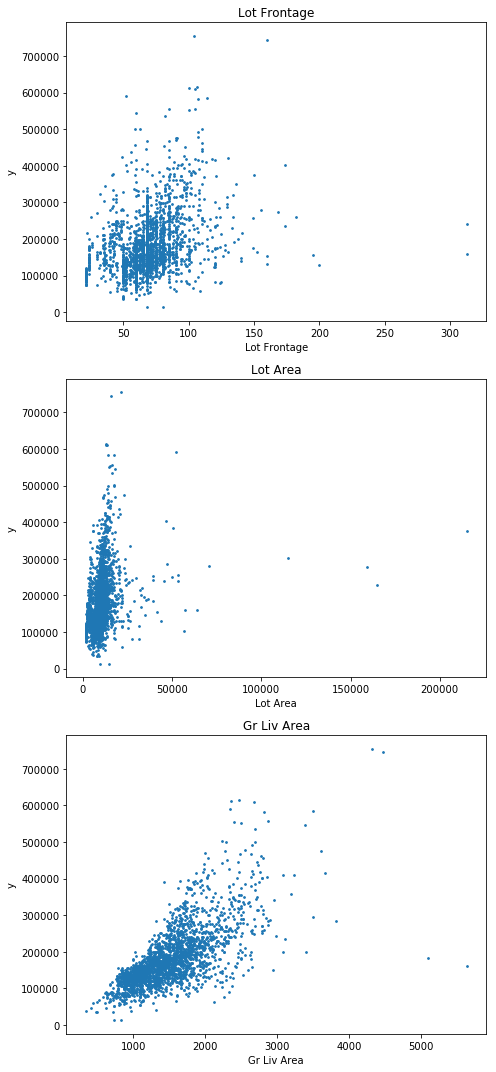

In [125]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (7, 15))
for feature, ax in zip(raw[['Lot Frontage','Lot Area', 'Gr Liv Area']], axes.ravel()):
    ax.scatter(raw[feature], raw.SalePrice, s = 3)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

By visual inspection we see 4 extreme outliers (mentioned in the accompamying documentation.txt by the author). Two of them have a Sale Price that likely does not represent actual market values and two of them are simply unusual sales (very large houses priced relatively appropriately). I will remove them from the dataset.

I check for __multi-feature outliers__ with respect to two features which hold information about the the Lot of the houses, namely 'Lot Area' and 'Lot Frontage'.

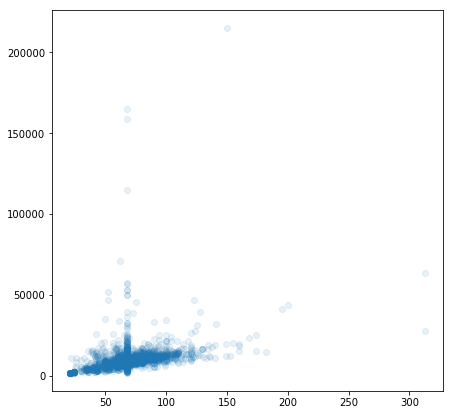

In [126]:
fig, axes = plt.subplots(figsize = (7,7))
plt.scatter(raw['Lot Frontage'],raw['Lot Area'], alpha = 0.1)

I observe that the extreme outliers are for both features extreme values, an observation that  strengthens the argument towards removing them.

I will remove the follwing extreme outliers by hand (as seen by observing the graphs in serveral features). By extreme outliers I mean the values that do not follow the distribution of the data. Having said that, they can lead to wrong coefficients during the learning phase (training).

In [127]:
e_outliers = raw.loc[(raw['Gr Liv Area'] > 4000) | 
                     (raw['Lot Frontage'] > 250) | 
                     (raw['Lot Area'] > 100000) | 
                     (raw['Mas Vnr Area'] > 1400) |
                     (raw['BsmtFin SF 1'] > 3000) |
                     (raw['BsmtFin SF 2'] > 1200) |
                     (raw['Total Bsmt SF'] > 3000) |
                     (raw['1st Flr SF'] > 3000) |
                     (raw['2nd Flr SF'] > 1500) |
                     (raw['Wood Deck SF'] > 1400) |
                     (raw['Enclosed Porch'] > 400)   , :]

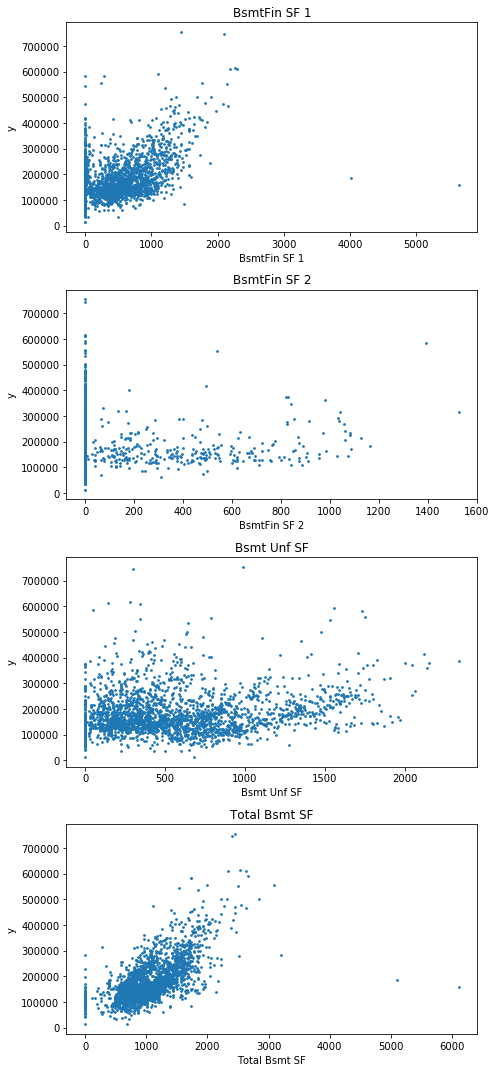

In [128]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (7, 15))
for feature, ax in zip(raw[[ 'BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF',]], axes.ravel()):
    ax.scatter(raw[feature], raw.SalePrice, s = 3)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

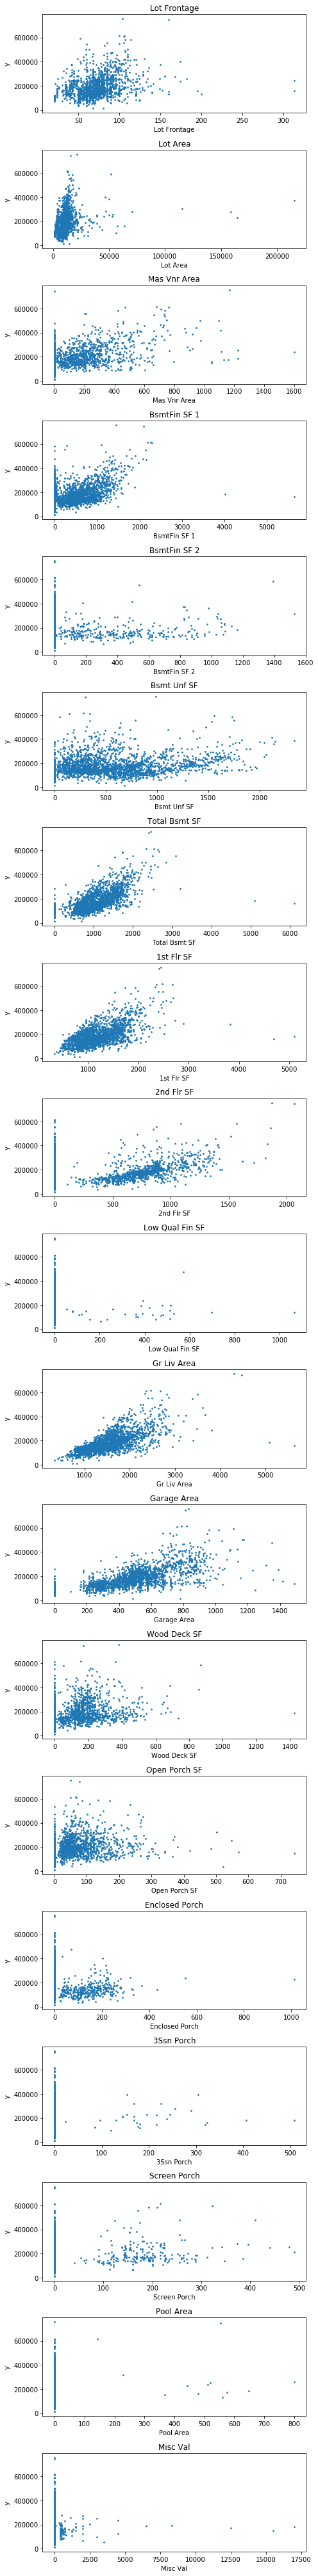

In [129]:
fig, axes = plt.subplots(nrows = 19, ncols = 1, figsize = (7, 56))
for feature, ax in zip(continuous, axes.ravel()):
    ax.scatter(raw[feature], raw.SalePrice, s = 3)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

I observe that the 'Lot Area', 'Gr Liv Area', 'FirstFlr SF' are features that exhibit a linear relationship (to highly degree proportional) with the target variable 'SalePrice'. this means that these features will be important for the modelling of the 'SalePrice'.

I will now plot the discrete features of my dataset.

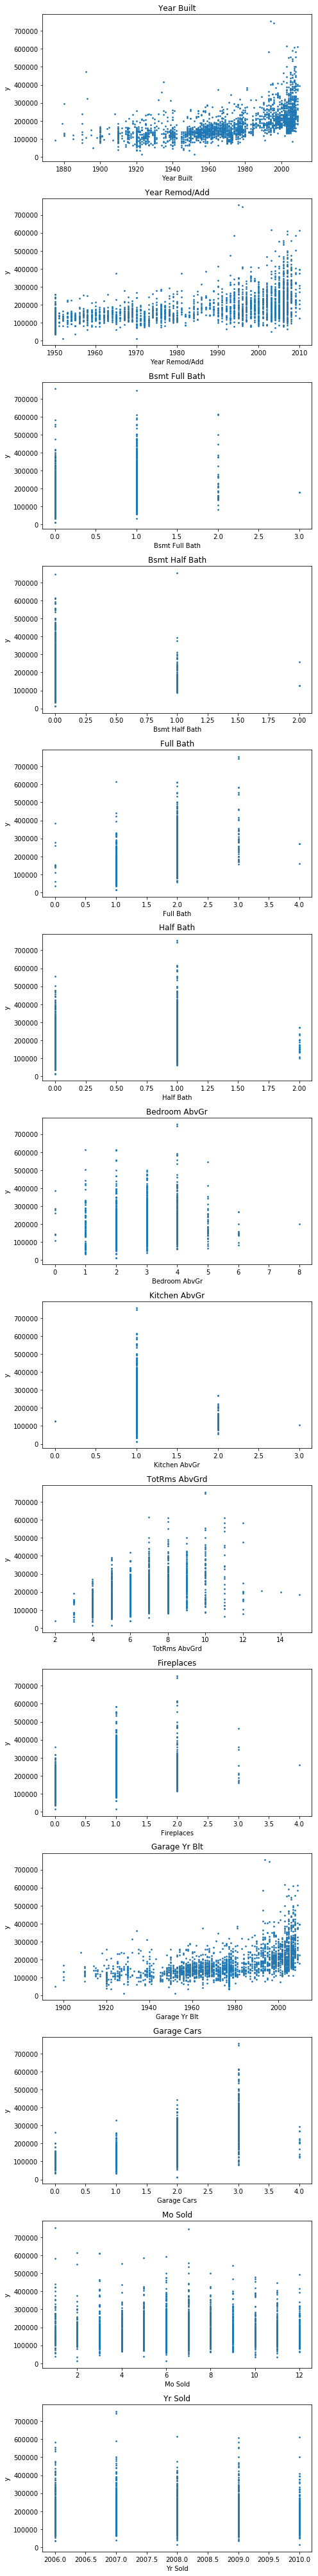

In [130]:
fig, axes = plt.subplots(nrows = 14, ncols = 1, figsize = (7, 56))
for feature, ax in zip(discrete, axes.ravel()):
    ax.scatter(raw[feature], raw.SalePrice, s = 3)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

Specifically for the 'Garage Yr Blt' feature, I will plot it independently removing the 0 values.

In [131]:
gar = raw.loc[raw['Garage Yr Blt'] > 0, :]

In [132]:
gar.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape Land Contour  \
0          60        RL          68.0      8795   Pave       IR1          Lvl   
1          20        RL          75.0     10170   Pave       Reg          Lvl   
2         160        RM          21.0      2001   Pave       Reg          Lvl   
3          20        RL          70.0     10552   Pave       IR1          Lvl   
4         190        RM          60.0     10120   Pave       IR1          Bnk   

  Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2  \
0    AllPub     Inside        Gtl      Gilbert        Norm        Norm   
1    AllPub     Corner        Gtl        NAmes        Norm        Norm   
2    AllPub     Inside        Gtl      MeadowV        Norm        Norm   
3    AllPub     Inside        Gtl        NAmes        Norm        Norm   
4    AllPub     Inside        Gtl      OldTown       Feedr        Norm   

  Bldg Type House Style Overall Qual Overall Cond  Year Built  Year Remod/Add  \
0      1Fam      2Story            7            5        2000            2000   
1      1Fam      1Story            6            6        1951            1951   
2     Twnhs      2Story            4            5        1970            1970   
3      1Fam      1Story            5            5        1959            1959   
4    2fmCon      2.5Unf            7            4        1910            1950   

  Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area  \
0      Gable   CompShg      VinylSd      VinylSd         None           0.0   
1        Hip   CompShg      Wd Sdng      Wd Sdng      BrkFace         522.0   
2      Gable   CompShg      CemntBd      CmentBd      BrkFace          80.0   
3        Hip   CompShg      BrkFace      BrkFace         None           0.0   
4        Hip   CompShg      Wd Sdng      Wd Sdng         None           0.0   

  Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure  \
0         Gd         TA      PConc        Gd        TA            No   
1         TA         TA     CBlock        TA        TA            No   
2         TA         TA     CBlock        TA        TA            No   
3         TA         TA     CBlock        TA        TA            No   
4         Fa         TA     CBlock        TA        TA            No   

  BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
0            GLQ         300.0            Unf           0.0        652.0   
1            Unf           0.0            Unf           0.0        216.0   
2            Unf           0.0            Unf           0.0        546.0   
3            Rec        1018.0            Unf           0.0        380.0   
4            Unf           0.0            Unf           0.0        925.0   

   Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  \
0          952.0    GasA         Ex           Y      SBrkr         980   
1          216.0    GasA         TA           Y      SBrkr        1575   
2          546.0    GasA         Fa           Y      SBrkr         546   
3         1398.0    GasA         Gd           Y      SBrkr        1700   
4          925.0    GasA         TA           N      FuseF         964   

   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
0        1276                0         2256               0               0   
1           0                0         1575               0               0   
2         546                0         1092               0               0   
3           0                0         1700               0               1   
4         925                0         1889               0               0   

   Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  \
0          2          1              4              1           Gd   
1          1          1              2              1           Gd   
2          1          1              3              1           TA   
3          1      

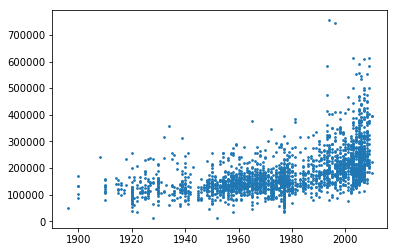

In [133]:
plt.scatter(gar['Garage Yr Blt'], gar.SalePrice, s=3)

In [134]:
e_outliers = raw.loc[(raw['Gr Liv Area'] > 4000) | 
                     (raw['Lot Frontage'] > 250) | 
                     (raw['Lot Area'] > 100000) | 
                     (raw['Mas Vnr Area'] > 1400) |
                     (raw['BsmtFin SF 1'] > 3000) |
                     (raw['BsmtFin SF 2'] > 1200) |
                     (raw['Total Bsmt SF'] > 3000) |
                     (raw['1st Flr SF'] > 3000) |
                     (raw['2nd Flr SF'] > 1500) |
                     (raw['Wood Deck SF'] > 1400) |
                     (raw['Enclosed Porch'] > 400)   , :]

In [135]:
len(discrete)

14

In [136]:
e_outliers

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
71            20        RL         128.0     39290   Pave       IR1   
102           60        RL         160.0     15623   Pave       IR1   
237           60        RL         104.0     21535   Pave       IR1   
267          190        RL          68.0    164660   Grvl       IR1   
283           80        RL          68.0     15957   Pave       IR1   
306           75        RL          60.0     19800   Pave       Reg   
522           60        RL          68.0      9771   Pave       IR3   
602           20        RL          85.0     10655   Pave       IR1   
647           75        RM          90.0     22950   Pave       IR2   
663           90        RL          68.0     11855   Pave       Reg   
838           60        RL         114.0     17242   Pave       IR1   
1304          20        RL         313.0     27650   Pave       IR2   
1315          20        RL          68.0     10750   Pave       IR1   
1500          60        RL         313.0     63887   Pave       IR3   
1513          50        RL          68.0    159000   Pave       IR2   
1582          75        RL         174.0     25419   Pave       Reg   
1680          50        RL          60.0     10410   Pave       Reg   
1724          60        RL          60.0     18062   Pave       IR1   
1960          60        FV          66.0      7399   Pave       IR1   
2056          20        RL         123.0     47007   Pave       IR1   
2092          75        RM          87.0     18386   Pave       Reg   
2239          50        RL         104.0     23920   Pave       Reg   
2257          20        RL         150.0    215245   Pave       IR3   
2316          20        RL          68.0    115149   Pave       IR2   
2329          90        RL          68.0      7939   Pave       Reg   
2393          20        RL         105.0     15431   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
71            Bnk    AllPub     Inside        Gtl      Edwards        Norm   
102           Lvl    AllPub     Corner        Gtl      NoRidge        Norm   
237           Lvl    AllPub     Corner        Gtl      NoRidge        Norm   
267           HLS    AllPub     Corner        Sev       Timber        Norm   
283           Low    AllPub     Corner        Mod      Mitchel        Norm   
306           Lvl    AllPub     Inside        Gtl      Edwards        Norm   
522           Lvl    AllPub     Corner        Gtl      SawyerW        Norm   
602           Lvl    AllPub     Inside        Gtl      NridgHt        Norm   
647           Lvl    AllPub     Inside        Gtl      OldTown      Artery   
663           Lvl    AllPub     Inside        Gtl      SawyerW        Norm   
838           Lvl    AllPub     Inside        Gtl      NoRidge        Norm   
1304          HLS    AllPub     Inside        Mod        NAmes        PosA   
1315          Lvl    AllPub    CulDSac        Gtl      NoRidge        Norm   
1500          Bnk    AllPub     Corner        Gtl      Edwards       Feedr   
1513          Low    AllPub    CulDSac        Sev      ClearCr        Norm   
1582          Lvl    AllPub     Corner        Gtl        NAmes      Artery   
1680          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
1724          HLS    AllPub    CulDSac        Gtl      StoneBr        Norm   
1960          Lvl    AllPub     Inside        Gtl      Somerst        Norm   
2056          Lvl    AllPub     Inside        Gtl      Edwards        Norm   
2092          Lvl    AllPub     Inside        Gtl      OldTown        Norm   
2239          Lvl    AllPub     Inside        Gtl      SawyerW       Feedr   
2257          Low    AllPub     Inside        Sev       Timber        Norm   
2316          Low    AllPub    CulDSac        Sev      ClearCr        Norm   
2329          Lvl    AllPub     Inside        Gtl      SawyerW       Feedr   
2393          Lvl    AllPub     Inside        Gtl      Nrid

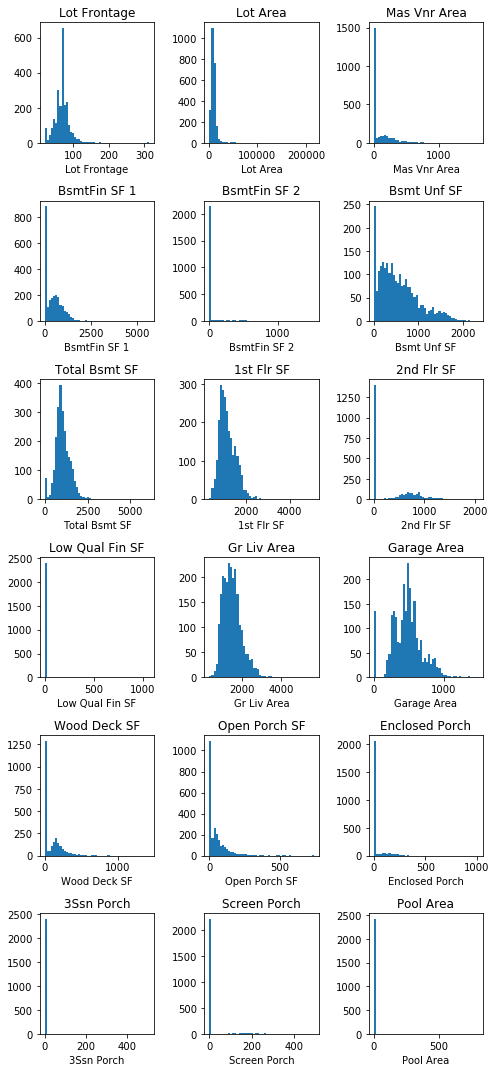

In [137]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (7, 15))
for feature, ax in zip(continuous, axes.ravel()):
    ax.hist(raw[feature], bins = 50)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    plt.tight_layout()

In [138]:
len(e_outliers)

26

In [139]:
raw_filtered = raw.drop(e_outliers.index, axis = 0)

In [140]:
raw.shape

(2430, 76)

In [141]:
raw_filtered.shape

(2404, 76)

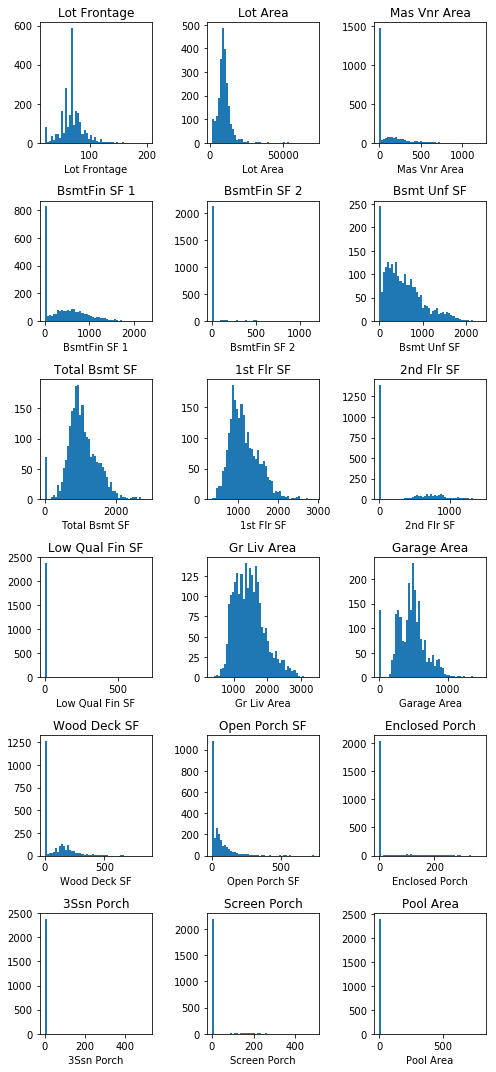

In [142]:
fig, axes = plt.subplots(nrows = 6, ncols = 3, figsize = (7, 15))
for feature, ax in zip(continuous, axes.ravel()):
    ax.hist(raw_filtered[feature], bins = 50)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    plt.tight_layout()

I will check whether it makes sense to log-transform the target variable SalePrice.

Text(0.5, 0, 'SalePrice')

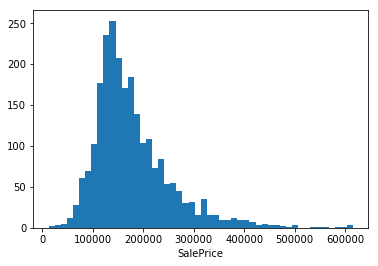

In [143]:
plt.hist(raw_filtered['SalePrice'], bins = 50)
plt.xlabel('SalePrice')

Text(0.5, 0, 'SalePrice')

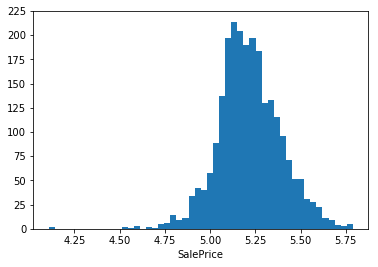

In [144]:
plt.hist(np.log10(raw_filtered['SalePrice']), bins = 50)
plt.xlabel('SalePrice')

From the histograms it is obvious that it makes sense to apply the log transformation to the target variable because in this way we transform the distibution to a symmetrical one. That means that in our model we will not favour the expensive houses (bias) as is the case of a skewed distribution.

In [145]:
raw_filtered.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape Land Contour  \
0          60        RL          68.0      8795   Pave       IR1          Lvl   
1          20        RL          75.0     10170   Pave       Reg          Lvl   
2         160        RM          21.0      2001   Pave       Reg          Lvl   
3          20        RL          70.0     10552   Pave       IR1          Lvl   
4         190        RM          60.0     10120   Pave       IR1          Bnk   

  Utilities Lot Config Land Slope Neighborhood Condition 1 Condition 2  \
0    AllPub     Inside        Gtl      Gilbert        Norm        Norm   
1    AllPub     Corner        Gtl        NAmes        Norm        Norm   
2    AllPub     Inside        Gtl      MeadowV        Norm        Norm   
3    AllPub     Inside        Gtl        NAmes        Norm        Norm   
4    AllPub     Inside        Gtl      OldTown       Feedr        Norm   

  Bldg Type House Style Overall Qual Overall Cond  Year Built  Year Remod/Add  \
0      1Fam      2Story            7            5        2000            2000   
1      1Fam      1Story            6            6        1951            1951   
2     Twnhs      2Story            4            5        1970            1970   
3      1Fam      1Story            5            5        1959            1959   
4    2fmCon      2.5Unf            7            4        1910            1950   

  Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area  \
0      Gable   CompShg      VinylSd      VinylSd         None           0.0   
1        Hip   CompShg      Wd Sdng      Wd Sdng      BrkFace         522.0   
2      Gable   CompShg      CemntBd      CmentBd      BrkFace          80.0   
3        Hip   CompShg      BrkFace      BrkFace         None           0.0   
4        Hip   CompShg      Wd Sdng      Wd Sdng         None           0.0   

  Exter Qual Exter Cond Foundation Bsmt Qual Bsmt Cond Bsmt Exposure  \
0         Gd         TA      PConc        Gd        TA            No   
1         TA         TA     CBlock        TA        TA            No   
2         TA         TA     CBlock        TA        TA            No   
3         TA         TA     CBlock        TA        TA            No   
4         Fa         TA     CBlock        TA        TA            No   

  BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  BsmtFin SF 2  Bsmt Unf SF  \
0            GLQ         300.0            Unf           0.0        652.0   
1            Unf           0.0            Unf           0.0        216.0   
2            Unf           0.0            Unf           0.0        546.0   
3            Rec        1018.0            Unf           0.0        380.0   
4            Unf           0.0            Unf           0.0        925.0   

   Total Bsmt SF Heating Heating QC Central Air Electrical  1st Flr SF  \
0          952.0    GasA         Ex           Y      SBrkr         980   
1          216.0    GasA         TA           Y      SBrkr        1575   
2          546.0    GasA         Fa           Y      SBrkr         546   
3         1398.0    GasA         Gd           Y      SBrkr        1700   
4          925.0    GasA         TA           N      FuseF         964   

   2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  Bsmt Half Bath  \
0        1276                0         2256               0               0   
1           0                0         1575               0               0   
2         546                0         1092               0               0   
3           0                0         1700               0               1   
4         925                0         1889               0               0   

   Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr Kitchen Qual  \
0          2          1              4              1           Gd   
1          1          1              2              1           Gd   
2          1          1              3              1           TA   
3          1      

In [146]:
df_numerical = raw_filtered._get_numeric_data()

In [147]:
f = pd.melt(raw_filtered, value_vars = raw_filtered[continuous])
f

variable  value
0      Lot Frontage   68.0
1      Lot Frontage   75.0
2      Lot Frontage   21.0
3      Lot Frontage   70.0
4      Lot Frontage   60.0
5      Lot Frontage   45.0
6      Lot Frontage   57.0
7      Lot Frontage   98.0
8      Lot Frontage   72.0
9      Lot Frontage   55.0
10     Lot Frontage   35.0
11     Lot Frontage   95.0
12     Lot Frontage   86.0
13     Lot Frontage   68.0
14     Lot Frontage   96.0
15     Lot Frontage   63.0
16     Lot Frontage   50.0
17     Lot Frontage   47.0
18     Lot Frontage   88.0
19     Lot Frontage  108.0
20     Lot Frontage   60.0
21     Lot Frontage   72.0
22     Lot Frontage   68.0
23     Lot Frontage   70.0
24     Lot Frontage  112.0
25     Lot Frontage   85.0
26     Lot Frontage   68.0
27     Lot Frontage   75.0
28     Lot Frontage   60.0
29     Lot Frontage   50.0
30     Lot Frontage   77.0
31     Lot Frontage   60.0
32     Lot Frontage   80.0
33     Lot Frontage   58.0
34     Lot Frontage   68.0
35     Lot Frontage   68.0
36     Lot Frontage   73.0
37     Lot Frontage   32.0
38     Lot Frontage   68.0
39     Lot Frontage   70.0
40     Lot Frontage   35.0
41     Lot Frontage   63.0
42     Lot Frontage   50.0
43     Lot Frontage   76.0
44     Lot Frontage   60.0
45     Lot Frontage   70.0
46     Lot Frontage   63.0
47     Lot Frontage   85.0
48     Lot Frontage   60.0
49     Lot Frontage   70.0
...             ...    ...
45626      Misc Val    0.0
45627      Misc Val    0.0
45628      Misc Val    0.0
45629      Misc Val    0.0
45630      Misc Val    0.0
45631      Misc Val    0.0
45632      Misc Val    0.0
45633      Misc Val    0.0
45634      Misc Val    0.0
45635      Misc Val    0.0
45636      Misc Val  400.0
45637      Misc Val    0.0
45638      Misc Val    0.0
45639      Misc Val    0.0
45640      Misc Val    0.0
45641      Misc Val    0.0
45642      Misc Val    0.0
45643      Misc Val    0.0
45644      Misc Val    0.0
45645      Misc Val    0.0
45646      Misc Val    0.0
45647      Misc Val  400.0
45648      Misc Val    0.0
45649      Misc Val    0.0
45650      Misc Val    0.0
45651      Misc Val    0.0
45652      Misc Val    0.0
45653      Misc Val    0.0
45654      Misc Val    0.0
45655      Misc Val    0.0
45656      Misc Val    0.0
45657      Misc Val    0.0
45658      Misc Val    0.0
45659      Misc Val    0.0
45660      Misc Val    0.0
45661      Misc Val    0.0
45662      Misc Val    0.0
45663      Misc Val    0.0
45664      Misc Val    0.0
45665      Misc Val    0.0
45666      Misc Val    0.0
45667      Misc Val    0.0
45668      Misc Val    0.0
45669      Misc Val    0.0
45670      Misc Val    0.0
45671      Misc Val    0.0
45672      Misc Val    0.0
45673      Misc Val    0.0
45674      Misc Val    0.0
45675      Misc Val    0.0

[45676 rows x 2 columns]

In addition to the previous plots I will plot the kernel density estimation (with normalized histograms, suitably smoothed) for all the numerical features. The bandwidth (window width) of the kernel changes its shape.

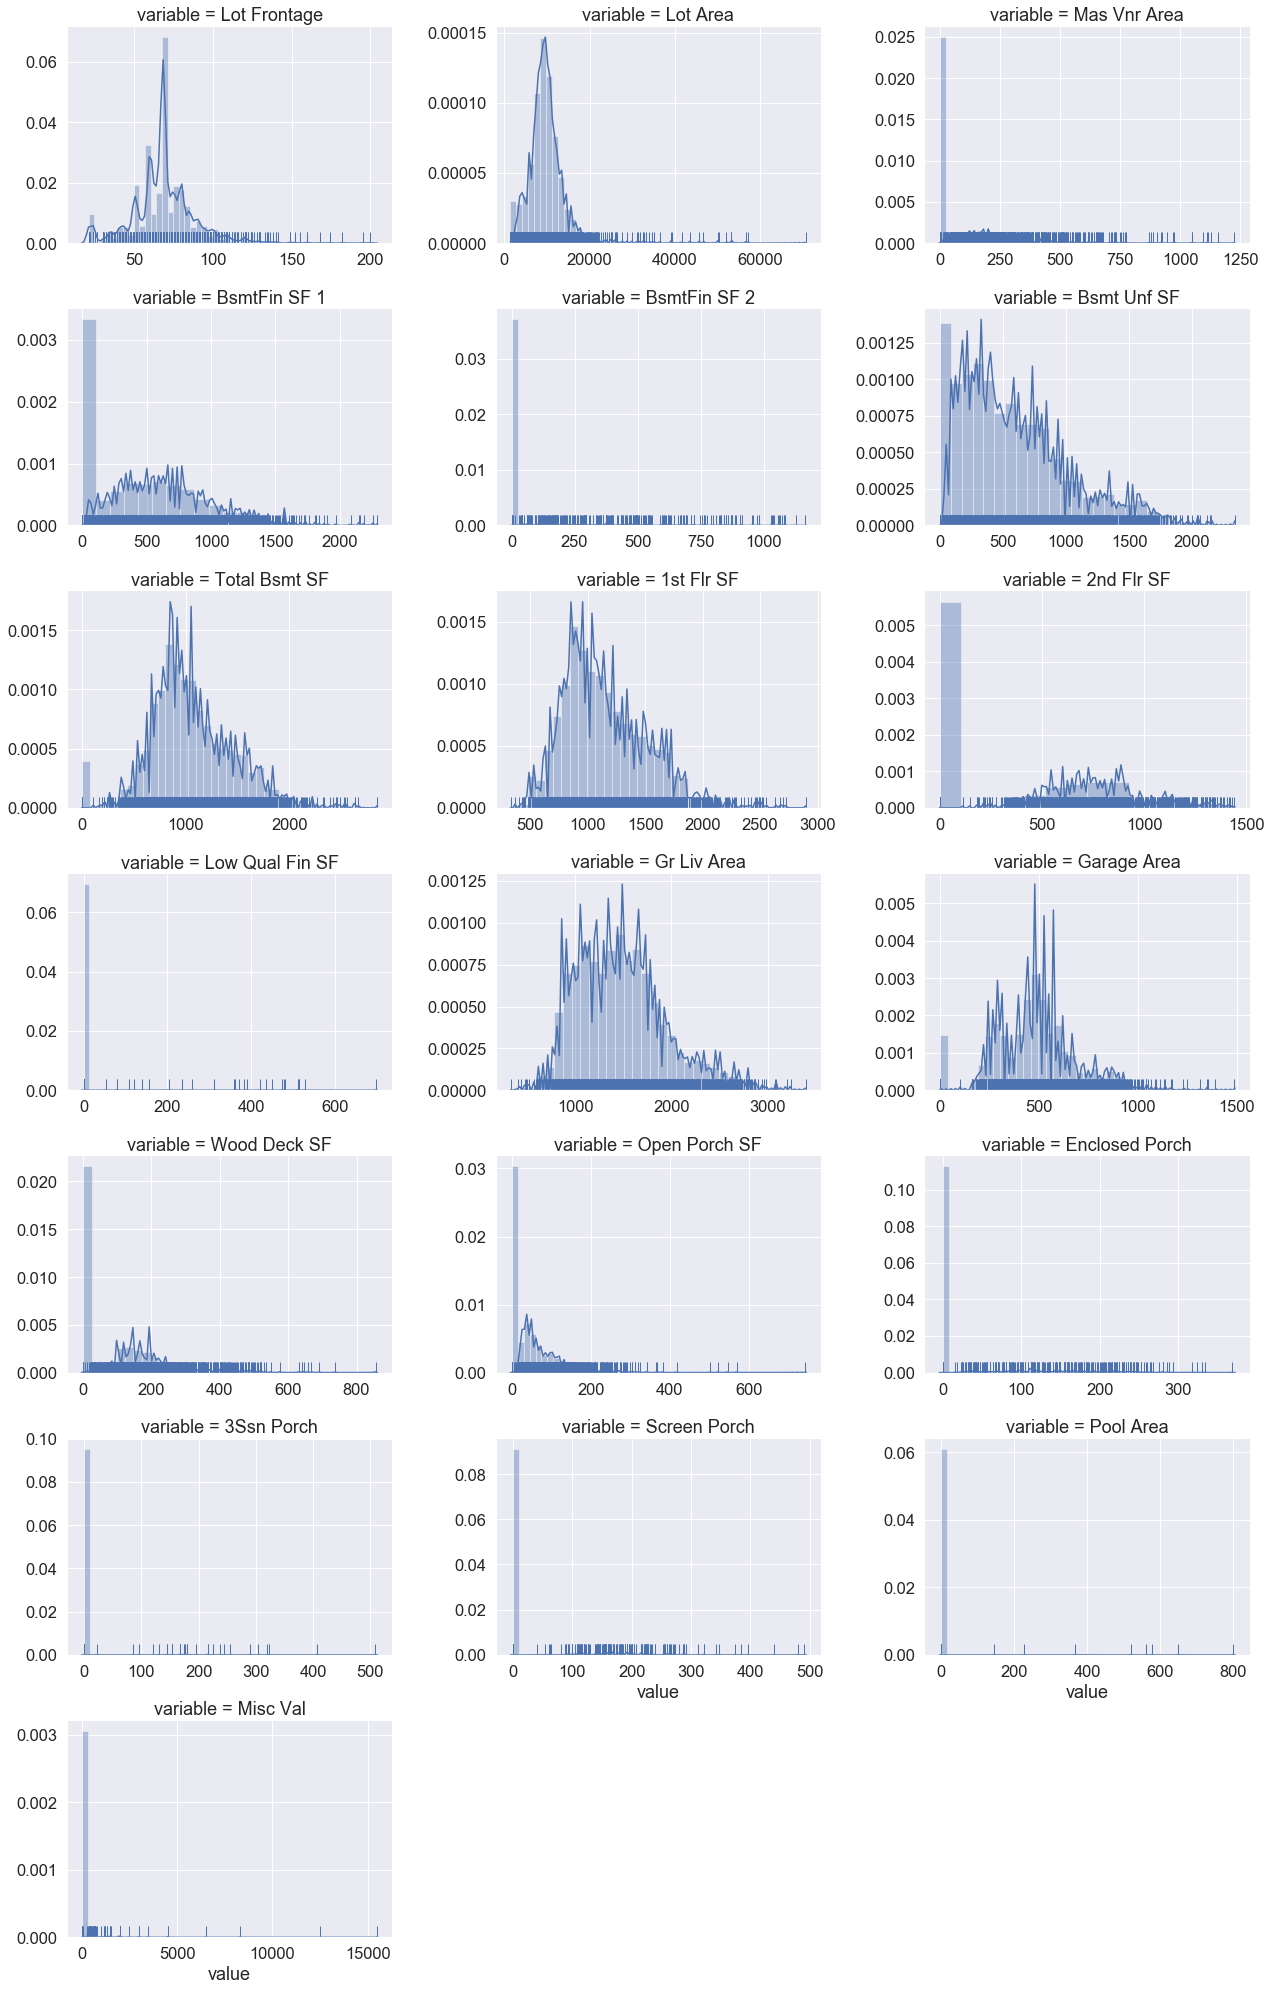

In [148]:
sns.set(font_scale=1.5) 
g = sns.FacetGrid(f, col = 'variable', col_wrap = 3, sharex = False, sharey = False, height = 4, aspect = 1.5)
g = g.map(sns.distplot, 'value', hist = True, kde_kws = {'bw': 1.5}, rug = True)

# sns.distplot(x, fit=norm, kde=False)

Reference: https://towardsdatascience.com/creating-python-functions-for-exploratory-data-analysis-and-data-cleaning-2c462961bd71

I also observe that for some features (e.g. Pool Area) exhibit distributions with a lot of points being zero and the rest of the points exhibit some other distribution. this implies the coexistence of two different subpopulations: one with a Pool and the other without a Pool.

For these cases I will introduce a binary parameter (Pool_exists: Yes/No) that indicates whether the house has a pool or not. I will then look at the subpopulation of houses that have a Pool, examine the distribution of that polupation and flag outliers whithin this subpopulation. 

As mentioned in the comments when we feed both the binary and the numeric feature to a linear regression, the model will assign them a coefficient each. The coefficient for 'Pool exists' can be interpreted as the additional value due to the existence of a pool, while the coefficient for 'Pool Area' can be interpreted as the additional value per unit area. Thus this combination allows for more fine tuning.

another way aould have been to apply log1p first as it maps the 0 subpopulation to itself and only really transforms the non-zero values. I use this transformation later for plotting these features in order to better observe the non zero subpopulations. In case of z-scores htese values need to be filtered out before applying the z-scores or transfered with log1p.

For the features: 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', '2nd Flr SF','Wood Deck SF',
    'Open Porch SF', 'Enclosed Poch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
    'Garage Area'. 
    I will introduce the following boolean variables:

['Pool exists',
'Garage exists',
'Wood Desk exists',
'Mas Vnr exists',
'Oper Porch exists',
'Enclosed Porch exists',
'Screen Porch exists',
'Misc Val exists',
'3Ssn Porch exists',
'BsmtFin1 exists',
'BsmtFin2 exists',
'2nd Flr exists']


From a theoretical perspective the above would not be ideal as they will be highly correlated (near collinearity) with the features they refer to but I will use regularization to deal with features that are nearly collinear.

I will now create the binary (not boolean) features. The boolean features (bool() with values False/True) become binary casting the type 'int64'.

In [149]:
sub_pops = ['Pool Area', 'Garage Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', '2nd Flr SF','Wood Deck SF',
    'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',  'Misc Val']

In [150]:
# or alternatively:
# raw_filtered['Pool exists1']= [0 if x == 0 else 1 for x in raw_filtered['Pool Area']] 
raw_filtered['Pool exists'] = raw_filtered.apply(lambda row: bool(row['Pool Area'] > 0), axis = 1).astype('int64')
raw_filtered['Garage exists'] = raw_filtered.apply(lambda row: bool(row['Garage Area'] > 0), axis = 1).astype('int64')
raw_filtered['Wood Deck exists'] = raw_filtered.apply(lambda row: bool(row['Wood Deck SF'] > 0), axis = 1).astype('int64')
raw_filtered['Mas Vnr exists'] = raw_filtered.apply(lambda row: bool(row['Mas Vnr Area'] > 0), axis = 1).astype('int64')
raw_filtered['Open Porch exists'] = raw_filtered.apply(lambda row: bool(row['Open Porch SF'] > 0), axis = 1).astype('int64')
raw_filtered['Enclosed Porch exists'] = raw_filtered.apply(lambda row: bool(row['Enclosed Porch'] > 0), axis = 1).astype('int64')
raw_filtered['3Ssn Porch exists'] = raw_filtered.apply(lambda row: bool(row['3Ssn Porch'] > 0), axis = 1).astype('int64')
raw_filtered['Screen Porch exists'] = raw_filtered.apply(lambda row: bool(row['Screen Porch'] > 0), axis = 1).astype('int64')
raw_filtered['Misc Val exists'] = raw_filtered.apply(lambda row: bool(row['Misc Val'] > 0), axis = 1).astype('int64')
raw_filtered['BsmtFin1 exists'] = raw_filtered.apply(lambda row: bool(row['BsmtFin SF 1'] > 0), axis = 1).astype('int64')
raw_filtered['BsmtFin2 exists'] = raw_filtered.apply(lambda row: bool(row['BsmtFin SF 2'] > 0), axis = 1).astype('int64')
raw_filtered['2nd Flr exists'] = raw_filtered.apply(lambda row: bool(row['2nd Flr SF'] > 0), axis = 1).astype('int64')


In [151]:
raw_filtered.loc[raw_filtered['Pool Area']>0, :].head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
93           20        RL          78.0     10140   Pave       Reg   
272          20        RL          70.0     18044   Pave       IR1   
321          20        RL         106.0     12720   Pave       Reg   
786          60        RL          80.0     16692   Pave       IR1   
979          20        RL         200.0     43500   Pave       Reg   

    Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
93           Lvl    AllPub     Inside        Gtl       NWAmes        Norm   
272          HLS    AllPub    CulDSac        Gtl      Crawfor        Norm   
321          HLS    AllPub     Inside        Mod      NridgHt        Norm   
786          Lvl    AllPub     Inside        Gtl       NWAmes        RRAn   
979          Lvl    AllPub     Inside        Gtl      Mitchel      Artery   

    Condition 2 Bldg Type House Style Overall Qual Overall Cond  Year Built  \
93         Norm      1Fam      1Story            6            6        1974   
272        Norm      1Fam      1Story            8            5        1986   
321        Norm      1Fam      1Story           10            5        2003   
786        Norm      1Fam      2Story            7            5        1978   
979        Norm      1Fam      1Story            3            5        1953   

     Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
93             1999        Hip   CompShg      HdBoard      HdBoard   
272            1986      Gable   CompShg      WdShing      Plywood   
321            2003        Hip   CompShg      MetalSd      MetalSd   
786            1978      Gable   CompShg      Plywood      Plywood   
979            1953      Gable   CompShg      MetalSd      MetalSd   

    Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
93       BrkFace          99.0         TA         TA     CBlock        TA   
272         None           0.0         Gd         TA     CBlock        Gd   
321        Stone         680.0         Ex         TA      PConc        Ex   
786      BrkFace         184.0         TA         TA     CBlock        Gd   
979         None           0.0         TA         TA     CBlock        NA   

    Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
93         TA            No            ALQ         663.0            LwQ   
272        TA            No            Unf           0.0            Unf   
321        TA            Gd            GLQ        2257.0            Unf   
786        TA            No            BLQ         790.0            LwQ   
979        NA            NA             NA           0.0             NA   

     BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
93          377.0          0.0         1040.0    GasA         Fa           Y   
272           0.0        279.0          279.0    GasA         Gd           Y   
321           0.0        278.0         2535.0    GasA         Ex           Y   
786         469.0        133.0         1392.0    GasA         TA           Y   
979           0.0          0.0            0.0    GasA         Ex           Y   

    Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
93       SBrkr        1309           0                0         1309   
272      SBrkr        2726           0                0         2726   
321      SBrkr        2470           0                0         2470   
786      SBrkr        1392        1392                0         2784   
979      SBrkr        2034           0                0         2034   

     Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
93                1               0          1          1              3   
272               0               0          2          1              2   
321               2               0          1          1              1   
786               1               0          3          1              5   
979             

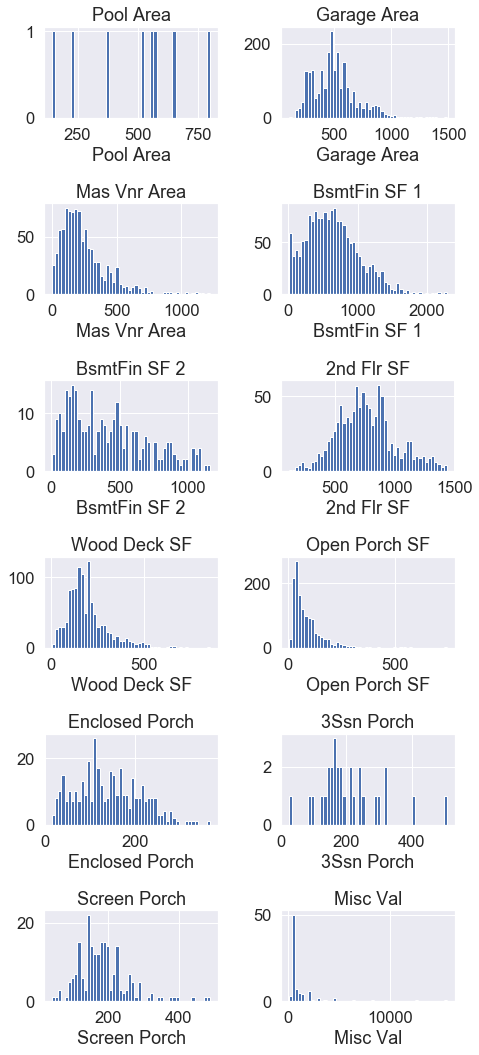

In [152]:
fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize = (7, 15))
for feature, ax in zip(sub_pops, axes.ravel()):
    subpop = raw_filtered.loc[raw_filtered[feature] > 0, :]
    ax.hist(subpop[feature], bins = 50)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    plt.tight_layout()

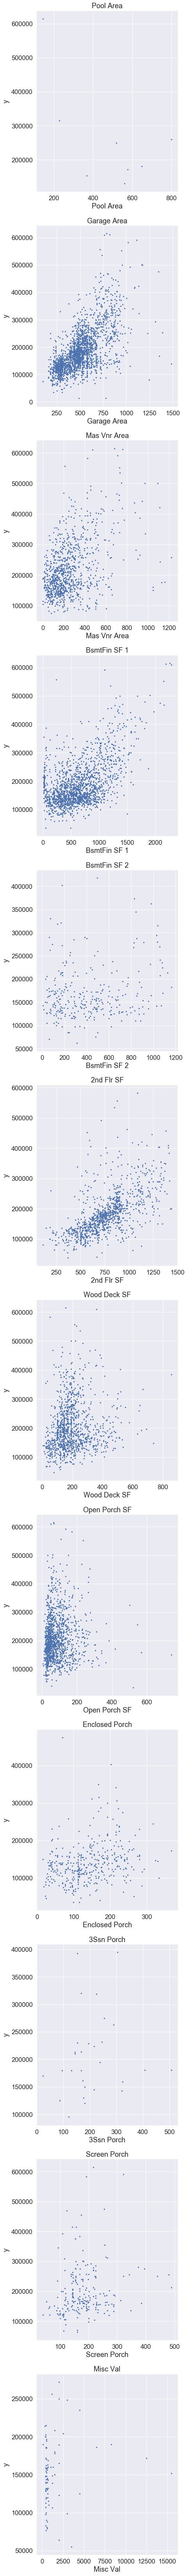

In [153]:
fig, axes = plt.subplots(nrows = 12, ncols = 1, figsize = (7, 92))
for feature, ax in zip(sub_pops, axes.ravel()):
    subpop = raw_filtered.loc[raw_filtered[feature] > 0, :]
    ax.scatter(subpop[feature], subpop.SalePrice, s = 5)
    ax.set(title = '{}'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

For some features e.g. 'Pool Area', 'Misc Val', '3Ssn Porch' etc. the non-zero data points are not enough to form a clear distribution so I cannot make a statement whether they follow the mainstream distribution or they deviate significantly from it. So at this point I will not remove further outliers from these features. I could only flag the following points as outliers:

In [154]:
s_outliers = raw_filtered.loc[(raw_filtered['Wood Deck SF'] > 800) | 
                              (raw_filtered['Open Porch SF'] > 450), :]

In [155]:
s_outliers

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
467           50        RM          60.0     10440   Pave       Reg   
842           20        RL          68.0     50271   Pave       IR1   
977           30   C (all)          60.0      7879   Pave       Reg   
1223          60        RL          99.0     16779   Pave       Reg   
1672          75        RM          75.0     13500   Pave       Reg   
2117          90        RL          60.0     10890   Pave       Reg   

     Land Contour Utilities Lot Config Land Slope Neighborhood Condition 1  \
467           Lvl    AllPub     Corner        Gtl      OldTown        Norm   
842           Low    AllPub     Inside        Gtl      Veenker        Norm   
977           Lvl    AllPub     Inside        Gtl       IDOTRR        Norm   
1223          Lvl    AllPub     Inside        Gtl       Sawyer       Feedr   
1672          Lvl    AllPub     Inside        Gtl      OldTown      Artery   
2117          Lvl    AllPub     Inside        Gtl        SWISU        Norm   

     Condition 2 Bldg Type House Style Overall Qual Overall Cond  Year Built  \
467         Norm      1Fam      1.5Fin            6            7        1920   
842         Norm      1Fam      1Story            9            5        1981   
977         Norm      1Fam      1Story            4            5        1920   
1223        Norm      1Fam      2Story            5            4        1920   
1672        PosA      1Fam      2.5Unf           10            9        1893   
2117        Norm    Duplex      2Story            5            6        1923   

      Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
467             1950      Gable   CompShg      BrkFace      Wd Sdng   
842             1987      Gable   WdShngl      WdShing      Wd Shng   
977             1950      Gable   CompShg      Wd Sdng      Wd Sdng   
1223            1996      Gable   CompShg      Wd Sdng      Wd Sdng   
1672            2000      Gable   CompShg      Wd Sdng      Wd Sdng   
2117            1950        Hip   CompShg      Wd Sdng      Plywood   

     Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
467          None           0.0         Gd         Gd     BrkTil        Gd   
842          None           0.0         Gd         TA     CBlock        Ex   
977          None           0.0         TA         TA     CBlock        TA   
1223      BrkFace         356.0         TA         Fa     CBlock        Gd   
1672         None           0.0         Ex         Ex     BrkTil        TA   
2117         None           0.0         TA         TA      PConc        TA   

     Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
467         TA            No            LwQ         493.0            Unf   
842         TA            Gd            GLQ        1810.0            Unf   
977         TA            No            Rec         495.0            Unf   
1223        TA            No            BLQ         267.0            Unf   
1672        TA            No            Unf           0.0            Unf   
2117        TA            Mn            Rec         371.0            Unf   

      BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
467            0.0       1017.0         1510.0    GasW         Ex           Y   
842            0.0         32.0         1842.0    GasA         Gd           Y   
977            0.0        225.0          720.0    GasA         TA           N   
1223           0.0        404.0          671.0    GasA         Fa           Y   
1672           0.0       1237.0         1237.0    GasA         Gd           Y   
2117           0.0        925.0         1296.0    Grav         Fa           N   

     Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
467       SBrkr        1584        1208                0         2792   
842       SBrkr        1842           0                0         1842   
977       FuseA         720       

In [156]:
raw_filtered = raw_filtered.drop(s_outliers.index, axis = 0)

Another way of looking at these features is to apply log1p transformation first as it maps the 0 subpopulation to itself and only really transforms the non-zero values.

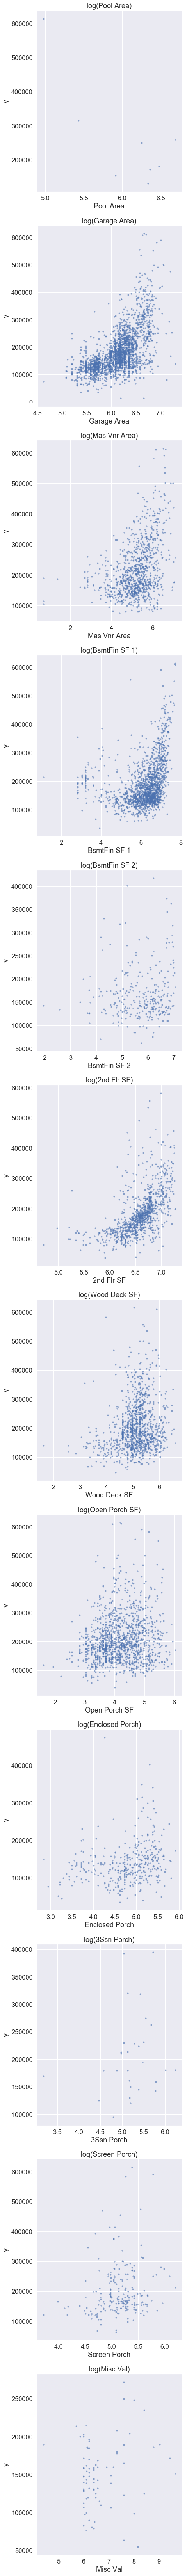

In [157]:
fig, axes = plt.subplots(nrows = 12, ncols = 1, figsize = (7, 92))
for feature, ax in zip(sub_pops, axes.ravel()):
    subpop = raw_filtered.loc[raw_filtered[feature] > 0, :]
    ax.scatter(np.log1p(subpop[feature]), subpop.SalePrice, s = 10, alpha = 0.5)
    ax.set(title = 'log({})'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

Notes on the features:
 -  features candidates for a log1p transformation are features with skewed distributions: 
 the features with two polulationsm basically all the continuous features
    
 - features candidates for a polynomial transformation: 'Garage Yr Blt', 'Year Blt', 'Bsmt Unf SF'
    
 - features with very few data: 'Pool Area', 'BsmtFin 1', 'BsmtFin SF 2', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Misc Val'
 - features candidates for no transformation (linear relationship): the rest   

### 5| Tests for normality 
Not needed at this point. It is obvious by visual inspection that the distributions are not normal.

sns.distplot(...,fit = norm)

### 6| Correlation study

For the numerical (continuous or discrete) features:

In [158]:
raw_filtered.corr()

Lot Frontage  Lot Area  Year Built  Year Remod/Add  \
Lot Frontage               1.000000  0.461801    0.134959        0.082062   
Lot Area                   0.461801  1.000000    0.045505        0.016624   
Year Built                 0.134959  0.045505    1.000000        0.610096   
Year Remod/Add             0.082062  0.016624    0.610096        1.000000   
Mas Vnr Area               0.195880  0.137984    0.321022        0.199091   
BsmtFin SF 1               0.143578  0.170074    0.290384        0.150102   
BsmtFin SF 2               0.025157  0.068189   -0.030899       -0.069913   
Bsmt Unf SF                0.123898  0.059988    0.127180        0.166401   
Total Bsmt SF              0.289632  0.267425    0.423738        0.303040   
1st Flr SF                 0.392218  0.384785    0.328637        0.237457   
2nd Flr SF                 0.000807  0.019933    0.016827        0.154838   
Low Qual Fin SF           -0.003895 -0.013177   -0.126037       -0.051154   
Gr Liv Area                0.316699  0.326908    0.269059        0.324769   
Bsmt Full Bath             0.071612  0.104044    0.214025        0.132128   
Bsmt Half Bath            -0.035671 -0.001370   -0.038461       -0.050023   
Full Bath                  0.159062  0.129943    0.487804        0.459694   
Half Bath                  0.042821  0.061218    0.273677        0.210580   
Bedroom AbvGr              0.220391  0.186551   -0.057087       -0.010242   
Kitchen AbvGr              0.017014 -0.010750   -0.154906       -0.142569   
TotRms AbvGrd              0.309795  0.272726    0.116625        0.202984   
Fireplaces                 0.209188  0.294416    0.191915        0.145103   
Garage Yr Blt              0.090298  0.005318    0.807863        0.631319   
Garage Cars                0.313242  0.250004    0.549959        0.408707   
Garage Area                0.336532  0.277477    0.494060        0.354665   
Wood Deck SF               0.117063  0.162587    0.223415        0.214047   
Open Porch SF              0.138217  0.121473    0.228103        0.254078   
Enclosed Porch            -0.004844  0.014033   -0.391462       -0.234981   
3Ssn Porch                 0.038345  0.035608    0.023026        0.048029   
Screen Porch               0.071982  0.097060   -0.031801       -0.039346   
Pool Area                  0.085810  0.077000    0.000788       -0.021099   
Misc Val                   0.011113  0.040731   -0.024920       -0.016767   
Mo Sold                    0.004648 -0.018216    0.032870        0.027300   
Yr Sold                    0.003094 -0.037275   -0.017504        0.026369   
SalePrice                  0.346708  0.315609    0.590952        0.543606   
Pool exists                0.086013  0.079442    0.006704       -0.017521   
Garage exists              0.104361  0.097085    0.212863        0.092409   
Wood Deck exists           0.067328  0.085775    0.311042        0.284666   
Mas Vnr exists             0.164153  0.083908    0.403464        0.231204   
Open Porch exists          0.116017  0.080536    0.424171        0.400325   
Enclosed Porch exists     -0.049833 -0.017809   -0.475372       -0.267552   
3Ssn Porch exists          0.019741  0.024744    0.022119        0.057000   
Screen Porch exists        0.067459  0.083867   -0.047930       -0.043344   
Misc Val exists            0.024749  0.048029   -0.060538       -0.047122   
BsmtFin1 exists            0.016964  0.045428    0.174322        0.019663   
BsmtFin2 exists            0.012067  0.049421   -0.049487       -0.099175   
2nd Flr exists            -0.105056 -0.063180   -0.111458        0.074125   

                       Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  \
Lot Frontage               0.195880      0.143578      0.025157     0.123898   
Lot Area                   0.137984      0.170074      0.068189     0.059988   
Year Built                 0.321022      0.290384     -0.030899     0.127180   
Year Remod/Add             0.199091      0.150102     -0.069913     0.166401   
Mas

In [159]:
raw_filtered.corr()[['SalePrice']].sort_values(by = 'SalePrice')

SalePrice
Enclosed Porch exists  -0.213954
Enclosed Porch         -0.153968
Kitchen AbvGr          -0.126919
Misc Val exists        -0.067811
Low Qual Fin SF        -0.055911
BsmtFin2 exists        -0.053429
Bsmt Half Bath         -0.041384
Misc Val               -0.020980
BsmtFin SF 2           -0.017693
Yr Sold                -0.016224
Pool Area               0.028617
Mo Sold                 0.037553
3Ssn Porch exists       0.041816
3Ssn Porch              0.043454
Pool exists             0.061535
2nd Flr exists          0.065098
Screen Porch exists     0.091247
Screen Porch            0.104406
Bedroom AbvGr           0.116417
BsmtFin1 exists         0.181960
Bsmt Unf SF             0.183560
2nd Flr SF              0.211463
Garage exists           0.231498
Half Bath               0.278232
Bsmt Full Bath          0.286737
Wood Deck SF            0.311323
Wood Deck exists        0.314570
Lot Area                0.315609
Open Porch SF           0.336854
Lot Frontage            0.346708
Mas Vnr exists          0.415268
Open Porch exists       0.427603
BsmtFin SF 1            0.460916
TotRms AbvGrd           0.478732
Fireplaces              0.485128
Mas Vnr Area            0.520200
Full Bath               0.533058
Garage Yr Blt           0.537321
Year Remod/Add          0.543606
Year Built              0.590952
Garage Area             0.637633
1st Flr SF              0.647914
Garage Cars             0.649442
Total Bsmt SF           0.665906
Gr Liv Area             0.705744
SalePrice               1.000000

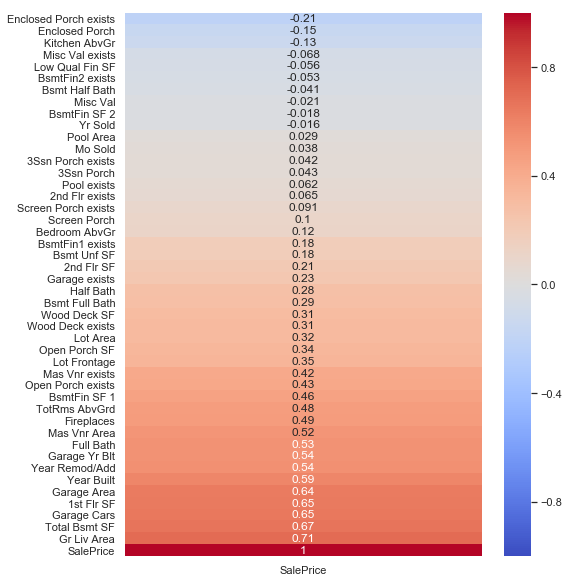

In [160]:
sns.set(font_scale=1)
plt.figure(figsize = (8, 10))
g = sns.heatmap(raw_filtered.corr()[['SalePrice']].sort_values(by = 'SalePrice'),
               annot = True,
               cmap = 'coolwarm',
               vmin = -1,
               vmax = 1,        
               )

We see from the heatmaps that the features 'Total Bsmt SF' and 'Gr Liv Area' are not very highly correlated and  they contribute more to the target variable 'SalePrice'.

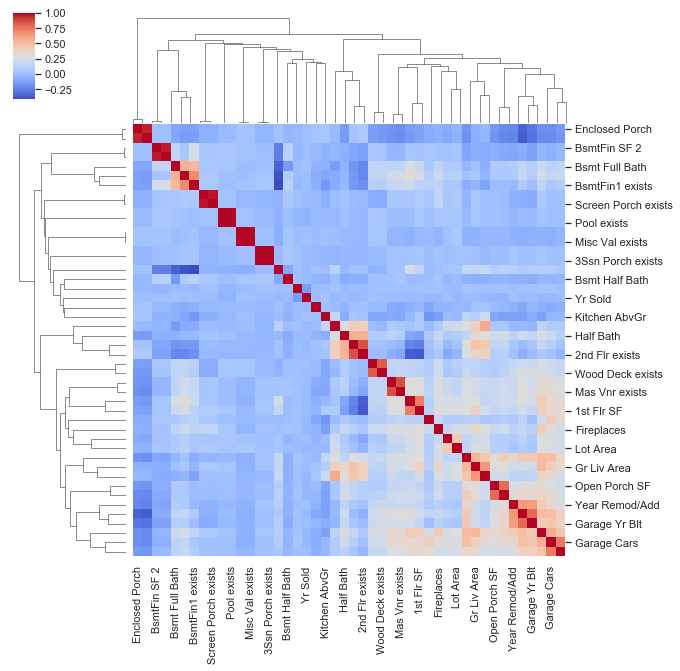

In [161]:
sns.clustermap(raw_filtered.corr(method = 'kendall'),square=True, cmap = 'coolwarm');

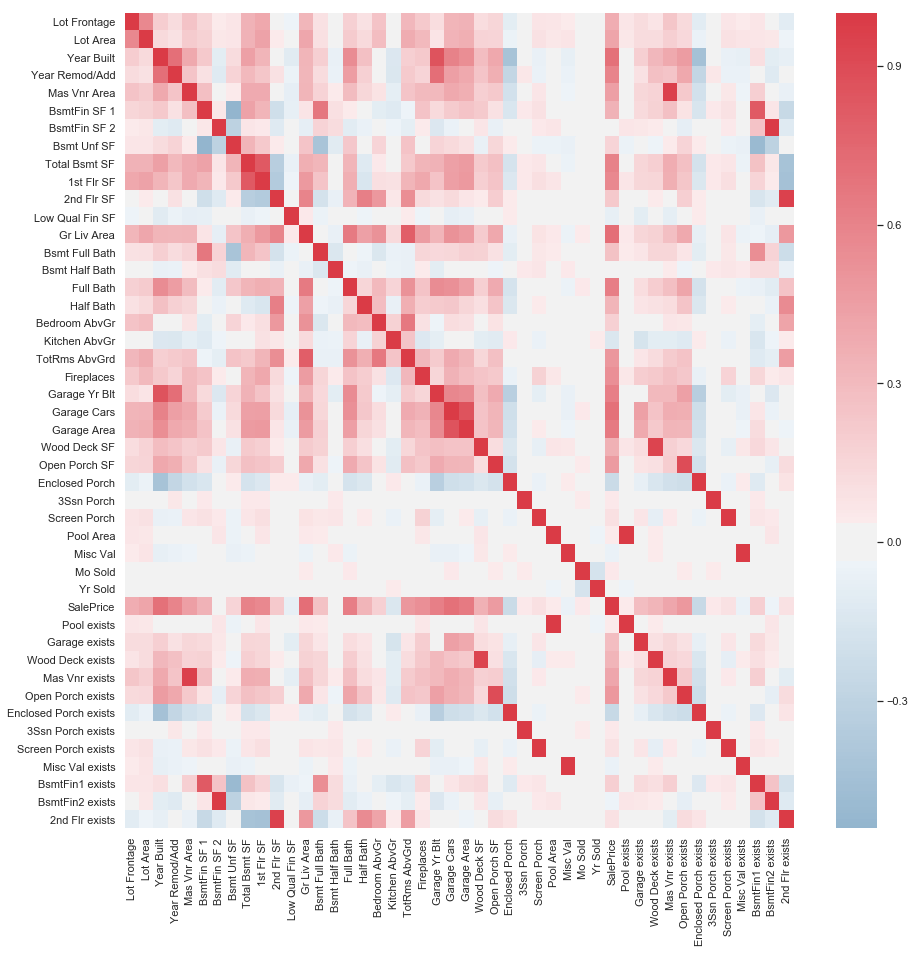

In [162]:
fig, ax = plt.subplots( nrows = 1 , ncols = 1,  figsize=(15, 15))
ax = sns.heatmap(raw_filtered.corr(method = 'spearman'), annot =False, 
                 cmap=sns.diverging_palette(240, 10, n = 10, as_cmap=True), center = 0, square = False)
# sns.heatmap(df.corr(), annot =True, cmap=sns.diverging_palette(240, 10, n = 10, as_cmap=True), center = 0, square = False, ax = ax)

There are some feature which are colinear and can cause ill-conditioning. these Features mainly correspond to the binary features we introduced to deal with the missing values with respect to some features while not droping the whole raws and losing the rest of the information. Some other features like 'Garage Cars' and 'Garage Area' could be considered nearly colinear. Ill conditioning can cause numerical instability will be handled with regularization. therefore I will chose Ridge regressing for the modeling.

### Violin plots for categorical data

In [163]:
len(nominal)

21

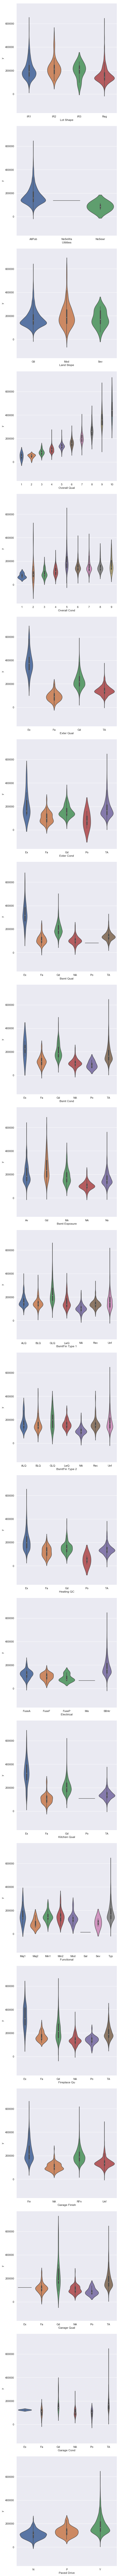

In [164]:
fig, axes = plt.subplots(nrows = 21, ncols = 1, figsize = (7, 147), sharey = True)
for feature, ax in zip(ordinal, axes.ravel()):
   # sns.catplot(x=feature, y="SalePrice", kind="violin", data=raw_filtered)
    sns.violinplot(x=feature, y="SalePrice", kind="violin", data=raw_filtered, ax = ax)
   # sns.violinplot(x = "species", y = iris['petal_length'], data = irise = 'pastel', palette = my_palette[0], ax = axes[0])
   # ax.set(title = 'log({})'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

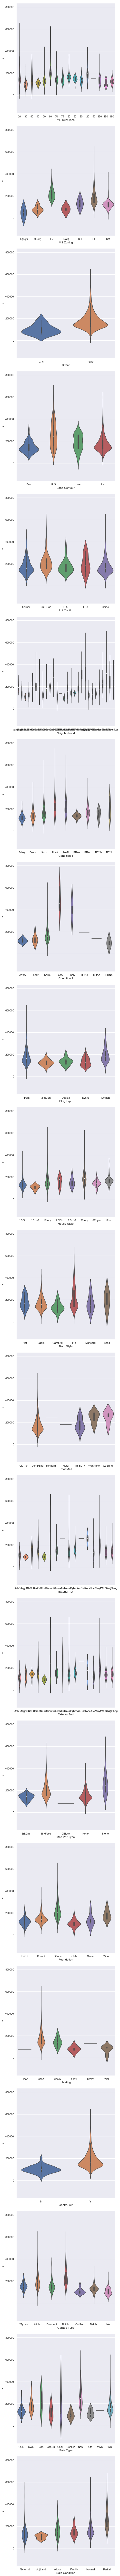

In [165]:
fig, axes = plt.subplots(nrows = 21, ncols = 1, figsize = (7, 147), sharey = True)
for feature, ax in zip(nominal, axes.ravel()):
   # sns.catplot(x=feature, y="SalePrice", kind="violin", data=raw_filtered)
    sns.violinplot(x=feature, y="SalePrice", kind="violin", data=raw_filtered, ax = ax)
   # sns.violinplot(x = "species", y = iris['petal_length'], data = irise = 'pastel', palette = my_palette[0], ax = axes[0])
   # ax.set(title = 'log({})'.format(feature))
    ax.set(xlabel = feature)
    ax.set(ylabel = 'y')
    plt.tight_layout()

There are  some feature which are colinear and can cause ill-conditioning. these Features mainly correspond to the binary features we introduced to deal with the missing values with respect to some features while not droping the whole raws and losing the rest of the information. Some other features like 'Garage Cars' and 'Garage Area' could be considered nearly colinear. Ill conditioning can cause numerical instability will be handled with __regularization__. therefore I will chose Ridge regressing for the modeling.

## Feature encoding

The values of ordinal features indicate an order. In order to retain this information, I will use __label encoding for ordinal features__ and __One-Hot-encoding for nominal features.__

### Label Encoding

In [166]:
#label encoding
ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 
           'Bsmt Qual','Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 
           'Garage Cond', 'Paved Drive']

In [167]:
raw_filtered['Paved Drive'].unique() 

[Y, N, P]
Categories (3, object): [Y, N, P]

In [168]:
df = raw_filtered.copy()

In [169]:
# Label encoding for ordinal features
#le_Lot_shape = LabelEncoder()
Lotshape = {'IR3': 1, 'IR2':2, 'IR1':3, 'Reg':4}
df['Lot Shape'] = df['Lot Shape'].replace(Lotshape)

In [170]:
Util =  {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}
df['Utilities'] = df['Utilities'].replace(Util)
# df['Utilities'].replace(utilities,inplace=True)

In [171]:
Landslope = {'Sev': 1, 'Mod':2, 'Gtl':3}
df['Land Slope'] = df['Land Slope'].replace(Landslope)

In [172]:
#Overall Qual
df['Overall Qual'] = df['Overall Qual'].astype('int64')
df['Overall Cond'] = df['Overall Cond'].astype('int64')

In [173]:
qual = {'NA':-1,'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex': 5}
df['Bsmt Qual'] = df['Bsmt Qual'].replace(qual)
df['Bsmt Cond'] = df['Bsmt Cond'].replace(qual)
df['Exter Qual'] = df['Exter Qual'].replace(qual)
df['Exter Cond'] = df['Exter Cond'].replace(qual)
df['Heating QC'] = df['Heating QC'].replace(qual)
df['Kitchen Qual'] = df['Kitchen Qual'].replace(qual)
df['Fireplace Qu'] = df['Fireplace Qu'].replace(qual)
df['Garage Qual'] = df['Garage Qual'].replace(qual)
df['Garage Cond'] = df['Garage Cond'].replace(qual)

In [174]:
exposure = {'NA': -1, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
df['Bsmt Exposure'].replace(exposure, inplace = True)

In [175]:
fin = {'NA': -1, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ':6 }
df['BsmtFin Type 1'].replace(fin, inplace = True)
df['BsmtFin Type 2'].replace(fin, inplace = True)

In [176]:
electric = {'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5}
df['Electrical'].replace(electric, inplace = True)

In [177]:
function = {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7 , 'Typ': 8}
df['Functional'].replace(function, inplace = True)

In [178]:
gar = {'NA': -1, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types':6}
df['Garage Type'].replace(gar, inplace = True)

In [179]:
garfin = {'NA': -1, 'Unf': 1, 'RFn': 2, 'Fin': 3}
df['Garage Finish'].replace(garfin, inplace = True)

In [180]:
paved = {'N': -1, 'P': 1, 'Y': 2}
df['Paved Drive'].replace(paved, inplace = True)

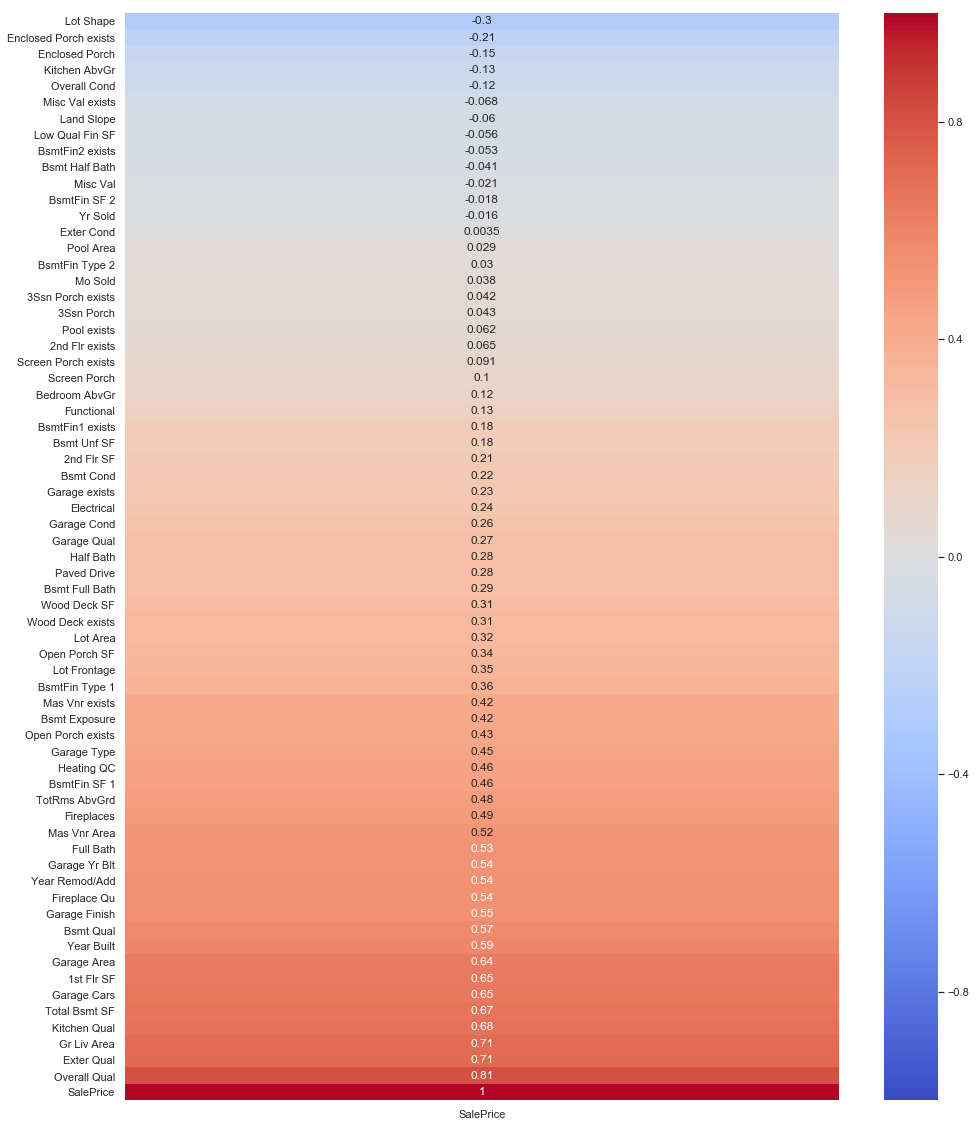

In [181]:
sns.set(font_scale=1)
plt.figure(figsize = (16, 20))
g = sns.heatmap(df.corr()[['SalePrice']].sort_values(by = 'SalePrice'),
               annot = True,
               cmap = 'coolwarm',
               vmin = -1,
               vmax = 1,        
               )

In [182]:
df.shape

(2398, 88)

In [183]:
nominal

['MS SubClass',
 'MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Foundation',
 'Heating',
 'Central Air',
 'Garage Type',
 'Sale Type',
 'Sale Condition']

In [184]:
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
0          60        RL          68.0      8795   Pave          3   
1          20        RL          75.0     10170   Pave          4   
2         160        RM          21.0      2001   Pave          4   
3          20        RL          70.0     10552   Pave          3   
4         190        RM          60.0     10120   Pave          3   

  Land Contour Utilities Lot Config  Land Slope Neighborhood Condition 1  \
0          Lvl         4     Inside           3      Gilbert        Norm   
1          Lvl         4     Corner           3        NAmes        Norm   
2          Lvl         4     Inside           3      MeadowV        Norm   
3          Lvl         4     Inside           3        NAmes        Norm   
4          Bnk         4     Inside           3      OldTown       Feedr   

  Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  Year Built  \
0        Norm      1Fam      2Story             7             5        2000   
1        Norm      1Fam      1Story             6             6        1951   
2        Norm     Twnhs      2Story             4             5        1970   
3        Norm      1Fam      1Story             5             5        1959   
4        Norm    2fmCon      2.5Unf             7             4        1910   

   Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  \
0            2000      Gable   CompShg      VinylSd      VinylSd         None   
1            1951        Hip   CompShg      Wd Sdng      Wd Sdng      BrkFace   
2            1970      Gable   CompShg      CemntBd      CmentBd      BrkFace   
3            1959        Hip   CompShg      BrkFace      BrkFace         None   
4            1950        Hip   CompShg      Wd Sdng      Wd Sdng         None   

   Mas Vnr Area  Exter Qual  Exter Cond Foundation  Bsmt Qual  Bsmt Cond  \
0           0.0           4           3      PConc          4          3   
1         522.0           3           3     CBlock          3          3   
2          80.0           3           3     CBlock          3          3   
3           0.0           3           3     CBlock          3          3   
4           0.0           2           3     CBlock          3          3   

   Bsmt Exposure  BsmtFin Type 1  BsmtFin SF 1  BsmtFin Type 2  BsmtFin SF 2  \
0              1               6         300.0               1           0.0   
1              1               1           0.0               1           0.0   
2              1               1           0.0               1           0.0   
3              1               3        1018.0               1           0.0   
4              1               1           0.0               1           0.0   

   Bsmt Unf SF  Total Bsmt SF Heating  Heating QC Central Air  Electrical  \
0        652.0          952.0    GasA           5           Y           5   
1        216.0          216.0    GasA           3           Y           5   
2        546.0          546.0    GasA           2           Y           5   
3        380.0         1398.0    GasA           4           Y           5   
4        925.0          925.0    GasA           3           N           3   

   1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
0         980        1276                0         2256               0   
1        1575           0                0         1575               0   
2         546         546                0         1092               0   
3        1700           0                0         1700               0   
4         964         925                0         1889               0   

   Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
0               0          2          1              4              1   
1               0          1          1              2              1   
2               0          1          1              3              1   
3               1       

In [185]:
df.shape

(2398, 88)

### One-Hot Encoding

## Feature Engineering

I will try to reduce the number of features by linearly combining certain features that have some relation to each other. Some of the follwing ideas are mentioned in the paper https://www.tandfonline.com/doi/full/10.1080/10691898.2008.11889569 which is recommended by the documentation of this data set.

In [186]:
df['tot Porch SF'] = df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch']

I will adapt the indicator variables respectively combining them.

In [187]:
df['Porch exists'] = df.apply(lambda row: bool(row['Open Porch exists'] | row['Enclosed Porch exists'] | row['3Ssn Porch exists'] | row['Screen Porch exists'] ), axis = 1).astype('int64')

I will also combine the Quality and Condition in one feature applying the same weight to each one, i.e. taking the mean between the two.

In [188]:
df['Overall QC'] = (df['Overall Qual'] + df['Overall Cond'])/2

In [189]:
df['Exter QC'] = (df['Exter Qual'] + df['Exter Cond'])/2

In [190]:
df['Bsmt QC'] = (df['Bsmt Qual'] + df['Bsmt Cond'])/2

In [191]:
df['BsmtFin'] = (df['BsmtFin Type 1'] + df['BsmtFin Type 2'])/2

In [192]:
df['BsmtFin exists'] =  df.apply(lambda row: bool(row['BsmtFin1 exists'] | row['BsmtFin2 exists']), axis = 1).astype('int64')

In [193]:
df['Garage QC'] = (df['Garage Qual'] + df['Garage Cond'])/2

the following new feature  reflects the belief that the half bath is not valued the same as the full bath. 

In [194]:
df['Baths'] = (df['Full Bath'] + 0.5*df['Half Bath'] + df['Bsmt Full Bath'] + 0.5*df['Bsmt Half Bath'])

To reflect that there is there a clearer benefit for homes with four or five bedrooms to have more than one bathroom, I add the follwoing feature:

In [195]:
df['BedBath'] = df['Bedroom AbvGr']*df['Baths']

Looking at the scatterplot of 'Year Built' vs the target variable I observe that for houses built before 1940 can be modeled with a straight line but for years >1940 it becomes quadratic. So I can use an indicator variable to reflect that. 

In [196]:
df['Recently Built'] = df.apply(lambda row: bool(row['Year Built'] > 1940), axis = 1).astype('int64')

Since it holds that df['BsmtFin SF 1'] + df['BsmtFin SF 2'] + df['Bsmt Unf SF'] = df['Total Bsmt SF'] 
and df['1st Flr SF'] + df['2nd Flr SF'] = df['Gr Liv Area'] so I only keep the feature 'Total Bsmt SF' and 'Gr Liv Area'and drop the other to avoid collinearity.

I will add another indicator variable for the existence of Basement.

In [197]:
df['Bsmt exists'] = df.apply(lambda row: bool(row['Total Bsmt SF'] > 0), axis = 1).astype('int64')

In [198]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',

Now I will drop the features that have been used in the combination of the new features in order to avoid collinearity which can cause numerical issues.

In [199]:
df.drop(columns = ['Overall Qual', 'Exter Qual', 'Bsmt Qual', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Qual', 
                   'Garage Cond', 'Overall Cond', 'Exter Cond', 'Bsmt Cond','Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
                   'Screen Porch', 'Full Bath', 'Half Bath', 'Bsmt Full Bath','Bsmt Half Bath', 'BsmtFin SF 1', 
                   'BsmtFin SF 2', 'Bsmt Unf SF', 'Open Porch exists', 'Enclosed Porch exists', '3Ssn Porch exists',
                   'Screen Porch exists','1st Flr SF','2nd Flr SF', 'BsmtFin1 exists', 'BsmtFin2 exists', 
                   '2nd Flr exists'], axis = 1, inplace = True)

In [200]:
df.shape

(2398, 70)

In [201]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Foundation', 'Bsmt Exposure', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition', 'SalePrice',
       'Pool exists', 'Garage exists', 'Wood Deck exists', 'Mas Vnr exists',
       'Misc Val exists', 'tot Porch SF', 'Porch exists', 

In [202]:
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
0          60        RL          68.0      8795   Pave          3   
1          20        RL          75.0     10170   Pave          4   
2         160        RM          21.0      2001   Pave          4   
3          20        RL          70.0     10552   Pave          3   
4         190        RM          60.0     10120   Pave          3   

  Land Contour Utilities Lot Config  Land Slope Neighborhood Condition 1  \
0          Lvl         4     Inside           3      Gilbert        Norm   
1          Lvl         4     Corner           3        NAmes        Norm   
2          Lvl         4     Inside           3      MeadowV        Norm   
3          Lvl         4     Inside           3        NAmes        Norm   
4          Bnk         4     Inside           3      OldTown       Feedr   

  Condition 2 Bldg Type House Style  Year Built  Year Remod/Add Roof Style  \
0        Norm      1Fam      2Story        2000            2000      Gable   
1        Norm      1Fam      1Story        1951            1951        Hip   
2        Norm     Twnhs      2Story        1970            1970      Gable   
3        Norm      1Fam      1Story        1959            1959        Hip   
4        Norm    2fmCon      2.5Unf        1910            1950        Hip   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Foundation  \
0   CompShg      VinylSd      VinylSd         None           0.0      PConc   
1   CompShg      Wd Sdng      Wd Sdng      BrkFace         522.0     CBlock   
2   CompShg      CemntBd      CmentBd      BrkFace          80.0     CBlock   
3   CompShg      BrkFace      BrkFace         None           0.0     CBlock   
4   CompShg      Wd Sdng      Wd Sdng         None           0.0     CBlock   

   Bsmt Exposure  Total Bsmt SF Heating  Heating QC Central Air  Electrical  \
0              1          952.0    GasA           5           Y           5   
1              1          216.0    GasA           3           Y           5   
2              1          546.0    GasA           2           Y           5   
3              1         1398.0    GasA           4           Y           5   
4              1          925.0    GasA           3           N           3   

   Low Qual Fin SF  Gr Liv Area  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  \
0                0         2256              4              1             4   
1                0         1575              2              1             4   
2                0         1092              3              1             3   
3                0         1700              4              1             4   
4                0         1889              4              2             3   

   TotRms AbvGrd  Functional  Fireplaces  Fireplace Qu  Garage Type  \
0              8           8           1             3            3   
1              5           8           1             4            5   
2              6           8           0            -1            5   
3              6           8           1             4            5   
4              9           8           1             4            1   

   Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  Paved Drive  \
0           2000              3            2        554.0            2   
1           1951              1            2        400.0            2   
2           1970              1            1        286.0            2   
3           1959              2            2        447.0            2   
4           1960              1            1        308.0           -1   

   Wood Deck SF  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
0           224          0         0        4     2009       WD    
1             0          0         0        6     2006       WD    
2             0          0         0        1     2007       WD    
3             0          0         0        4     2010       WD    
4             0         

In [203]:
df.shape

(2398, 70)

I redefine the features taking into account the new features from feature engineering.

In [204]:
nominal = ['MS SubClass', 'MS Zoning', 'Street',  'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
           'Sale Type', 'Sale Condition']

ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall QC',  'Exter QC', 
           'Bsmt QC', 'Bsmt Exposure', 'BsmtFin', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage QC', 
           'Paved Drive']

binary = ['Pool exists', 'Garage exists', 'Wood Deck exists', 'Mas Vnr exists','Misc Val exists', 
           'BsmtFin exists', 'Baths', 'BedBath', 'Recently Built', 'Bsmt exists']

continuous = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'Total Bsmt SF', 
             'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
             'tot Porch SF', 'Pool Area', 'Misc Val']

discrete = ['Year Built', 'Year Remod/Add', 'Baths', 
            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
            'Mo Sold', 'Yr Sold']

target = ['SalePrice']



In [205]:
len(nominal) + len(ordinal) + len(binary) + len(continuous) + len(discrete) + len(target)

70

In [206]:
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
0          60        RL          68.0      8795   Pave          3   
1          20        RL          75.0     10170   Pave          4   
2         160        RM          21.0      2001   Pave          4   
3          20        RL          70.0     10552   Pave          3   
4         190        RM          60.0     10120   Pave          3   

  Land Contour Utilities Lot Config  Land Slope Neighborhood Condition 1  \
0          Lvl         4     Inside           3      Gilbert        Norm   
1          Lvl         4     Corner           3        NAmes        Norm   
2          Lvl         4     Inside           3      MeadowV        Norm   
3          Lvl         4     Inside           3        NAmes        Norm   
4          Bnk         4     Inside           3      OldTown       Feedr   

  Condition 2 Bldg Type House Style  Year Built  Year Remod/Add Roof Style  \
0        Norm      1Fam      2Story        2000            2000      Gable   
1        Norm      1Fam      1Story        1951            1951        Hip   
2        Norm     Twnhs      2Story        1970            1970      Gable   
3        Norm      1Fam      1Story        1959            1959        Hip   
4        Norm    2fmCon      2.5Unf        1910            1950        Hip   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Foundation  \
0   CompShg      VinylSd      VinylSd         None           0.0      PConc   
1   CompShg      Wd Sdng      Wd Sdng      BrkFace         522.0     CBlock   
2   CompShg      CemntBd      CmentBd      BrkFace          80.0     CBlock   
3   CompShg      BrkFace      BrkFace         None           0.0     CBlock   
4   CompShg      Wd Sdng      Wd Sdng         None           0.0     CBlock   

   Bsmt Exposure  Total Bsmt SF Heating  Heating QC Central Air  Electrical  \
0              1          952.0    GasA           5           Y           5   
1              1          216.0    GasA           3           Y           5   
2              1          546.0    GasA           2           Y           5   
3              1         1398.0    GasA           4           Y           5   
4              1          925.0    GasA           3           N           3   

   Low Qual Fin SF  Gr Liv Area  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  \
0                0         2256              4              1             4   
1                0         1575              2              1             4   
2                0         1092              3              1             3   
3                0         1700              4              1             4   
4                0         1889              4              2             3   

   TotRms AbvGrd  Functional  Fireplaces  Fireplace Qu  Garage Type  \
0              8           8           1             3            3   
1              5           8           1             4            5   
2              6           8           0            -1            5   
3              6           8           1             4            5   
4              9           8           1             4            1   

   Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  Paved Drive  \
0           2000              3            2        554.0            2   
1           1951              1            2        400.0            2   
2           1970              1            1        286.0            2   
3           1959              2            2        447.0            2   
4           1960              1            1        308.0           -1   

   Wood Deck SF  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
0           224          0         0        4     2009       WD    
1             0          0         0        6     2006       WD    
2             0          0         0        1     2007       WD    
3             0          0         0        4     2010       WD    
4             0         

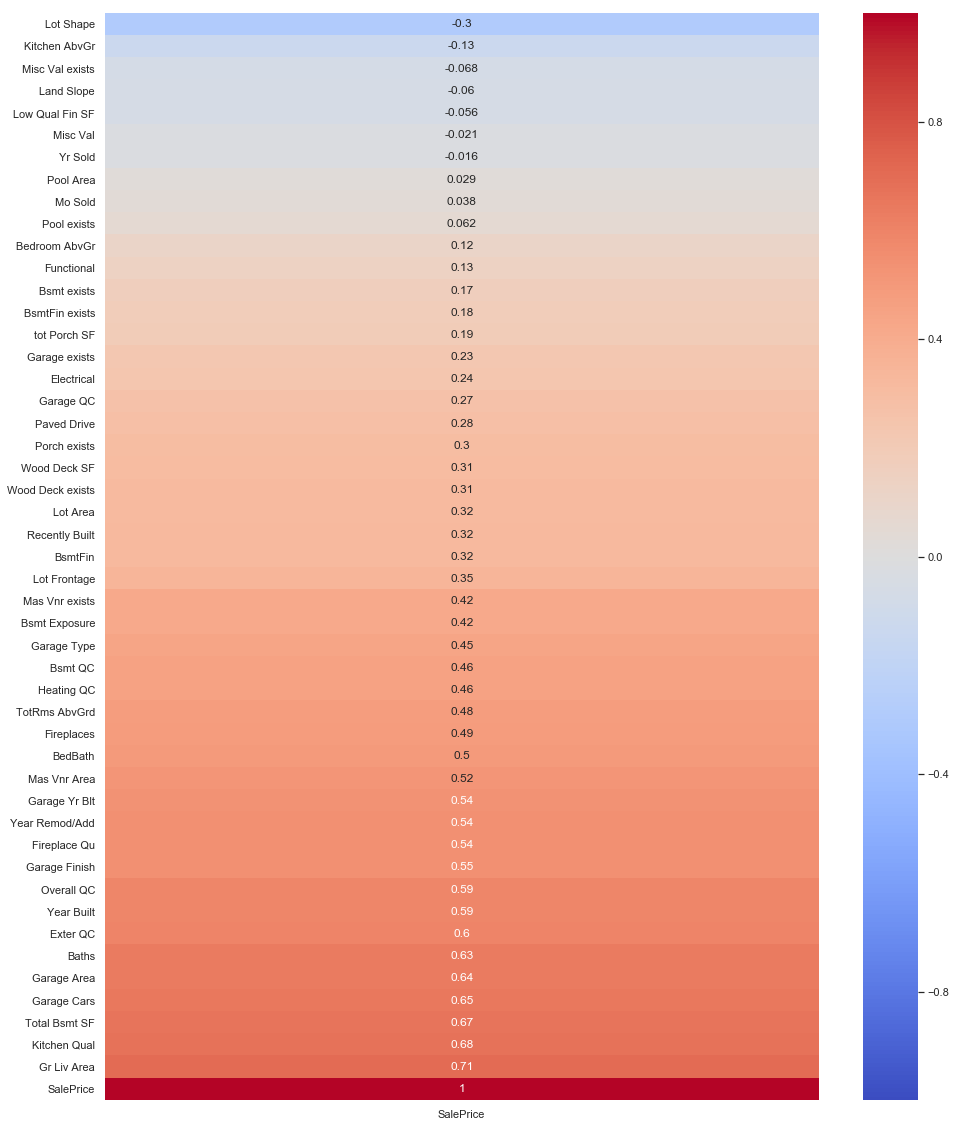

In [207]:
sns.set(font_scale=1)
plt.figure(figsize = (16, 20))
g = sns.heatmap(df.corr()[['SalePrice']].sort_values(by = 'SalePrice'),
               annot = True,
               cmap = 'coolwarm',
               vmin = -1,
               vmax = 1,        
               )

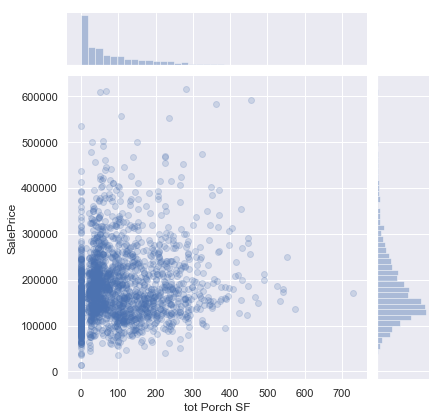

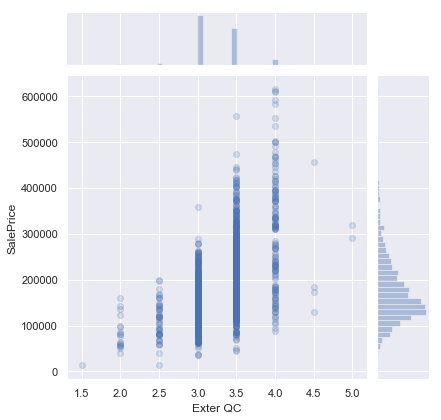

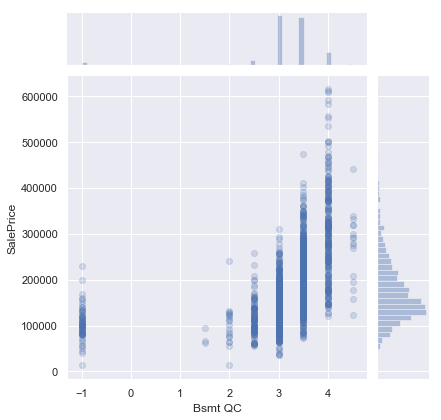

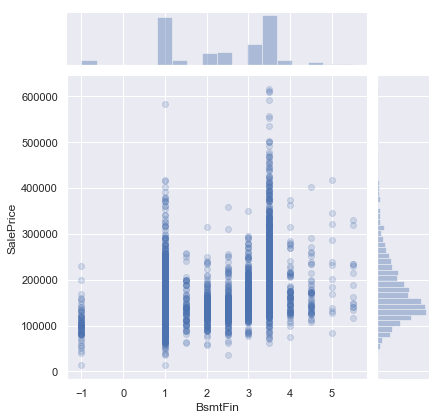

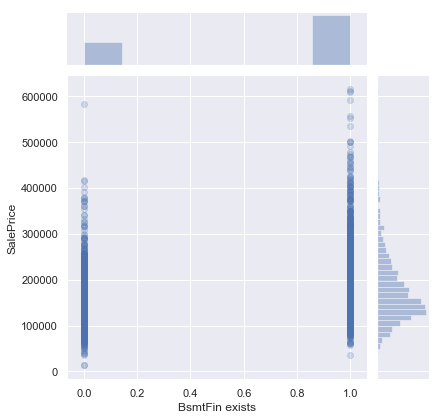

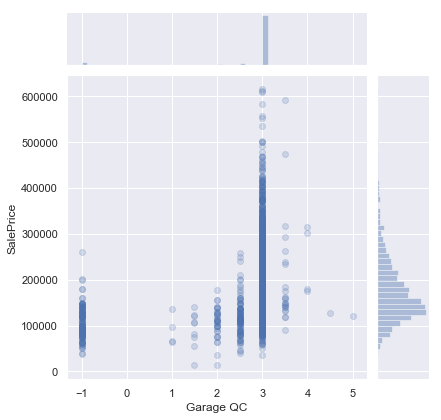

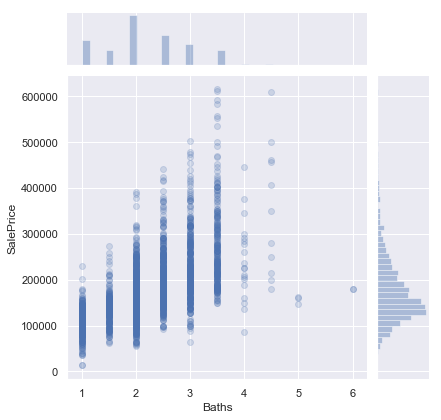

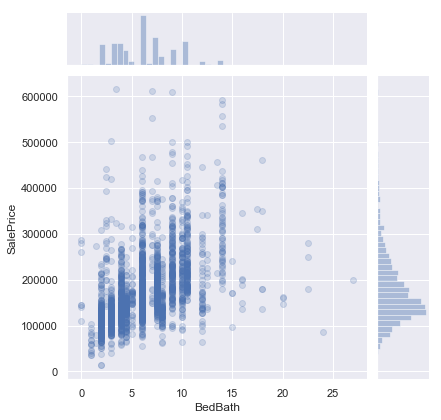

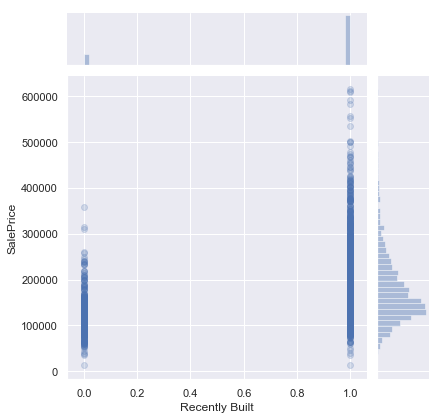

In [208]:
newfeatures = ['tot Porch SF', 'Exter QC', 'Bsmt QC', 'BsmtFin', 'BsmtFin exists', 'Garage QC', 'Baths', 'BedBath', 'Recently Built']

##fig, axes = plt.subplots(nrows = 10, ncols = 1, figsize = (7, 92))
for feature, ax in zip(df[newfeatures], axes.ravel()):
    ax = sns.jointplot((df[feature]), (df['SalePrice']), kind="scatter", alpha = 0.2)

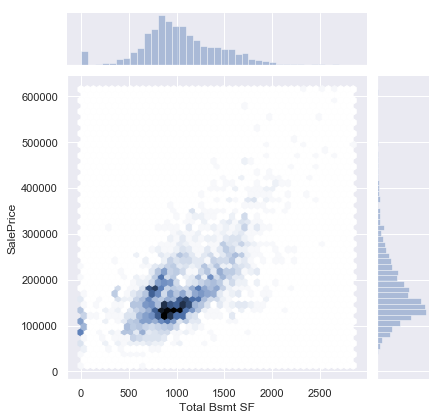

In [209]:
sns.jointplot((df['Total Bsmt SF']), df['SalePrice'],kind="hex")

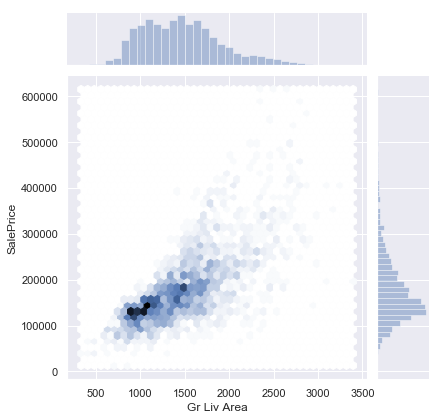

In [210]:
sns.jointplot((df['Gr Liv Area']), df['SalePrice'],kind="hex")

# Model Fit: 
### A1. Fit Simple Model with two variables

__feature selection__
For my simple model I will choose the two following features: 'Gr Liv Area' and the 'Year Blt'.
'Gr Liv Area' is the feature that contributes more to the target variable (heatmap) and according to my intuition the 'Year Blt' is an important parameter for the price of a house i.e. a new houses tend to cost more. furthermore it has a hight correlation score and it is not correlated with 'Gr Liv Area'.

__feature engineering__
it looks like the 'Yr Blt' follows a polymonial relation with the target variable so I will use a polynomial transformation for this feature.
The distribution of the feature 'Gr Liv Area' is skewed so I will use a logarithmic transformation for this feature and a polynomial as well (just to capture the case it is not exactly a straight line).

__Model Selection__
Ridge regression to use Regularization.
For regularization scaling is needed.
(Possible limitation of the output to improve performance)

In [211]:
df_simple = df.reindex(columns = ['Gr Liv Area', 'Year Built', 'SalePrice'])
# or df = df.loc[:, ['Gr Liv Area', 'Year Built', 'SalePrice']]

In [212]:
df_simple.head()

Gr Liv Area  Year Built  SalePrice
0         2256        2000     236000
1         1575        1951     155000
2         1092        1970      75000
3         1700        1959     165500
4         1889        1910     122000

In [213]:
 # duplicates
df_simple.drop_duplicates(keep = False, inplace = True)

the data are already preprocessed with trespect to missing values and duplicates in the cleaning session, so only the feature engineering part is new. The whole function is meant to be used when we get the test data.

In [214]:
def preprocess_simple(df):
    # work on a copy
    df = df.copy()
    
    # feature selection (two variables)
    #df = df.reindex(columns = ['Gr Liv Area', 'Year Built', 'SalePrice'])
   
    # missing values
    
    #np.nanmedian(raw['Year Built']) = 1973
    # np.nanmedian(raw['Gr Liv Area']) = 1440 in case the test set 
    # has missing values on the 'Gr Liv Area' or 'Year Built' features
    

    df['Year Built'] = df['Year Built'].fillna(1973)
    df['Gr Liv Area'] = df['Gr Liv Area'].fillna(1440)
    
   
    
    # feature engineering - log transformation for 'Gr Liv Area'
    df['Gr Liv Area'] = np.log10(df['Gr Liv Area'])
    #df['Year Built'] = np.log1p(df['Year Built'])
   
    # feature engineering adding polynomial features for 'Year Blt'
    for c in ['Gr Liv Area', 'Year Built']:
        for d in [0.5, 2, 3]:
            name = '{}**{}'.format(c, d)
            df[name] = df[c]**d
    
    return df

In [215]:
def preprocess_simple1(df):
    # work on a copy
    df = df.copy()
    
    # feature selection (two variables)
    #df = df.reindex(columns = ['Gr Liv Area', 'Year Built', 'SalePrice'])
   
    # missing values
    
    #np.nanmedian(raw['Year Built']) = 1973
    # np.nanmedian(raw['Gr Liv Area']) = 1440 in case the test set 
    # has missing values on the 'Gr Liv Area' or 'Year Built' features
    

    df['Year Built'] = df['Year Built'].fillna(1973)
    df['Gr Liv Area'] = df['Gr Liv Area'].fillna(1440)
       
    # feature engineering - log transformation for 'Gr Liv Area'
    df['Gr Liv Area'] = np.log10(df['Gr Liv Area'])
    #df['Year Built'] = np.log1p(df['Year Built'])
   
    # feature engineering adding polynomial features for 'Year Blt'
    for c in ['Gr Liv Area']:
        for d in [0.5, 2]:
            name = '{}**{}'.format(c, d)
            df[name] = df[c]**d
    
    return df

In [216]:
pf_obj = PolynomialFeatures(degree=3)
# Create the polynomial features



In [217]:
prep_simple_df = preprocess_simple1(df_simple)

In [218]:
prep_simple_df.head()

Gr Liv Area  Year Built  SalePrice  Gr Liv Area**0.5  Gr Liv Area**2
0     3.353339        2000     236000          1.831212       11.244883
1     3.197281        1951     155000          1.788094       10.222603
2     3.038223        1970      75000          1.743050        9.230797
3     3.230449        1959     165500          1.797345       10.435800
4     3.276232        1910     122000          1.810036       10.733696

In [219]:
y_simple = np.log10(prep_simple_df.SalePrice).values
x = prep_simple_df.loc[:, 'Year Built'].values
X = prep_simple_df.drop(['SalePrice', 'Year Built'], axis = 1).values

In [220]:
from sklearn.preprocessing import PolynomialFeatures
pf_obj = PolynomialFeatures(degree=3, include_bias = True, interaction_only = False)
X_simple1 = pf_obj.fit_transform(
    # Pass two dimensional array
    x[:, np.newaxis] # (A,) -> (A,1)
)

In [221]:
pf_obj.get_feature_names()

['1', 'x0', 'x0^2', 'x0^3']

In [222]:
X.shape

(2380, 3)

In [223]:
x.shape

(2380,)

In [224]:
X_simple = np.concatenate((X, X_simple1), axis = 1)

In [225]:
X_simple.shape

(2380, 7)

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


# Split into train and validation sets
X_tr, X_val, y_tr, y_val = train_test_split(X_simple, y_simple, train_size = 0.8, random_state = 8)

# Standardize features
# scaler = StandardScaler()
scaler = StandardScaler()
X_tr_rescaled = scaler.fit_transform(X_tr)
X_val_rescaled = scaler.transform(X_val)

/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [227]:
X_tr_rescaled.mean(axis = 0)

array([ 2.49007164e-14,  5.59519751e-15,  1.46498126e-15,  0.00000000e+00,
       -2.54032396e-15,  9.51681690e-16, -1.48382269e-15])

In [228]:
X_tr_rescaled.std(axis = 0)

array([1., 1., 1., 0., 1., 1., 1.])

In [229]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.linear_model import Ridge

# Variable store the results of the grid search
gs_results = []

# Grid search
for alpha in np.logspace(-1, 10, num = 500):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_tr_rescaled, y_tr)
    
    # Save model and its performance on train/test sets
    gs_results.append({
        'model': ridge,
        'alpha': alpha,
        'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)),
        'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
        'validation_mse': MSE(y_val, ridge.predict(X_val_rescaled)),
        'validation_mae': MAE(10**y_val, 10**ridge.predict(X_val_rescaled)),
    })
    
    
gs_results = pd.DataFrame(gs_results)
gs_results.head(10)

alpha                                              model     train_mae  \
0  0.100000  Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...  28667.053220   
1  0.105207  Ridge(alpha=0.10520686710236231, copy_X=True, ...  28668.594384   
2  0.110685  Ridge(alpha=0.11068484885494126, copy_X=True, ...  28670.210151   
3  0.116448  Ridge(alpha=0.11644806183726861, copy_X=True, ...  28671.973910   
4  0.122511  Ridge(alpha=0.12251135766041187, copy_X=True, ...  28673.773597   
5  0.128890  Ridge(alpha=0.12889036123908928, copy_X=True, ...  28675.604702   
6  0.135602  Ridge(alpha=0.13560151105656337, copy_X=True, ...  28677.525312   
7  0.142662  Ridge(alpha=0.14266210152607375, copy_X=True, ...  28679.494787   
8  0.150090  Ridge(alpha=0.15009032755797358, copy_X=True, ...  28681.549647   
9  0.157905  Ridge(alpha=0.15790533144741753, copy_X=True, ...  28683.694392   

   train_mse  validation_mae  validation_mse  
0   0.008624    27136.774579        0.007797  
1   0.008625    27138.848557        0.007798  
2   0.008625    27140.969084        0.007798  
3   0.008626    27143.166818        0.007799  
4   0.008627    27145.599599        0.007800  
5   0.008628    27148.080493        0.007801  
6   0.008629    27150.608540        0.007801  
7   0.008630    27153.182663        0.007802  
8   0.008631    27155.801677        0.007803  
9   0.008632    27158.464293        0.007804

In [230]:
gs_results.validation_mse.idxmin()

0

In [231]:
gs_results.loc[0]

alpha                                                           0.1
model             Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...
train_mae                                                   28667.1
train_mse                                                 0.0086239
validation_mae                                              27136.8
validation_mse                                           0.00779722
Name: 0, dtype: object

In [232]:
gs_results.loc[gs_results.validation_mse.idxmin()]

alpha                                                           0.1
model             Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...
train_mae                                                   28667.1
train_mse                                                 0.0086239
validation_mae                                              27136.8
validation_mse                                           0.00779722
Name: 0, dtype: object

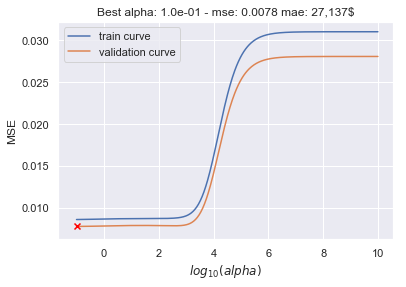

In [233]:
sns.set(font_scale=1)
#sns.set_style("whitegrid")
#plt.semilogx(gs_results['alpha'], gs_results['train_mse'],label = 'train curve')
#plt.semilogx(gs_results['alpha'], gs_results['validation_mse'], label = 'validation curve')
plt.plot(np.log10(gs_results['alpha']), gs_results['train_mse'], label='train curve')
plt.plot(np.log10(gs_results['alpha']), gs_results['validation_mse'], label='validation curve')

# Mark best alpha value
best_result = gs_results.loc[gs_results.validation_mse.idxmin()]
plt.scatter(np.log10(best_result.alpha), best_result.validation_mse, marker='x', c='red', zorder=10)
plt.title('Best alpha: {:.1e} - mse: {:.4f} mae: {:,.0f}$'.format(
    best_result.alpha, best_result.validation_mse, best_result.validation_mae))

plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MSE')
plt.legend()
plt.show()

I observe that opposite to the expectations the error of the validation set is lower than the error of the training set.

In [234]:
gs_results

alpha                                              model  \
0    1.000000e-01  Ridge(alpha=0.1, copy_X=True, fit_intercept=Tr...   
1    1.052069e-01  Ridge(alpha=0.10520686710236231, copy_X=True, ...   
2    1.106848e-01  Ridge(alpha=0.11068484885494126, copy_X=True, ...   
3    1.164481e-01  Ridge(alpha=0.11644806183726861, copy_X=True, ...   
4    1.225114e-01  Ridge(alpha=0.12251135766041187, copy_X=True, ...   
5    1.288904e-01  Ridge(alpha=0.12889036123908928, copy_X=True, ...   
6    1.356015e-01  Ridge(alpha=0.13560151105656337, copy_X=True, ...   
7    1.426621e-01  Ridge(alpha=0.14266210152607375, copy_X=True, ...   
8    1.500903e-01  Ridge(alpha=0.15009032755797358, copy_X=True, ...   
9    1.579053e-01  Ridge(alpha=0.15790533144741753, copy_X=True, ...   
10   1.661273e-01  Ridge(alpha=0.1661272522034293, copy_X=True, f...   
11   1.747773e-01  Ridge(alpha=0.17477727744646812, copy_X=True, ...   
12   1.838777e-01  Ridge(alpha=0.18387769800823278, copy_X=True, ...   
13   1.934520e-01  Ridge(alpha=0.19345196537440454, copy_X=True, ...   
14   2.035248e-01  Ridge(alpha=0.20352475211835777, copy_X=True, ...   
15   2.141220e-01  Ridge(alpha=0.21412201548157295, copy_X=True, ...   
16   2.252711e-01  Ridge(alpha=0.2252710642645981, copy_X=True, f...   
17   2.370006e-01  Ridge(alpha=0.23700062920093293, copy_X=True, ...   
18   2.493409e-01  Ridge(alpha=0.24934093699518792, copy_X=True, ...   
19   2.623238e-01  Ridge(alpha=0.26232378821631236, copy_X=True, ...   
20   2.759826e-01  Ridge(alpha=0.27598263924661803, copy_X=True, ...   
21   2.903527e-01  Ridge(alpha=0.29035268849778145, copy_X=True, ...   
22   3.054710e-01  Ridge(alpha=0.30547096711599697, copy_X=True, ...   
23   3.213764e-01  Ridge(alpha=0.32137643441002783, copy_X=True, ...   
24   3.381101e-01  Ridge(alpha=0.33811007824806855, copy_X=True, ...   
25   3.557150e-01  Ridge(alpha=0.3557150206821386, copy_X=True, f...   
26   3.742366e-01  Ridge(alpha=0.3742366290721982, copy_X=True, f...   
27   3.937226e-01  Ridge(alpha=0.39372263299634813, copy_X=True, ...   
28   4.142232e-01  Ridge(alpha=0.41422324724838966, copy_X=True, ...   
29   4.357913e-01  Ridge(alpha=0.435791301239703, copy_X=True, fi...   
30   4.584824e-01  Ridge(alpha=0.4584823751389096, copy_X=True, f...   
31   4.823549e-01  Ridge(alpha=0.48235494310014687, copy_X=True, ...   
32   5.074705e-01  Ridge(alpha=0.5074705239490469, copy_X=True, f...   
33   5.338938e-01  Ridge(alpha=0.5338938397147355, copy_X=True, f...   
34   5.616930e-01  Ridge(alpha=0.561692982416381, copy_X=True, fi...   
35   5.909396e-01  Ridge(alpha=0.5909395895340971, copy_X=True, f...   
36   6.217090e-01  Ridge(alpha=0.6217090286163829, copy_X=True, f...   
37   6.540806e-01  Ridge(alpha=0.6540805914998256, copy_X=True, f...   
38   6.881377e-01  Ridge(alpha=0.6881376986415668, copy_X=True, f...   
39   7.239681e-01  Ridge(alpha=0.7239681140910877, copy_X=True, f...   
40   7.616642e-01  Ridge(alpha=0.7616641716552892, copy_X=True, f...   
41   8.013230e-01  Ridge(alpha=0.8013230128396889, copy_X=True, f...   
42   8.430468e-01  Ridge(alpha=0.8430468371788972, copy_X=True, f...   
43   8.869432e-01  Ridge(alpha=0.8869431656014711, copy_X=True, f...   
44   9.331251e-01  Ridge(alpha=0.933125117507825, copy_X=True, fi...   
45   9.817117e-01  Ridge(alpha=0.9817117022752196, copy_X=True, f...   
46   1.032828e+00  Ridge(alpha=1.032828125941029, copy_X=True, fi...   
47   1.086606e+00  Ridge(alpha=1.0866061138545975, copy_X=True, f...   
48   1.143184e+00  Ridge(alpha=1.1431842501291503, copy_X=True, f...   
49   1.202708e+00  Ridge(alpha=1.202708334768512, copy_X=True, fi...   
..            ...                                                ...   
450  8.314568e+08  Ridge(alpha=831456780.5772082, copy_X=True, fi...   
451  8.747496e+08  Ridge(alpha=874749630.1554433, copy_X=True, fi...   
452  9.202967e+08  Ridge(alpha=920296680.8760428, copy_X=True, fi...   
453  9.682153e+08  Ridge(alpha=968215305.9967096, co

In [235]:
print('Coefficients:', ridge.coef_)
print('Intercept:', ridge.intercept_)
print('R^2:', ridge.score(X_tr, y_tr))

Coefficients: [2.42630210e-08 2.42673130e-08 2.42394578e-08 0.00000000e+00
 2.12539615e-08 2.13141981e-08 2.13726470e-08]
Intercept: 5.215847425059564
R^2: -866334.6351623465


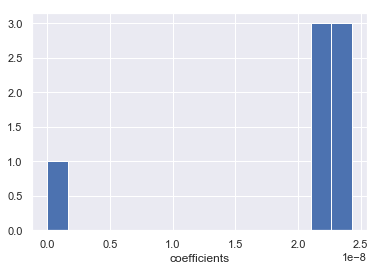

In [236]:
plt.hist(ridge.coef_, bins = 15)
plt.xlabel('coefficients')
plt.show()

### Cross-Validation

I will now use the preprocess_simple and not the preprocess_simple1 as it did not change the results of one runmuch further and is simpler.

Since I use a different preprocessing function I have to rediefine the input matrix.

In [237]:
prep_simple_df = preprocess_simple(df_simple)

In [238]:
prep_simple_df.head()

Gr Liv Area  Year Built  SalePrice  Gr Liv Area**0.5  Gr Liv Area**2  \
0     3.353339        2000     236000          1.831212       11.244883   
1     3.197281        1951     155000          1.788094       10.222603   
2     3.038223        1970      75000          1.743050        9.230797   
3     3.230449        1959     165500          1.797345       10.435800   
4     3.276232        1910     122000          1.810036       10.733696   

   Gr Liv Area**3  Year Built**0.5  Year Built**2  Year Built**3  
0       37.707906        44.721360        4000000     8000000000  
1       32.684530        44.170126        3806401     7426288351  
2       28.045216        44.384682        3880900     7645373000  
3       33.712320        44.260592        3837681     7518017079  
4       35.166077        43.703547        3648100     6967871000

In [239]:
X_simple = prep_simple_df.drop('SalePrice', axis = 1).values
y_simple = np.log10(prep_simple_df.SalePrice).values

I will do cross validation. the reason for this split ratio is to have more data for training the model.

/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packag

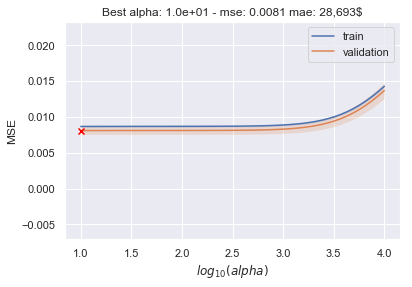

In [240]:
# fit/test N models
scaler_s = StandardScaler()
gs_results = []
for run_idx in range(20):
    #Split into train/test sets
    X_tr, X_val, y_tr, y_val = train_test_split(X_simple, y_simple, train_size =0.8, random_state = run_idx)
    
    X_tr_rescaled = scaler_s.fit_transform(X_tr)
    X_val_rescaled = scaler_s.transform(X_val)
    
    #Grid search for the optimum alpha value
    for alpha in np.logspace(1, 4, num = 50):
        ridge = Ridge(alpha = alpha)
        ridge.fit(X_tr_rescaled, y_tr)
        
         # Save model and its performance on train/test sets
        gs_results.append({
            'model': ridge,
            'alpha': alpha,
            'run_idx': run_idx,
            'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)),
            'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
            'validation_mse': MSE(y_val, ridge.predict(X_val_rescaled)),
            'validation_mae': MAE(10**y_val, 10**ridge.predict(X_val_rescaled)),
        })
    
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)

# Group results by alpha value
gb_alpha = gs_results.groupby('alpha')

# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mse.mean()
mean_val = gb_alpha.validation_mse.mean()
std_tr = gb_alpha.train_mse.std()
std_val = gb_alpha.validation_mse.std()
alphas = mean_tr.index.values

std_val_mae = gb_alpha.validation_mae.std()

# Add marker for best score
best_alpha = mean_val.idxmin()
plt.scatter(np.log10(best_alpha), mean_val.min(), marker='x', c='red', zorder=10)

# Print best MSE/MAE scores
best_result = gb_alpha.get_group(best_alpha)


# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label = 'train')
plt.plot(np.log10(alphas), mean_val, label = 'validation')

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha = 0.2)
plt.fill_between(np.log10(alphas), mean_val-std_val, mean_val+std_val, alpha = 0.2)

plt.title('Best alpha: {:.1e} - mse: {:.4f} mae: {:,.0f}$'.format(
    best_alpha, best_result.validation_mse.mean(), best_result.validation_mae.mean()))

plt.xlabel('$log_{10}(alpha)$')
#plt.xlim(1,200000)
plt.ylabel('MSE')
plt.legend()
plt.show()

I observe that the train set has a larger MSE error than the validation. Normally the opposite trend is expected. I think this has to do with the fact that maybe the validation set has easier examples as the train set for this model and for this split ratio. I also observe that the standard deviation of the validation set is larger. I assume that has to do with the fact that the validation did not have enough data (train-validation: 80%-20% split) or that some outliers were in the validation set.

gs_results.head()

In [241]:
best_alpha

10.0

In [242]:
std_val_mae[best_alpha]

1043.3856217775644

In [243]:
print('The mean MAE of my simple model is {:.3f} ± {:.0f} standard deviation.'.format(best_result.validation_mae.mean(),std_val_mae[best_alpha]))

The mean MAE of my simple model is 28693.127 ± 1043 standard deviation.


The mean MAE for the simple model for the optumiûm alpha is:

In [244]:
mae_simple_mean = best_result.validation_mae.mean()
mae_simple_mean

28693.12678893409

In [245]:
mae_simple = best_result.validation_mae
mae_simple

0      26448.114589
50     29598.907511
100    28853.626923
150    29815.104768
200    28206.014993
250    28588.659903
300    27678.479753
350    27957.517750
400    27350.335429
450    29062.524604
500    28605.825483
550    29447.390133
600    28660.434991
650    29418.298308
700    27649.215351
750    29812.227650
800    31162.949770
850    28436.158908
900    28299.136469
950    28811.612490
Name: validation_mae, dtype: float64

the following code makes the fitting for the best alpha for one split (the last) and will be used for predicting the test set.

In [246]:
ridge_simple = Ridge(alpha = best_alpha)
ridge_simple.fit(X_tr_rescaled, y_tr)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [247]:
print('Coefficients:', ridge_simple.coef_)
print('Intercept:', ridge_simple.intercept_)
print('R^2:', ridge_simple.score(X_tr, y_tr))

Coefficients: [0.01975788 0.01067929 0.01741168 0.02688294 0.03702695 0.00311815
 0.0258052  0.04093261]
Intercept: 5.2168831700213545
R^2: -3.288083143261927e+18


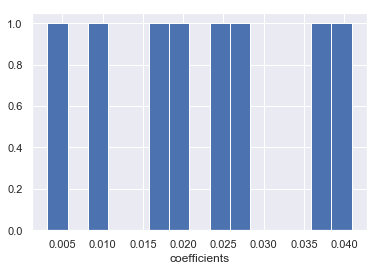

In [248]:
plt.hist(ridge_simple.coef_, bins = 15)
plt.xlabel('coefficients')
plt.show()

### B. an intermediate Model with 10-20 features

The feature selection of the indetrmediate model is based on their correlation to the SalePrice target variable when it comes to ordinal continuous and discrete variables and to my experience and insight when it comes to nominal features. I will choose the following features for the intermediate model:

In [249]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Foundation', 'Bsmt Exposure', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'Sale Type', 'Sale Condition', 'SalePrice',
       'Pool exists', 'Garage exists', 'Wood Deck exists', 'Mas Vnr exists',
       'Misc Val exists', 'tot Porch SF', 'Porch exists', 

In [250]:
df_interm = df.reindex(columns = ['Gr Liv Area', 'Lot Frontage', 'Lot Area', 'Total Bsmt SF', 'Bsmt exists',
                                  'Year Built', 'Recently Built', 
                                  'Overall QC', 'Exter QC', 'Kitchen Qual',
                                  'Garage QC', 'Garage Cars', 'Garage exists', 
                                  'MS Zoning', 'Neighborhood', 'House Style','Baths','BedBath', 'TotRms AbvGrd',
                                  'SalePrice'])

In [251]:
df_interm.head()

Gr Liv Area  Lot Frontage  Lot Area  Total Bsmt SF  Bsmt exists  \
0         2256          68.0      8795          952.0            1   
1         1575          75.0     10170          216.0            1   
2         1092          21.0      2001          546.0            1   
3         1700          70.0     10552         1398.0            1   
4         1889          60.0     10120          925.0            1   

   Year Built  Recently Built  Overall QC  Exter QC  Kitchen Qual  Garage QC  \
0        2000               1         6.0       3.5             4        3.0   
1        1951               1         6.0       3.0             4        3.0   
2        1970               1         4.5       3.0             3        3.0   
3        1959               1         5.0       3.0             4        3.0   
4        1910               0         5.5       2.5             3        3.0   

   Garage Cars  Garage exists MS Zoning Neighborhood House Style  Baths  \
0            2              1        RL      Gilbert      2Story    2.5   
1            2              1        RL        NAmes      1Story    1.5   
2            1              1        RM      MeadowV      2Story    1.5   
3            2              1        RL        NAmes      1Story    2.0   
4            1              1        RM      OldTown      2.5Unf    1.5   

   BedBath  TotRms AbvGrd  SalePrice  
0     10.0              8     236000  
1      3.0              5     155000  
2      4.5              6      75000  
3      8.0              6     165500  
4      6.0              9     122000

I will check once again the features I choose for the intermediate model applying the log transformation to see whether it helps 

## Question:
    I have made Raw NBConvert for the following code in order for the execution of the notebook to get to the end.which produces and error but also most of the graphs. so actually it is useful but I do not know how to avoid the error.

In [252]:
# remove duplicates in any
df_interm.drop_duplicates(keep = False, inplace = True)

In [253]:
df_interm.shape

(2394, 20)

In [254]:
df_interm.columns

Index(['Gr Liv Area', 'Lot Frontage', 'Lot Area', 'Total Bsmt SF',
       'Bsmt exists', 'Year Built', 'Recently Built', 'Overall QC', 'Exter QC',
       'Kitchen Qual', 'Garage QC', 'Garage Cars', 'Garage exists',
       'MS Zoning', 'Neighborhood', 'House Style', 'Baths', 'BedBath',
       'TotRms AbvGrd', 'SalePrice'],
      dtype='object')

In [255]:
def preprocess_intermediate(df):
    # work on a copy
    df = df.copy()
    
    # feature engineering - log transformation for 'Gr Liv Area'
    for c in ['Lot Frontage', 'Total Bsmt SF', 'Gr Liv Area', 'Lot Area']:
        df[c] = np.log1p(df[c])
    
    df = pd.get_dummies(df, columns = ['MS Zoning', 'Neighborhood', 'House Style'])
    #df['Year Built'] = np.log1p(df['Year Built'])
   
    # feature engineering adding polynomial features for 'Year Blt'
    for c in ['Gr Liv Area', 'Year Built',  'Lot Area']:
        for d in [0.5, 2]:
            name = '{}**{}'.format(c, d)
            df[name] = df[c]**d
    
    for e in [1, 2]:
            name = '{}**{}'.format('Total Bsmt SF', e)
            df[name] = df['Total Bsmt SF']**e

    
    return df

In [256]:
prep_intermediate_df = preprocess_intermediate(df_interm)

In [257]:
prep_intermediate_df.head()

Gr Liv Area  Lot Frontage  Lot Area  Total Bsmt SF  Bsmt exists  \
0     7.721792      4.234107  9.082052       6.859615            1   
1     7.362645      4.330733  9.227296       5.379897            1   
2     6.996681      3.091042  7.601902       6.304449            1   
3     7.438972      4.262680  9.264165       7.243513            1   
4     7.544332      4.110874  9.222368       6.830874            1   

   Year Built  Recently Built  Overall QC  Exter QC  Kitchen Qual  Garage QC  \
0        2000               1         6.0       3.5             4        3.0   
1        1951               1         6.0       3.0             4        3.0   
2        1970               1         4.5       3.0             3        3.0   
3        1959               1         5.0       3.0             4        3.0   
4        1910               0         5.5       2.5             3        3.0   

   Garage Cars  Garage exists  Baths  BedBath  TotRms AbvGrd  SalePrice  \
0            2              1    2.5     10.0              8     236000   
1            2              1    1.5      3.0              5     155000   
2            1              1    1.5      4.5              6      75000   
3            2              1    2.0      8.0              6     165500   
4            1              1    1.5      6.0              9     122000   

   MS Zoning_A (agr)  MS Zoning_C (all)  MS Zoning_FV  MS Zoning_I (all)  \
0                  0                  0             0                  0   
1                  0                  0             0                  0   
2                  0                  0             0                  0   
3                  0                  0             0                  0   
4                  0                  0             0                  0   

   MS Zoning_RH  MS Zoning_RL  MS Zoning_RM  Neighborhood_Blmngtn  \
0             0             1             0                     0   
1             0             1             0                     0   
2             0             0             1                     0   
3             0             1             0                     0   
4             0             0             1                     0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_Greens  \
0                     0                     1                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_GrnHill  Neighborhood_IDOTRR  Neighborhood_Landmrk  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                  

In [258]:
prep_intermediate_df.shape

(2394, 68)

In [259]:
X_intermediate = prep_intermediate_df.drop('SalePrice', axis = 1).values
y_intermediate = np.log10(prep_intermediate_df.SalePrice).values

In [260]:
scaler_i = StandardScaler()

/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packag

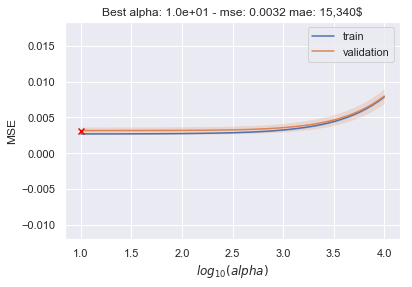

In [261]:
# fit/test N model
gs_results = []
for run_idx in range(20):
    #Split into train/test sets
    X_tr, X_val, y_tr, y_val = train_test_split(X_intermediate, y_intermediate, train_size =0.8, random_state = run_idx)
    
    X_tr_rescaled = scaler_i.fit_transform(X_tr)
    X_val_rescaled = scaler_i.transform(X_val)
    
    #Grid search for the optimum alpha value
    for alpha in np.logspace(1, 4, num = 50):
        ridge = Ridge(alpha = alpha)
        ridge.fit(X_tr_rescaled, y_tr)
        
         # Save model and its performance on train/test sets
        gs_results.append({
            'model': ridge,
            'alpha': alpha,
            'run_idx': run_idx,
            'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)),
            'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
            'validation_mse': MSE(y_val, ridge.predict(X_val_rescaled)),
            'validation_mae': MAE(10**y_val, 10**ridge.predict(X_val_rescaled)),
        })
    
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)

# Group results by alpha value
gb_alpha = gs_results.groupby('alpha')

# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mse.mean()
mean_val = gb_alpha.validation_mse.mean()
std_tr = gb_alpha.train_mse.std()
std_val = gb_alpha.validation_mse.std()
alphas = mean_tr.index.values

std_val_mae = gb_alpha.validation_mae.std()

# Add marker for best score
best_alpha = mean_val.idxmin()
plt.scatter(np.log10(best_alpha), mean_val.min(), marker='x', c='red', zorder=10)

# Print best MSE/MAE scores
best_result = gb_alpha.get_group(best_alpha)

# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label = 'train')
plt.plot(np.log10(alphas), mean_val, label = 'validation')

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha = 0.2)
plt.fill_between(np.log10(alphas), mean_val-std_val, mean_val+std_val, alpha = 0.2)

plt.title('Best alpha: {:.1e} - mse: {:.4f} mae: {:,.0f}$'.format(
    best_alpha, best_result.validation_mse.mean(), best_result.validation_mae.mean()))

plt.xlabel('$log_{10}(alpha)$')
#plt.xlim(1,200000)
plt.ylabel('MSE')
plt.legend()
plt.show()

In [262]:
best_alpha

10.0

In [263]:
std_val_mae[best_alpha]

721.0129193679786

In [264]:
print('The mean MAE of my simple model is {:.3f} ± {:.0f} standard deviation.'.format(best_result.validation_mae.mean(),std_val_mae[best_alpha]))

The mean MAE of my simple model is 15339.764 ± 721 standard deviation.


The mean MAE for the simple model for the optumiûm alpha is:

In [265]:
mae_intermediate_mean = best_result.validation_mae.mean()
mae_intermediate_mean

15339.763577514208

In [266]:
mae_intermediate = best_result.validation_mae
mae_intermediate

0      14163.270088
50     14890.914078
100    16623.535580
150    15558.416158
200    15632.486495
250    14301.736863
300    14784.351008
350    14208.580936
400    15485.764947
450    15005.253313
500    15066.955165
550    16325.909378
600    16051.607278
650    14851.937720
700    16192.099181
750    15314.527530
800    16364.732867
850    15227.532835
900    15120.508062
950    15625.152069
Name: validation_mae, dtype: float64

the following code makes the fitting for the best alpha for one split (the last) and will be used for predicting the test set.

In [267]:
ridge_intermediate = Ridge(alpha = best_alpha)
ridge_intermediate.fit(X_tr_rescaled, y_tr)

Ridge(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [268]:
print('Coefficients:', ridge_intermediate.coef_)
print('Intercept:', ridge_intermediate.intercept_)
print('R^2:', ridge_intermediate.score(X_tr, y_tr))

Coefficients: [ 1.77466040e-02  4.79852933e-03  9.83149867e-03  2.49709216e-03
 -1.92256572e-02  1.35576944e-02 -5.91361058e-03  4.26590625e-02
  4.05449343e-03  8.98383818e-03  2.24467792e-02  8.78649958e-03
 -1.68646802e-02  2.64983969e-02 -1.34210028e-02 -1.88951433e-03
 -1.10145693e-02 -4.63481599e-03  6.59880532e-04 -1.24088823e-03
 -5.00635674e-04  2.79639222e-03 -1.35504579e-03  1.56134255e-04
  1.80148553e-03  4.12358054e-04  3.24166730e-03  1.66072946e-03
 -1.94469687e-03  9.77796526e-03 -4.67812101e-03 -2.93944275e-03
  3.34698497e-03  4.60103051e-03 -3.13373154e-03 -5.03541130e-05
  4.17119296e-04 -3.55391841e-03 -2.89054304e-03  1.46720732e-03
 -5.89853982e-03  5.67959517e-03  1.00353717e-02 -5.07004000e-03
  1.43942170e-03 -2.27805757e-03 -5.64924278e-03  6.79092764e-03
  7.44063097e-03  1.01843209e-03 -8.05557501e-04 -3.49065411e-03
  7.17490657e-04  3.09313246e-03 -1.30032162e-03 -1.97133390e-04
 -3.64666842e-03  5.03491469e-03  1.64874743e-03  1.24770360e-02
  2.8983895

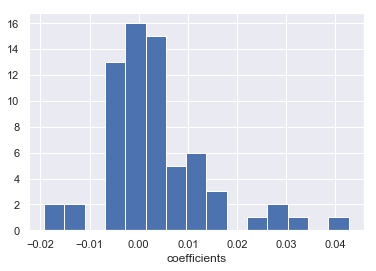

In [269]:
plt.hist(ridge_intermediate.coef_, bins = 15)
plt.xlabel('coefficients')
plt.show()

### C. a complex Model with all features

In [270]:
df_complex = df.copy()

In [271]:
df_complex.shape

(2398, 70)

In [272]:
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
0          60        RL          68.0      8795   Pave          3   
1          20        RL          75.0     10170   Pave          4   
2         160        RM          21.0      2001   Pave          4   
3          20        RL          70.0     10552   Pave          3   
4         190        RM          60.0     10120   Pave          3   

  Land Contour Utilities Lot Config  Land Slope Neighborhood Condition 1  \
0          Lvl         4     Inside           3      Gilbert        Norm   
1          Lvl         4     Corner           3        NAmes        Norm   
2          Lvl         4     Inside           3      MeadowV        Norm   
3          Lvl         4     Inside           3        NAmes        Norm   
4          Bnk         4     Inside           3      OldTown       Feedr   

  Condition 2 Bldg Type House Style  Year Built  Year Remod/Add Roof Style  \
0        Norm      1Fam      2Story        2000            2000      Gable   
1        Norm      1Fam      1Story        1951            1951        Hip   
2        Norm     Twnhs      2Story        1970            1970      Gable   
3        Norm      1Fam      1Story        1959            1959        Hip   
4        Norm    2fmCon      2.5Unf        1910            1950        Hip   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Foundation  \
0   CompShg      VinylSd      VinylSd         None           0.0      PConc   
1   CompShg      Wd Sdng      Wd Sdng      BrkFace         522.0     CBlock   
2   CompShg      CemntBd      CmentBd      BrkFace          80.0     CBlock   
3   CompShg      BrkFace      BrkFace         None           0.0     CBlock   
4   CompShg      Wd Sdng      Wd Sdng         None           0.0     CBlock   

   Bsmt Exposure  Total Bsmt SF Heating  Heating QC Central Air  Electrical  \
0              1          952.0    GasA           5           Y           5   
1              1          216.0    GasA           3           Y           5   
2              1          546.0    GasA           2           Y           5   
3              1         1398.0    GasA           4           Y           5   
4              1          925.0    GasA           3           N           3   

   Low Qual Fin SF  Gr Liv Area  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  \
0                0         2256              4              1             4   
1                0         1575              2              1             4   
2                0         1092              3              1             3   
3                0         1700              4              1             4   
4                0         1889              4              2             3   

   TotRms AbvGrd  Functional  Fireplaces  Fireplace Qu  Garage Type  \
0              8           8           1             3            3   
1              5           8           1             4            5   
2              6           8           0            -1            5   
3              6           8           1             4            5   
4              9           8           1             4            1   

   Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  Paved Drive  \
0           2000              3            2        554.0            2   
1           1951              1            2        400.0            2   
2           1970              1            1        286.0            2   
3           1959              2            2        447.0            2   
4           1960              1            1        308.0           -1   

   Wood Deck SF  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
0           224          0         0        4     2009       WD    
1             0          0         0        6     2006       WD    
2             0          0         0        1     2007       WD    
3             0          0         0        4     2010       WD    
4             0         

In [273]:
nominal = ['MS SubClass', 'MS Zoning', 'Street',  'Land Contour', 'Lot Config','Neighborhood',
           'Condition 1', 'Condition 2','Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 
           'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
           'Sale Type', 'Sale Condition']

ordinal = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall QC',  'Exter QC', 
           'Bsmt QC', 'Bsmt Exposure', 'BsmtFin', 'Heating QC', 
           'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage QC', 
           'Paved Drive']

binary = ['Pool exists', 'Garage exists', 'Wood Deck exists', 'Mas Vnr exists','Misc Val exists', 
           'BsmtFin exists', 'Baths', 'BedBath', 'Recently Built', 'Bsmt exists']

continuous = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'Total Bsmt SF', 
             'Low Qual Fin SF', 'Gr Liv Area', 'Garage Area', 'Wood Deck SF', 
             'tot Porch SF', 'Pool Area', 'Misc Val']

discrete = ['Year Built', 'Year Remod/Add', 'Baths', 
            'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
            'Mo Sold', 'Yr Sold']

In [274]:
df_complex.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street  Lot Shape  \
0          60        RL          68.0      8795   Pave          3   
1          20        RL          75.0     10170   Pave          4   
2         160        RM          21.0      2001   Pave          4   
3          20        RL          70.0     10552   Pave          3   
4         190        RM          60.0     10120   Pave          3   

  Land Contour Utilities Lot Config  Land Slope Neighborhood Condition 1  \
0          Lvl         4     Inside           3      Gilbert        Norm   
1          Lvl         4     Corner           3        NAmes        Norm   
2          Lvl         4     Inside           3      MeadowV        Norm   
3          Lvl         4     Inside           3        NAmes        Norm   
4          Bnk         4     Inside           3      OldTown       Feedr   

  Condition 2 Bldg Type House Style  Year Built  Year Remod/Add Roof Style  \
0        Norm      1Fam      2Story        2000            2000      Gable   
1        Norm      1Fam      1Story        1951            1951        Hip   
2        Norm     Twnhs      2Story        1970            1970      Gable   
3        Norm      1Fam      1Story        1959            1959        Hip   
4        Norm    2fmCon      2.5Unf        1910            1950        Hip   

  Roof Matl Exterior 1st Exterior 2nd Mas Vnr Type  Mas Vnr Area Foundation  \
0   CompShg      VinylSd      VinylSd         None           0.0      PConc   
1   CompShg      Wd Sdng      Wd Sdng      BrkFace         522.0     CBlock   
2   CompShg      CemntBd      CmentBd      BrkFace          80.0     CBlock   
3   CompShg      BrkFace      BrkFace         None           0.0     CBlock   
4   CompShg      Wd Sdng      Wd Sdng         None           0.0     CBlock   

   Bsmt Exposure  Total Bsmt SF Heating  Heating QC Central Air  Electrical  \
0              1          952.0    GasA           5           Y           5   
1              1          216.0    GasA           3           Y           5   
2              1          546.0    GasA           2           Y           5   
3              1         1398.0    GasA           4           Y           5   
4              1          925.0    GasA           3           N           3   

   Low Qual Fin SF  Gr Liv Area  Bedroom AbvGr  Kitchen AbvGr  Kitchen Qual  \
0                0         2256              4              1             4   
1                0         1575              2              1             4   
2                0         1092              3              1             3   
3                0         1700              4              1             4   
4                0         1889              4              2             3   

   TotRms AbvGrd  Functional  Fireplaces  Fireplace Qu  Garage Type  \
0              8           8           1             3            3   
1              5           8           1             4            5   
2              6           8           0            -1            5   
3              6           8           1             4            5   
4              9           8           1             4            1   

   Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  Paved Drive  \
0           2000              3            2        554.0            2   
1           1951              1            2        400.0            2   
2           1970              1            1        286.0            2   
3           1959              2            2        447.0            2   
4           1960              1            1        308.0           -1   

   Wood Deck SF  Pool Area  Misc Val  Mo Sold  Yr Sold Sale Type  \
0           224          0         0        4     2009       WD    
1             0          0         0        6     2006       WD    
2             0          0         0        1     2007       WD    
3             0          0         0        4     2010       WD    
4             0         

In [275]:
# duplicates
df_complex.drop_duplicates(keep = False, inplace = True)

In [276]:
def preprocess_complex(df):
    # work on a copy
    df = df.copy()
    
    # feature engineering - log transformation for 'Gr Liv Area'
    for c in continuous:
        df[c] = np.log1p(df[c])
    
    df = pd.get_dummies(df, columns = nominal)
    #df['Year Built'] = np.log1p(df['Year Built'])
   
    # feature engineering adding polynomial features for 'Year Blt'
    for c in ['Gr Liv Area', 'Year Built',  'Lot Area']:
        for d in [0.5, 2]:
            name = '{}**{}'.format(c, d)
            df[name] = df[c]**d
    
    for e in [1, 2]:
            name = '{}**{}'.format('Total Bsmt SF', e)
            df[name] = df['Total Bsmt SF']**e

    
    return df

In [277]:
prep_complex_df = preprocess_complex(df_complex)

In [278]:
prep_complex_df.head()

Lot Frontage  Lot Area  Lot Shape Utilities  Land Slope  Year Built  \
0      4.234107  9.082052          3         4           3        2000   
1      4.330733  9.227296          4         4           3        1951   
2      3.091042  7.601902          4         4           3        1970   
3      4.262680  9.264165          3         4           3        1959   
4      4.110874  9.222368          3         4           3        1910   

   Year Remod/Add  Mas Vnr Area  Bsmt Exposure  Total Bsmt SF  Heating QC  \
0            2000      0.000000              1       6.859615           5   
1            1951      6.259581              1       5.379897           3   
2            1970      4.394449              1       6.304449           2   
3            1959      0.000000              1       7.243513           4   
4            1950      0.000000              1       6.830874           3   

   Electrical  Low Qual Fin SF  Gr Liv Area  Bedroom AbvGr  Kitchen AbvGr  \
0           5              0.0     7.721792              4              1   
1           5              0.0     7.362645              2              1   
2           5              0.0     6.996681              3              1   
3           5              0.0     7.438972              4              1   
4           3              0.0     7.544332              4              2   

   Kitchen Qual  TotRms AbvGrd  Functional  Fireplaces  Fireplace Qu  \
0             4              8           8           1             3   
1             4              5           8           1             4   
2             3              6           8           0            -1   
3             4              6           8           1             4   
4             3              9           8           1             4   

   Garage Yr Blt  Garage Finish  Garage Cars  Garage Area  Paved Drive  \
0           2000              3            2     6.318968            2   
1           1951              1            2     5.993961            2   
2           1970              1            1     5.659482            2   
3           1959              2            2     6.104793            2   
4           1960              1            1     5.733341           -1   

   Wood Deck SF  Pool Area  Misc Val  Mo Sold  Yr Sold  SalePrice  \
0        5.4161        0.0       0.0        4     2009     236000   
1        0.0000        0.0       0.0        6     2006     155000   
2        0.0000        0.0       0.0        1     2007      75000   
3        0.0000        0.0       0.0        4     2010     165500   
4        0.0000        0.0       0.0        1     2007     122000   

   Pool exists  Garage exists  Wood Deck exists  Mas Vnr exists  \
0            0              1                 1               0   
1            0              1                 0               1   
2            0              1                 0               1   
3            0              1                 0               0   
4            0              1                 0               0   

   Misc Val exists  tot Porch SF  Porch exists  Overall QC  Exter QC  Bsmt QC  \
0                0      4.007333             1         6.0       3.5      3.5   
1                0      0.000000             0         6.0       3.0      3.0   
2                0      0.000000             0         4.5       3.0      3.0   
3                0      3.663562             1         5.0       3.0      3.0   
4                0      5.579730             1         5.5       2.5      3.0   

   BsmtFin  BsmtFin exists  Garage QC  Baths  BedBath  Recently Built  \
0      3.5               1        3.0    2.5     10.0               1   
1      1.0               0        3.0    1.5      3.0               1   
2      1.0               0        3.0    1.5      4.5               1   
3      2.0               1        3.0    2.0      8.0               1   
4      1.0               0        3.0    1.5      6.0               0   

   Bsmt ex

In [279]:
prep_complex_df.shape

(2398, 236)

In [280]:
X_complex = prep_complex_df.drop('SalePrice', axis = 1).values
y_complex = np.log10(prep_complex_df.SalePrice).values

/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/tgdstpej/opt/anaconda3/envs/

/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/tgdstpej/opt/anaconda3/envs/

/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/tgdstpej/opt/anaconda3/envs/exts-ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/tgdstpej/opt/anaconda3/envs/

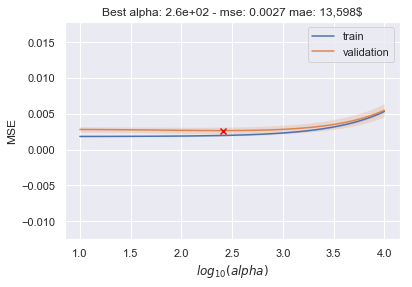

In [281]:
scaler_c = StandardScaler()
# fit/test N models
gs_results = []
for run_idx in range(20):
    #Split into train/test sets
    X_tr, X_val, y_tr, y_val = train_test_split(X_complex, y_complex, train_size =0.8, random_state = run_idx)
    
    X_tr_rescaled = scaler_c.fit_transform(X_tr)
    X_val_rescaled = scaler_c.transform(X_val)
    
    #Grid search for the optimum alpha value
    for alpha in np.logspace(1, 4, num = 50):
        ridge = Ridge(alpha = alpha)
        ridge.fit(X_tr_rescaled, y_tr)
        
         # Save model and its performance on train/test sets
        gs_results.append({
            'model': ridge,
            'alpha': alpha,
            'run_idx': run_idx,
            'train_mse': MSE(y_tr, ridge.predict(X_tr_rescaled)),
            'train_mae': MAE(10**y_tr, 10**ridge.predict(X_tr_rescaled)),
            'validation_mse': MSE(y_val, ridge.predict(X_val_rescaled)),
            'validation_mae': MAE(10**y_val, 10**ridge.predict(X_val_rescaled)),
        })
    
# Convert results to DataFrame
gs_results = pd.DataFrame(gs_results)

# Group results by alpha value
gb_alpha = gs_results.groupby('alpha')

# Compute train/test mean scores with std
mean_tr = gb_alpha.train_mse.mean()
mean_val = gb_alpha.validation_mse.mean()
std_tr = gb_alpha.train_mse.std()
std_val = gb_alpha.validation_mse.std()
alphas = mean_tr.index.values

std_val_mae = gb_alpha.validation_mae.std()

# Add marker for best score
best_alpha = mean_val.idxmin()
plt.scatter(np.log10(best_alpha), mean_val.min(), marker='x', c='red', zorder=10)

# Print best MSE/MAE scores
best_result = gb_alpha.get_group(best_alpha)

# Plot mean scores
plt.plot(np.log10(alphas), mean_tr, label = 'train')
plt.plot(np.log10(alphas), mean_val, label = 'validation')

# Quantify variance with ±std curves
plt.fill_between(np.log10(alphas), mean_tr-std_tr, mean_tr+std_tr, alpha = 0.2)
plt.fill_between(np.log10(alphas), mean_val-std_val, mean_val+std_val, alpha = 0.2)

plt.title('Best alpha: {:.1e} - mse: {:.4f} mae: {:,.0f}$'.format(
    best_alpha, best_result.validation_mse.mean(), best_result.validation_mae.mean()))

plt.xlabel('$log_{10}(alpha)$')
#plt.xlim(1,200000)
plt.ylabel('MSE')
plt.legend()
plt.show()

In [282]:
best_alpha

255.95479226995357

In [283]:
std_val_mae[best_alpha]

711.8689806289584

In [284]:
print('The mean MAE of my complex model is {:.3f} ± {:.0f} standard deviation.'.format(best_result.validation_mae.mean(),std_val_mae[best_alpha]))

The mean MAE of my complex model is 13598.152 ± 712 standard deviation.


The mean MAE for the simple model for the optumiûm alpha is:

In [285]:
mae_complex_mean = best_result.validation_mae.mean()
mae_complex_mean

13598.151701034734

In [286]:
mae_complex = best_result.validation_mae
mae_complex

23     13812.031625
73     14155.126202
123    13368.066344
173    13678.399460
223    13600.608538
273    13369.970850
323    12567.810942
373    12594.155603
423    12177.806619
473    13464.354979
523    13046.295539
573    14212.162919
623    14217.388849
673    12875.463505
723    14149.949224
773    13672.269800
823    13431.316716
873    14448.306298
923    14034.022258
973    15087.527749
Name: validation_mae, dtype: float64

the following code makes the fitting for the best alpha for one split (the last) and will be used for predicting the test set.

In [287]:
ridge_complex = Ridge(alpha = best_alpha)
ridge_complex.fit(X_tr_rescaled, y_tr)

Ridge(alpha=255.95479226995357, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [288]:
print('Coefficients:', ridge_complex.coef_)
print('Intercept:', ridge_complex.intercept_)
print('R^2:', ridge_complex.score(X_tr, y_tr))


Coefficients: [ 3.39219767e-03  5.75813650e-03 -1.36855970e-03  2.32959273e-03
  2.18321475e-04  6.30110869e-03  4.07374432e-03  4.15680005e-03
  7.31376539e-03  1.59377513e-03  3.75439692e-03  5.72256072e-05
 -3.52617701e-04  1.74974313e-02 -3.90290230e-03 -3.47251414e-03
  7.59085753e-03  3.72526681e-03  7.79579502e-03  5.74389086e-03
  3.22271088e-03  5.40848436e-03  2.55242846e-03  1.03271308e-02
  1.56308507e-03  4.48752515e-03  2.29850084e-03 -8.70370570e-05
 -7.70903295e-05 -3.41734853e-04 -1.44502283e-03  1.49167701e-03
 -1.27450001e-03  1.58524595e-04 -4.16993862e-04 -7.78484472e-04
  5.46270854e-03 -1.37705492e-03  2.75058090e-02  5.42742442e-03
  3.10027714e-03  5.31253516e-03  5.71015114e-03  4.02985143e-03
  9.04585436e-03  1.47577175e-03  1.99643130e-03 -7.29713649e-03
  3.03510335e-03 -3.86282019e-03  2.82606846e-04  1.15757597e-03
  2.37895292e-04 -2.42420860e-03  3.44873661e-03  5.82399757e-04
 -1.20712644e-03  1.29390346e-03 -5.31310850e-04  2.93041844e-04
 -1.6003593

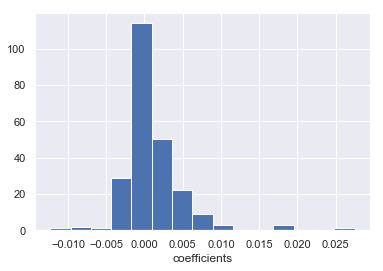

In [289]:
plt.hist(ridge_complex.coef_, bins = 15)
plt.xlabel('coefficients')
plt.show()

### Baseline

As a baseline I will choose the mean values of the target variable to compare all three models.

In [290]:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [291]:
mae_baseline = MAE(10**y_val, 10**np.mean(y_tr))
mae_baseline

59089.63122017947

In [292]:
mae_values = [mae_baseline, mae_simple_mean, mae_intermediate_mean, mae_complex_mean]

In [293]:
xcor = np.arange(len(mae_values))
xcor 

array([0, 1, 2, 3])

In [294]:
titles = ['baseline', 'simple', 'intermediate', 'complex']

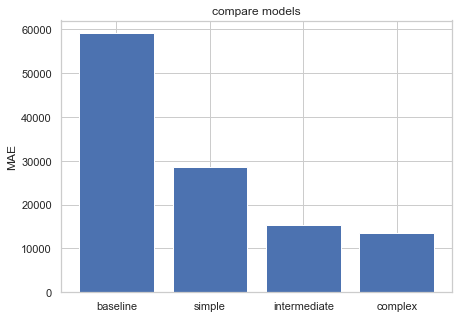

In [295]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,5))
plt.bar(xcor, mae_values)
plt.xticks(xcor, titles)
plt.title('compare models')
plt.ylabel('MAE')
plt.show()

I observe that the lowest error is given by the complex model but the difference between the intermediate and the complex model is quite small. That means that adding complexity did not improve the error much further. 

In [296]:
mae = pd.DataFrame([np.array(mae_simple), np.array(mae_intermediate), np.array(mae_complex)]).T
mae.columns = ['simple', 'intermediate', 'complex']
mae

simple  intermediate       complex
0   26448.114589  14163.270088  13812.031625
1   29598.907511  14890.914078  14155.126202
2   28853.626923  16623.535580  13368.066344
3   29815.104768  15558.416158  13678.399460
4   28206.014993  15632.486495  13600.608538
5   28588.659903  14301.736863  13369.970850
6   27678.479753  14784.351008  12567.810942
7   27957.517750  14208.580936  12594.155603
8   27350.335429  15485.764947  12177.806619
9   29062.524604  15005.253313  13464.354979
10  28605.825483  15066.955165  13046.295539
11  29447.390133  16325.909378  14212.162919
12  28660.434991  16051.607278  14217.388849
13  29418.298308  14851.937720  12875.463505
14  27649.215351  16192.099181  14149.949224
15  29812.227650  15314.527530  13672.269800
16  31162.949770  16364.732867  13431.316716
17  28436.158908  15227.532835  14448.306298
18  28299.136469  15120.508062  14034.022258
19  28811.612490  15625.152069  15087.527749

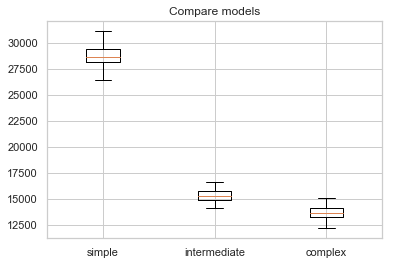

In [297]:
plt.boxplot(mae.transpose())
plt.title('Compare models')
plt.xticks([1,2,3], ['simple', 'intermediate', 'complex'])
plt.show()

I observe that the intermediate and complex models have a smaller variation across the different runs/splits compared to the simple model.

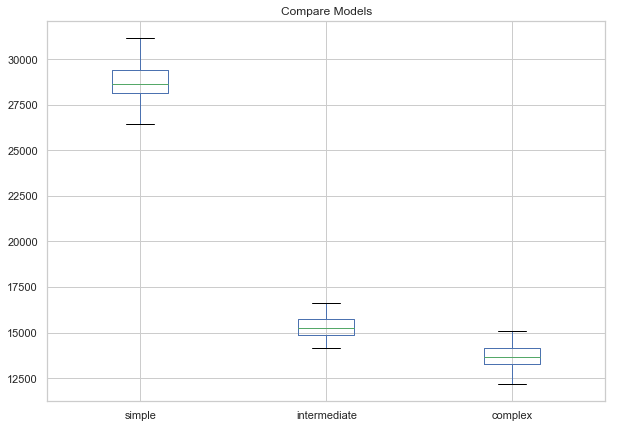

In [298]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7))
mae.boxplot(column=['simple', 'intermediate', 'complex'], patch_artist=False, 
                    showmeans=False,
                    medianprops = dict(color='C2')) # that does not work!!!

ax.set_title('Compare Models')
plt.show()

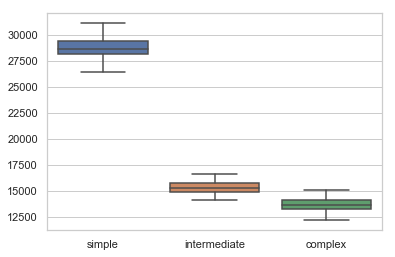

In [299]:
sns.set_style('whitegrid')
ax = sns.boxplot(data=mae )
plt.show()

# Compute predictions on the test data

In [1]:
test = pd.read_csv( 'house-prices-test.csv')

NameError: name 'pd' is not defined

In [ ]:
test.shape

In [ ]:
test.head()

In [ ]:
test.set_index('PID', inplace = True)

In [ ]:
test.head()

### Compute the prediction of the test data with the simple model

I will now use the same pipeline as used for the simple model to predict the test values.

In [ ]:
test_simple = test.loc[:, ['Gr Liv Area', 'Year Built']]

In [ ]:
test_simple.head()

In [ ]:
prep_test_simple = preprocess_simple(test_simple)

In [ ]:
prep_test_simple.head()

In [ ]:
prep_test_simple.shape

In [ ]:
X_simple_te = prep_test_simple.values

In [ ]:
X_simple_te_rescaled = scaler_s.transform(X_simple_te)

In [ ]:
y_pred_simple = 10**ridge_simple.predict(X_simple_te_rescaled)

In [ ]:
y_pred_simple_df = pd.DataFrame(y_pred_simple, columns = ['SalePrice'], index = prep_test_simple.index)
y_pred_simple_df.head()

In [ ]:
y_pred_simple_df.shape

In [ ]:
y_pred_simple_df.to_csv('predictions-simple-model.csv', index = True)

### Compute the prediction of the test data with the intermediate model

In [ ]:
test = pd.read_csv( 'house-prices-test.csv')

In [ ]:
test.shape

In [ ]:
test.head()

In [ ]:
test.set_index('PID', inplace = True)

In [ ]:
test.head()

I will now use the same pipeline as used for the processing I used for the training set. So first I will drop the columns with too many missing values and then I will fill the missing values from the whole test set accordingly. I will not drop the 'PID' column as I used it for index.

In [ ]:
test.drop(columns = ['Order'], axis = 1, inplace = True)
test.drop( columns =  ['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis = 1, inplace = True)

In [ ]:
test['Mas Vnr Type'] = test['Mas Vnr Type'].fillna('None')
test['Mas Vnr Area'] = test['Mas Vnr Area'].fillna(0)
test[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']] = test[['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']].fillna('NA')
test['Bsmt Full Bath'] = test['Bsmt Full Bath'].fillna(0)
test['Bsmt Half Bath'] = test['Bsmt Half Bath'].fillna(0)
test['Electrical'] = test['Electrical'].fillna('SBrkr')
test['Garage Type'] = test['Garage Type'].fillna('NA')
test['Garage Finish'] = test['Garage Finish'].fillna('NA')
test['Garage Qual'] = test['Garage Qual'].fillna('NA')
test['Garage Cond'] = test['Garage Cond'].fillna('NA')
test['Garage Cars'] = test['Garage Cars'].fillna(0)
test['Garage Area'] = test['Garage Area'].fillna(0)
test['Garage Yr Blt'] = test['Garage Yr Blt'].fillna(1977)
test['Year Built'] = test['Year Built'].fillna(1973)
test['Gr Liv Area'] = test['Gr Liv Area'].fillna(1440)
test['Fireplace Qu'] = test['Fireplace Qu'].fillna('NA')

In [ ]:
test.shape

In [ ]:
raw.shape

raw dataset has one more column which is the target variable.

In [ ]:
test.isna().sum()

I observe that the 'Lot Frontage' has a lot of missing values whereas in the training set there were no missing values. I will fill the missing values using the median of the training set.

In [ ]:
np.nanmedian(raw['Lot Frontage'])

In [ ]:
test['Lot Frontage'] = test['Lot Frontage'].fillna(np.nanmedian(raw['Lot Frontage']))

In [ ]:
test.isna().sum().sum()

Since there are no missing values, I will do the same Label Encoding for the ordinal data and the same feature engineering I did for the training set.

In [ ]:
# Label encoding for ordinal features
#le_Lot_shape = LabelEncoder()
Lotshape = {'IR3': 1, 'IR2':2, 'IR1':3, 'Reg':4}
test['Lot Shape'] = test['Lot Shape'].replace(Lotshape)

Util =  {'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1}
test['Utilities'] = test['Utilities'].replace(Util)
# test['Utilities'].replace(utilities,inplace=True)

Landslope = {'Sev': 1, 'Mod':2, 'Gtl':3}
test['Land Slope'] = test['Land Slope'].replace(Landslope)

#Overall Qual
test['Overall Qual'] = test['Overall Qual'].astype('int64')
test['Overall Cond'] = test['Overall Cond'].astype('int64')

qual = {'NA':-1,'Po':1,'Fa':2,'TA':3, 'Gd':4,'Ex': 5}
test['Bsmt Qual'] = test['Bsmt Qual'].replace(qual)
test['Bsmt Cond'] = test['Bsmt Cond'].replace(qual)
test['Exter Qual'] = test['Exter Qual'].replace(qual)
test['Exter Cond'] = test['Exter Cond'].replace(qual)
test['Heating QC'] = test['Heating QC'].replace(qual)
test['Kitchen Qual'] = test['Kitchen Qual'].replace(qual)
test['Fireplace Qu'] = test['Fireplace Qu'].replace(qual)
test['Garage Qual'] = test['Garage Qual'].replace(qual)
test['Garage Cond'] = test['Garage Cond'].replace(qual)

exposure = {'NA': -1, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
test['Bsmt Exposure'].replace(exposure, inplace = True)

fin = {'NA': -1, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ':6 }
test['BsmtFin Type 1'].replace(fin, inplace = True)
test['BsmtFin Type 2'].replace(fin, inplace = True)

electric = {'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5}
test['Electrical'].replace(electric, inplace = True)

function = {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7 , 'Typ': 8}
test['Functional'].replace(function, inplace = True)

gar = {'NA': -1, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types':6}
test['Garage Type'].replace(gar, inplace = True)

garfin = {'NA': -1, 'Unf': 1, 'RFn': 2, 'Fin': 3}
test['Garage Finish'].replace(garfin, inplace = True)

paved = {'N': -1, 'P': 1, 'Y': 2}
test['Paved Drive'].replace(paved, inplace = True)

Feature Engineering and droping of the features used in the new combinations. First the initial indicator variables I created and used later for the feature engineering to create new features.

In [ ]:
# or alternatively:
# test['Pool exists1']= [0 if x == 0 else 1 for x in test['Pool Area']] 
test['Pool exists'] = test.apply(lambda row: bool(row['Pool Area'] > 0), axis = 1).astype('int64')
test['Garage exists'] = test.apply(lambda row: bool(row['Garage Area'] > 0), axis = 1).astype('int64')
test['Wood Deck exists'] = test.apply(lambda row: bool(row['Wood Deck SF'] > 0), axis = 1).astype('int64')
test['Mas Vnr exists'] = test.apply(lambda row: bool(row['Mas Vnr Area'] > 0), axis = 1).astype('int64')
test['Open Porch exists'] = test.apply(lambda row: bool(row['Open Porch SF'] > 0), axis = 1).astype('int64')
test['Enclosed Porch exists'] = test.apply(lambda row: bool(row['Enclosed Porch'] > 0), axis = 1).astype('int64')
test['3Ssn Porch exists'] = test.apply(lambda row: bool(row['3Ssn Porch'] > 0), axis = 1).astype('int64')
test['Screen Porch exists'] = test.apply(lambda row: bool(row['Screen Porch'] > 0), axis = 1).astype('int64')
test['Misc Val exists'] = test.apply(lambda row: bool(row['Misc Val'] > 0), axis = 1).astype('int64')
test['BsmtFin1 exists'] = test.apply(lambda row: bool(row['BsmtFin SF 1'] > 0), axis = 1).astype('int64')
test['BsmtFin2 exists'] = test.apply(lambda row: bool(row['BsmtFin SF 2'] > 0), axis = 1).astype('int64')
test['2nd Flr exists'] = test.apply(lambda row: bool(row['2nd Flr SF'] > 0), axis = 1).astype('int64')

In [ ]:
test['tot Porch SF'] = test['Open Porch SF'] + test['Enclosed Porch'] + test['3Ssn Porch'] + test['Screen Porch']
test['Porch exists'] = test.apply(lambda row: bool(row['Open Porch exists'] | row['Enclosed Porch exists'] | row['3Ssn Porch exists'] | row['Screen Porch exists'] ), axis = 1).astype('int64')
test['Overall QC'] = (test['Overall Qual'] + test['Overall Cond'])/2
test['Exter QC'] = (test['Exter Qual'] + test['Exter Cond'])/2
test['Bsmt QC'] = (test['Bsmt Qual'] + test['Bsmt Cond'])/2
test['BsmtFin'] = (test['BsmtFin Type 1'] + test['BsmtFin Type 2'])/2
test['BsmtFin exists'] =  test.apply(lambda row: bool(row['BsmtFin1 exists'] | row['BsmtFin2 exists']), axis = 1).astype('int64')
test['Garage QC'] = (test['Garage Qual'] + test['Garage Cond'])/2
test['Baths'] = (test['Full Bath'] + 0.5*test['Half Bath'] + test['Bsmt Full Bath'] + 0.5*test['Bsmt Half Bath'])
test['BedBath'] = test['Bedroom AbvGr']*test['Baths']
test['Recently Built'] = test.apply(lambda row: bool(row['Year Built'] > 1940), axis = 1).astype('int64')
test['Bsmt exists'] = test.apply(lambda row: bool(row['Total Bsmt SF'] > 0), axis = 1).astype('int64')

In [ ]:
test.drop(columns = ['Overall Qual', 'Exter Qual', 'Bsmt Qual', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Garage Qual', 
                   'Garage Cond', 'Overall Cond', 'Exter Cond', 'Bsmt Cond','Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 
                   'Screen Porch', 'Full Bath', 'Half Bath', 'Bsmt Full Bath','Bsmt Half Bath', 'BsmtFin SF 1', 
                   'BsmtFin SF 2', 'Bsmt Unf SF', 'Open Porch exists', 'Enclosed Porch exists', '3Ssn Porch exists',
                   'Screen Porch exists','1st Flr SF','2nd Flr SF', 'BsmtFin1 exists', 'BsmtFin2 exists', 
                   '2nd Flr exists'], axis = 1, inplace = True)

In [ ]:
df.shape

In [ ]:
test.shape

In [ ]:
nominal

finally I will use th type category for all the nominal features.

In [ ]:
test[nominal] = test[nominal].astype('category')

In [ ]:
test.dtypes

At this point I have finished all the preprocessing of the test data set apart from the One-Hot Encoding. Now I will first select the subset of features for the intermediate model and then apply OHE for the nominal of this subet. I will copy the test data set so as to keep it intact as I will use it for the complex model later.

In [ ]:
test.shape

In [ ]:
test_i = test.copy()

In [ ]:
test_intermediate = test_i.reindex(columns = ['Gr Liv Area', 'Lot Frontage', 'Lot Area', 'Total Bsmt SF', 'Bsmt exists',
                                  'Year Built', 'Recently Built', 
                                  'Overall QC', 'Exter QC', 'Kitchen Qual',
                                  'Garage QC', 'Garage Cars', 'Garage exists', 
                                  'MS Zoning', 'Neighborhood', 'House Style','Baths','BedBath', 'TotRms AbvGrd'
                                  ])

In [ ]:
test_intermediate.head()

In [ ]:
df_interm.shape

In [ ]:
test_intermediate.shape

In [ ]:
prep_test_interm = preprocess_intermediate(test_intermediate)

In [ ]:
prep_test_interm.head()

I remove the target variable from the rep_intermediate_df inorder to get the missing columns.

In [ ]:
prep_interm = prep_intermediate_df.drop('SalePrice', axis = 1)
prep_interm.shape

There are less columns in the test dataset as in the train dataset.  If the training dataset and the testing dataset have a different number of unique values for a given feature, this will result in a different number of one hot encoded features for each dataset.

So from the test set the following columns are missing:

In [ ]:
missing_cols = set(prep_interm.columns) - set(prep_test_interm.columns)
missing_cols

In [ ]:
set(prep_test_interm.columns) - set(prep_interm.columns)

In [ ]:
prep_test_interm_reindexed = prep_test_interm.reindex(columns = prep_interm.columns, fill_value = 0)

In [ ]:
prep_test_interm_reindexed.shape

In [ ]:
prep_test_interm_reindexed.columns

In [ ]:
prep_interm.columns

to ensure the order of column in the test set is in the same order than in train set

In [ ]:
prep_test_interm_reindexed = prep_test_interm_reindexed[prep_interm.columns]

Now I will make prediction with the intermediate model after rescaling the feature matrix.

In [ ]:
X_interm_te = prep_test_interm_reindexed.values

In [ ]:
X_interm_te_rescaled = scaler_i.transform(X_interm_te)

In [ ]:
y_pred_interm = 10**ridge_intermediate.predict(X_interm_te_rescaled)

In [ ]:
y_pred_interm_df = pd.DataFrame(y_pred_interm, columns = ['SalePrice'], index = prep_test_interm_reindexed.index)
y_pred_interm_df.head()

In [ ]:
y_pred_interm_df.shape

In [ ]:
y_pred_interm_df.to_csv('predictions-intermediate-model.csv', index = True)

### Compute the prediction of the test data with the complex model

In [ ]:
test.shape

In [ ]:
test_complex = test.copy()

In [ ]:
prep_test_complex = preprocess_complex(test_complex)

prep_test_complex.head()

In [ ]:
prep_test_complex.shape

In [ ]:
prep_complex_df.shape

I remove the target variable from the rep_intermediate_df inorder to get the missing columns.

In [ ]:
prep_complex = prep_complex_df.drop('SalePrice', axis = 1)
prep_complex.shape

There are less columns in the test dataset as in the train dataset.  If the training dataset and the testing dataset have a different number of unique values for a given feature, this will result in a different number of one hot encoded features for each dataset.

So from the test set the following columns are missing:

In [ ]:
missing_cols_c = set(prep_complex.columns) - set(prep_test_complex.columns)
missing_cols_c

In [ ]:
len(missing_cols_c)

In [ ]:
set(prep_test_complex.columns) - set(prep_complex.columns)

In [ ]:
print('In this case we have {} features that are in the train set but not in the test set and 2 features that are only present in the sets set.'.format( len(missing_cols_c)))

With the use of reindex I will align the test columns so that they are the same as the training set. The 2 additional columns will not be included.

In [ ]:
prep_test_complex_reindexed = prep_test_complex.reindex(columns = prep_complex.columns, fill_value = 0)

In [ ]:
prep_test_complex_reindexed.shape

In [ ]:
prep_test_complex_reindexed.columns

In [ ]:
prep_complex.columns

to ensure the order of column in the test set is in the same order than in train set

In [ ]:
prep_test_complex_reindexed = prep_test_complex_reindexed[prep_complex.columns]

Now I will make prediction with the intermediate model after rescaling the feature matrix.

In [ ]:
X_complex_te = prep_test_complex_reindexed.values

In [ ]:
X_complex_te_rescaled = scaler_c.transform(X_complex_te)

In [ ]:
y_pred_complex = 10**ridge_complex.predict(X_complex_te_rescaled)

In [ ]:
y_pred_complex_df = pd.DataFrame(y_pred_complex, columns = ['SalePrice'], index = prep_test_complex_reindexed.index)
y_pred_complex_df.head()

In [ ]:
y_pred_complex_df.shape

In [ ]:
y_pred_complex_df.to_csv('predictions-complex-model.csv', index = True)

Further Reading for me
__sklearn__
The sklearn mae function does not support a constant value of the median. Therefore, an array must be passed
check SelectKBest

# Evaluate the Predictions

I check my predictions sanity and performances using p3review.herokuapp.com. They are very close to my MAE values of the training set. So there is no overfitting.

## Question:
I think this pipeline which was done manually can be improved if the sklearn Pipeline is used and I would like to discuss with you how I would use Pipeline (esp. SelectKBest) for the purposes of this exercise